In [5]:
import sys, os
import pandas as pd
import numpy as np

from IPython.display import display

In [6]:
# Declare all variables as strings. Spaces must be replaced with '+', i.e., change 'John Smith' to 'John+Smith'.
# Define the lat, long of the location and the year
locs = 6
p1_lat, p1_lon = 39.835694, -105.359097         #Golden
p2_lat, p2_lon = 38.821557, -104.660183         #Colorado Spring
p3_lat, p3_lon = 39.656653, -106.343787         #Vale
p4_lat, p4_lon = 40.569931, -105.182480         #Fort Collins
p5_lat, p5_lon = 39.044038, -108.594066         #Grand junction
p6_lat, p6_lon = 36.995228, -102.044999         #3points
P_lats = [p1_lat, p2_lat, p3_lat, p4_lat, p5_lat, p6_lat]
P_lons = [p1_lon, p2_lon, p3_lon, p4_lon, p5_lon, p6_lon]
text = ['Location1(Golden,CO)', 'Location2(Colorado Spring,CO)',
        'Location3(Vale,CO)', 'Location4(Fort Collins,CO)',
        'Location5(Grand Junction,CO)', 'Location6(3Points,CO)']

# You must request an NSRDB api key from the link above
api_key = '1gHoGjlIGeXbQOpiunnlRrJS9vYYb490MA4n9X7s'
# Set the attributes to extract (e.g., dhi, ghi, etc.), separated by commas.
attributes = 'air_temperature,solar_zenith_angle,dew_point,relative_humidity,surface_albedo,surface_pressure,total_precipitable_water,wind_speed,wind_direction,ghi,dhi,dni'
   
# Choose year of data
year = '2010'
# Set leap year to true or false. True will return leap day data if present, false will not.
leap_year = 'false'
# Set time interval in minutes, i.e., '30' is half hour intervals. Valid intervals are 30 & 60.
interval = '30'
# Specify Coordinated Universal Time (UTC), 'true' will use UTC, 'false' will use the local time zone of the data.
# NOTE: In order to use the NSRDB data in SAM, you must specify UTC as 'false'. SAM requires the data to be in the
# local time zone.
utc = 'false'
# Your full name, use '+' instead of spaces.
your_name = 'Sara+Abouelella'
# Your reason for using the NSRDB.
reason_for_use = 'interview'
# Your affiliation
your_affiliation = 'student'
# Your email address
your_email = 'sabouelella3@gatech.edu'
# Please join our mailing list so we can keep you up-to-date on new developments.
mailing_list = 'false'

# Declare url string
url = 'https://developer.nrel.gov/api/nsrdb/v2/solar/psm3-download.csv?wkt=POINT({lon}%20{lat})&names={year}&leap_day={leap}&interval={interval}&utc={utc}&full_name={name}&email={email}&affiliation={affiliation}&mailing_list={mailing_list}&reason={reason}&api_key={api}&attributes={attr}'.format(year=year, lat=p4_lat, lon=p4_lon, leap=leap_year, interval=interval, utc=utc, name=your_name, email=your_email, mailing_list=mailing_list, affiliation=your_affiliation, reason=reason_for_use, api=api_key, attr=attributes)
# Return just the first 2 lines to get metadata:
info = pd.read_csv(url, nrows=1)
# See metadata for specified properties, e.g., timezone and elevation
timezone, elevation = info['Local Time Zone'], info['Elevation']

In [7]:
# View metadata
info

,Source,Location ID,City,State,Country,Latitude,Longitude,Time Zone,Elevation,Local Time Zone,...,Cloud Type 11,Cloud Type 12,Fill Flag 0,Fill Flag 1,Fill Flag 2,Fill Flag 3,Fill Flag 4,Fill Flag 5,Surface Albedo Units,Version
0,NSRDB,156048,-,-,-,40.57,-105.18,-7,1812,-7,...,Dust,Smoke,NaN,Missing Image,Low Irradiance,Exceeds Clearsky,Missing CLoud Properties,Rayleigh Violation,NaN,3.0.6


In [8]:
# Return all but first 2 lines of csv to get data:

dfs = []
for i in range(locs):
    df = pd.read_csv('https://developer.nrel.gov/api/nsrdb/v2/solar/psm3-download.csv?wkt=POINT({lon}%20{lat})&names={year}&leap_day={leap}&interval={interval}&utc={utc}&full_name={name}&email={email}&affiliation={affiliation}&mailing_list={mailing_list}&reason={reason}&api_key={api}&attributes={attr}'.format(year=year, lat=P_lats[i], lon=P_lons[i], leap=leap_year, interval=interval, utc=utc, name=your_name, email=your_email, mailing_list=mailing_list, affiliation=your_affiliation, reason=reason_for_use, api=api_key, attr=attributes), skiprows=2)
    
    # Set the time index in the pandas dataframe:
    df = df.set_index(pd.date_range('1/1/{yr}'.format(yr=year), freq=interval+'Min', periods=525600/int(interval)))
    print('shape for loc{}:'.format(i+1), df.shape)
    dfs.append(df)
dfs[1].head(8)
# print(df.iloc[2,:])

shape for loc1: (17520, 17)
shape for loc2: (17520, 17)
shape for loc3: (17520, 17)
shape for loc4: (17520, 17)
shape for loc5: (17520, 17)
shape for loc6: (17520, 17)


,Year,Month,Day,Hour,Minute,Temperature,Solar Zenith Angle,Dew Point,Relative Humidity,Surface Albedo,Pressure,Precipitable Water,Wind Speed,Wind Direction,GHI,DHI,DNI
2010-01-01 00:00:00,2010,1,1,0,0,-8,164.18,-16,53.95,0.866,810,0.540,3.6,302.6,0,0,0
2010-01-01 00:30:00,2010,1,1,0,30,-7,163.11,-16,53.94,0.866,810,0.571,3.4,302.6,0,0,0
2010-01-01 01:00:00,2010,1,1,1,0,-7,159.95,-16,52.81,0.866,810,0.603,3.3,307.1,0,0,0
2010-01-01 01:30:00,2010,1,1,1,30,-7,155.51,-16,52.81,0.866,810,0.621,3.0,307.1,0,0,0
2010-01-01 02:00:00,2010,1,1,2,0,-8,150.38,-16,53.11,0.866,810,0.640,2.8,312.7,0,0,0
2010-01-01 02:30:00,2010,1,1,2,30,-7,144.88,-16,49.13,0.866,810,0.652,2.8,312.7,0,0,0
2010-01-01 03:00:00,2010,1,1,3,0,-7,139.18,-16,51.95,0.866,810,0.665,2.8,322.5,0,0,0
2010-01-01 03:30:00,2010,1,1,3,30,-7,133.37,-16,51.95,0.866,810,0.671,2.5,322.5,0,0,0


In [9]:
dffs = []
for i in range(locs):
    dff = dfs[i].drop(columns=['Year'], axis=1)
    dffs.append(dff)
dffs[1].head()

,Month,Day,Hour,Minute,Temperature,Solar Zenith Angle,Dew Point,Relative Humidity,Surface Albedo,Pressure,Precipitable Water,Wind Speed,Wind Direction,GHI,DHI,DNI
2010-01-01 00:00:00,1,1,0,0,-8,164.18,-16,53.95,0.866,810,0.540,3.6,302.6,0,0,0
2010-01-01 00:30:00,1,1,0,30,-7,163.11,-16,53.94,0.866,810,0.571,3.4,302.6,0,0,0
2010-01-01 01:00:00,1,1,1,0,-7,159.95,-16,52.81,0.866,810,0.603,3.3,307.1,0,0,0
2010-01-01 01:30:00,1,1,1,30,-7,155.51,-16,52.81,0.866,810,0.621,3.0,307.1,0,0,0
2010-01-01 02:00:00,1,1,2,0,-8,150.38,-16,53.11,0.866,810,0.640,2.8,312.7,0,0,0


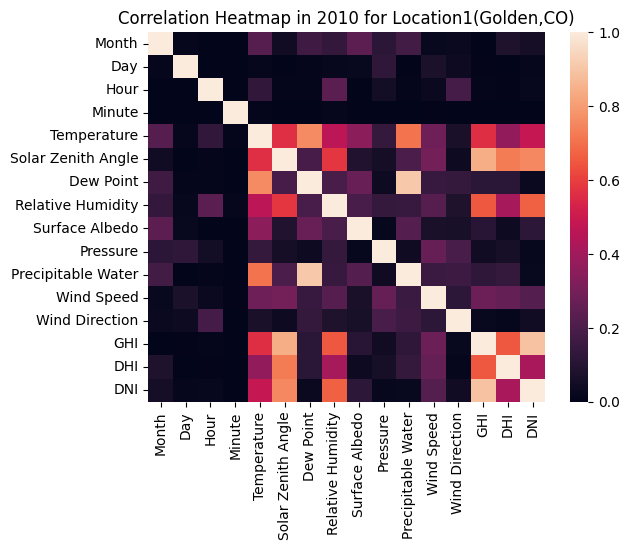

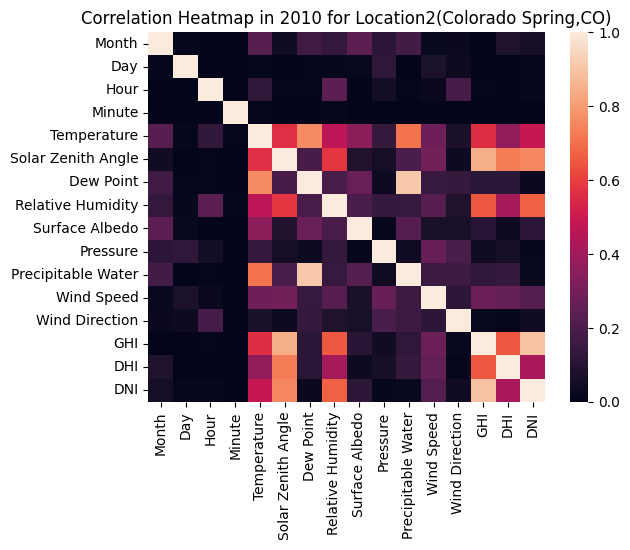

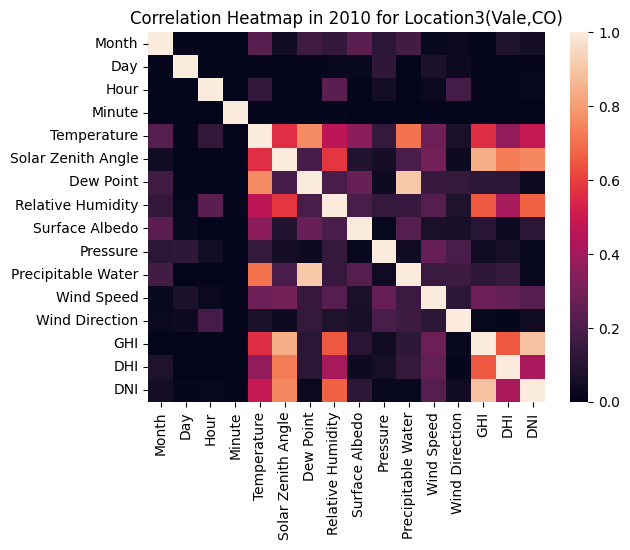

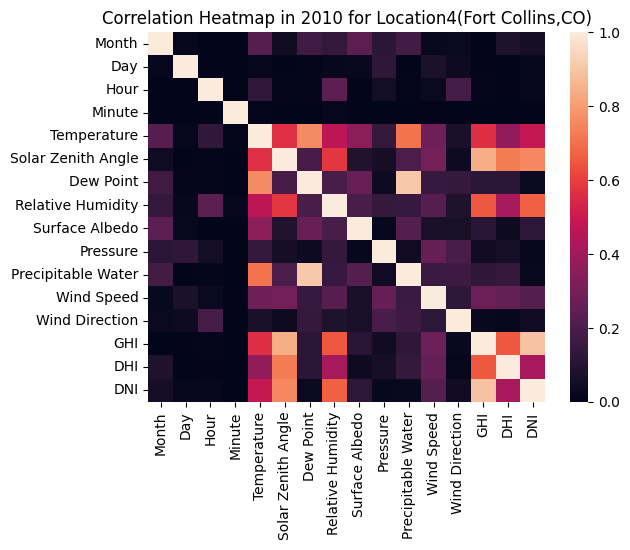

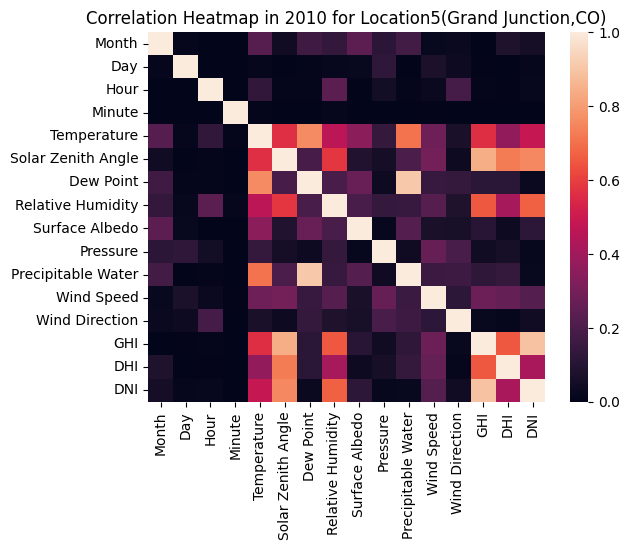

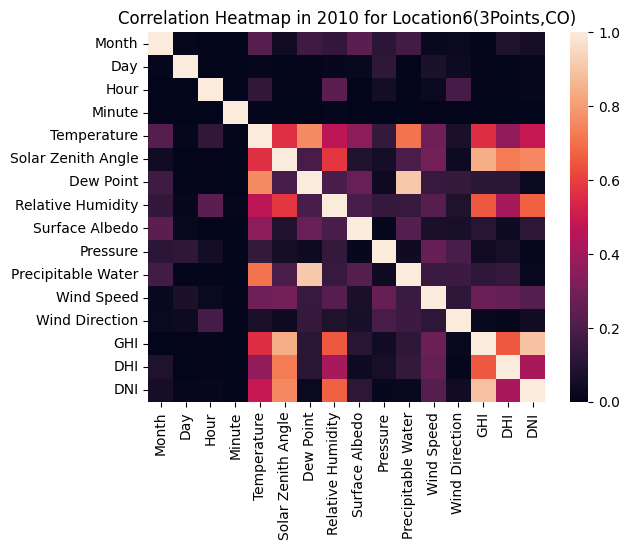

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

for i in range(locs):
    plt.clf()
    corr_matrix = abs(dff.corr())
    heatmap = sns.heatmap(abs(corr_matrix))
    plt.title('Correlation Heatmap in 2010 for {}'.format(text[i]))
    plt.show()

In [11]:
for i in range(locs):
    dfs[i]['DNI after 0.5h'] = dfs[i][['DNI']].shift(1)
    dfs[i]['DNI after 1.0h'] = dfs[i][['DNI']].shift(2)
    dfs[i]['DNI after 1.5h'] = dfs[i][['DNI']].shift(3)
    dfs[i]['DNI after 2.0h'] = dfs[i][['DNI']].shift(4)
    dfs[i]['DNI after 2.5h'] = dfs[i][['DNI']].shift(5)
    dfs[i]['DNI after 3.0h'] = dfs[i][['DNI']].shift(6)
    dfs[i]['DNI after 3.5h'] = dfs[i][['DNI']].shift(7)
    dfs[i]['DNI after 4.0h'] = dfs[i][['DNI']].shift(8)
  
dfs[1].head()

,Year,Month,Day,Hour,Minute,Temperature,Solar Zenith Angle,Dew Point,Relative Humidity,Surface Albedo,...,DHI,DNI,DNI after 0.5h,DNI after 1.0h,DNI after 1.5h,DNI after 2.0h,DNI after 2.5h,DNI after 3.0h,DNI after 3.5h,DNI after 4.0h
2010-01-01 00:00:00,2010,1,1,0,0,-8,164.18,-16,53.95,0.866,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 00:30:00,2010,1,1,0,30,-7,163.11,-16,53.94,0.866,...,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 01:00:00,2010,1,1,1,0,-7,159.95,-16,52.81,0.866,...,0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 01:30:00,2010,1,1,1,30,-7,155.51,-16,52.81,0.866,...,0,0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2010-01-01 02:00:00,2010,1,1,2,0,-8,150.38,-16,53.11,0.866,...,0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [12]:
sub_dfs = []
for i in range(locs):
    sub_dfs.append(dfs[i].iloc[:, 5:])

sub_dfs[1].head()

,Temperature,Solar Zenith Angle,Dew Point,Relative Humidity,Surface Albedo,Pressure,Precipitable Water,Wind Speed,Wind Direction,GHI,DHI,DNI,DNI after 0.5h,DNI after 1.0h,DNI after 1.5h,DNI after 2.0h,DNI after 2.5h,DNI after 3.0h,DNI after 3.5h,DNI after 4.0h
2010-01-01 00:00:00,-8,164.18,-16,53.95,0.866,810,0.540,3.6,302.6,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 00:30:00,-7,163.11,-16,53.94,0.866,810,0.571,3.4,302.6,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 01:00:00,-7,159.95,-16,52.81,0.866,810,0.603,3.3,307.1,0,0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 01:30:00,-7,155.51,-16,52.81,0.866,810,0.621,3.0,307.1,0,0,0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2010-01-01 02:00:00,-8,150.38,-16,53.11,0.866,810,0.640,2.8,312.7,0,0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


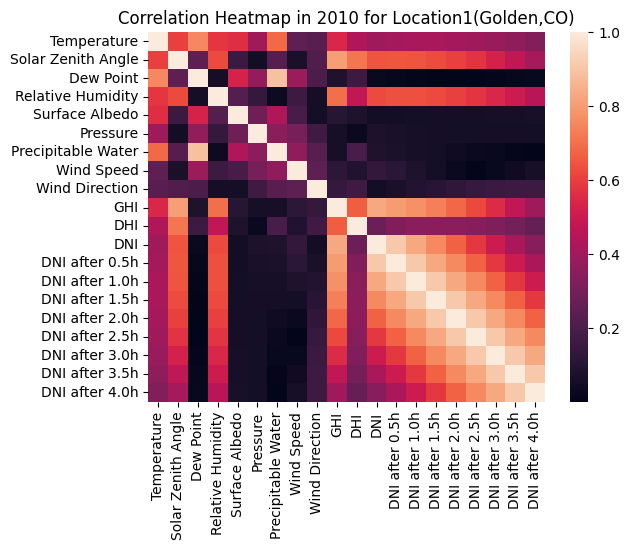

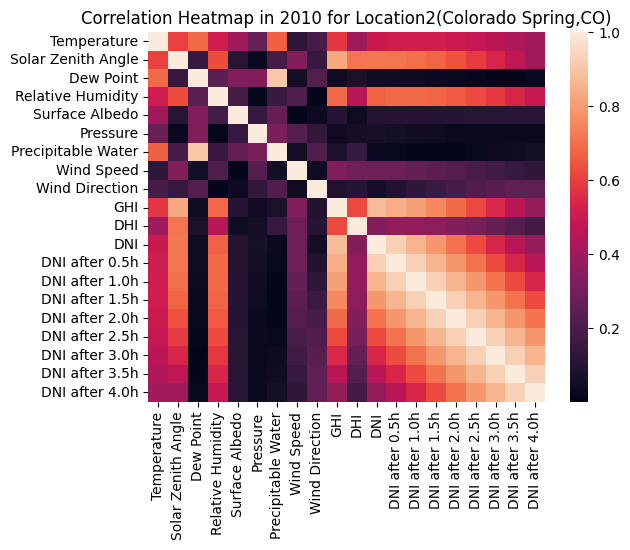

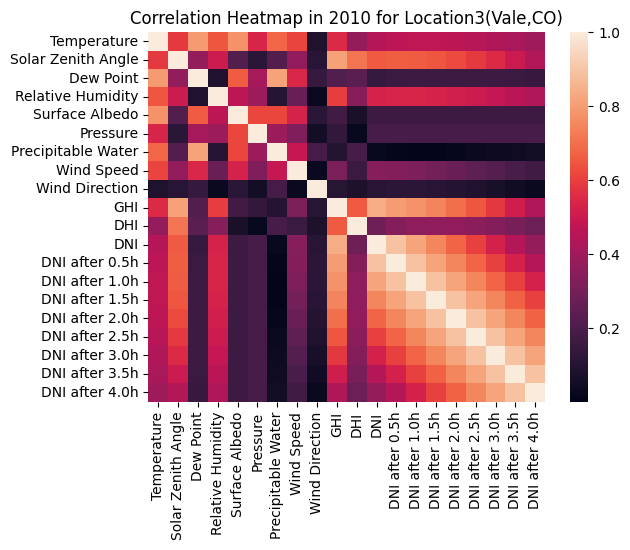

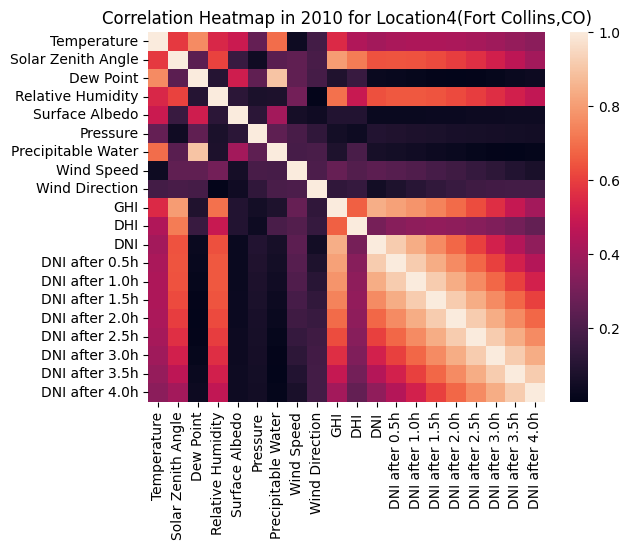

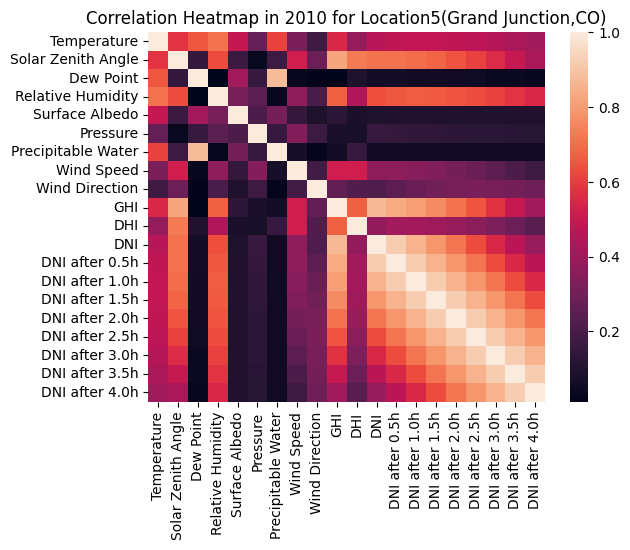

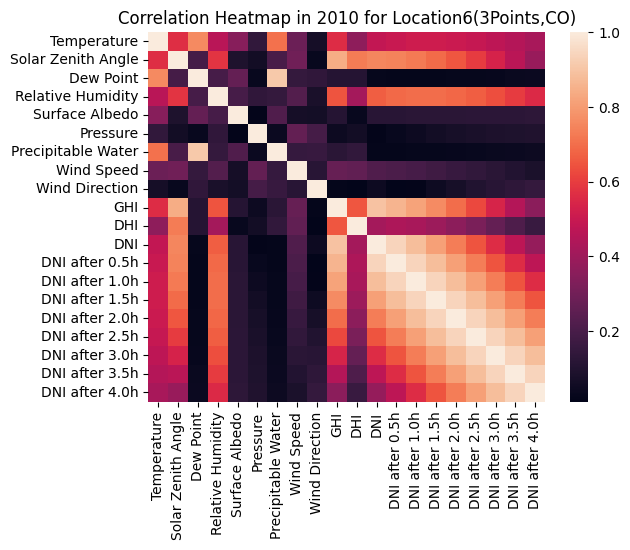

In [13]:
for i in range(locs):
    plt.clf()
    corr_matrix = abs(sub_dfs[i].corr())
    dataplot = sns.heatmap(corr_matrix)
    # displaying heatmap
    plt.title('Correlation Heatmap in 2010 for {}'.format(text[i]))
    plt.show()

In [14]:
for i in range(locs):
    sub_dfs[i].drop(['Dew Point', 'Surface Albedo', 'Pressure', 'Precipitable Water', 'Wind Speed', 'Wind Direction'], axis=1, inplace=True)

sub_dfs[1].head()

,Temperature,Solar Zenith Angle,Relative Humidity,GHI,DHI,DNI,DNI after 0.5h,DNI after 1.0h,DNI after 1.5h,DNI after 2.0h,DNI after 2.5h,DNI after 3.0h,DNI after 3.5h,DNI after 4.0h
2010-01-01 00:00:00,-8,164.18,53.95,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 00:30:00,-7,163.11,53.94,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 01:00:00,-7,159.95,52.81,0,0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 01:30:00,-7,155.51,52.81,0,0,0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2010-01-01 02:00:00,-8,150.38,53.11,0,0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


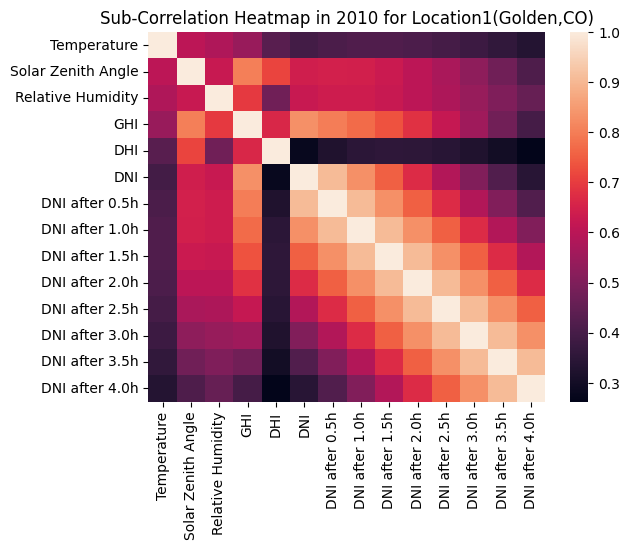

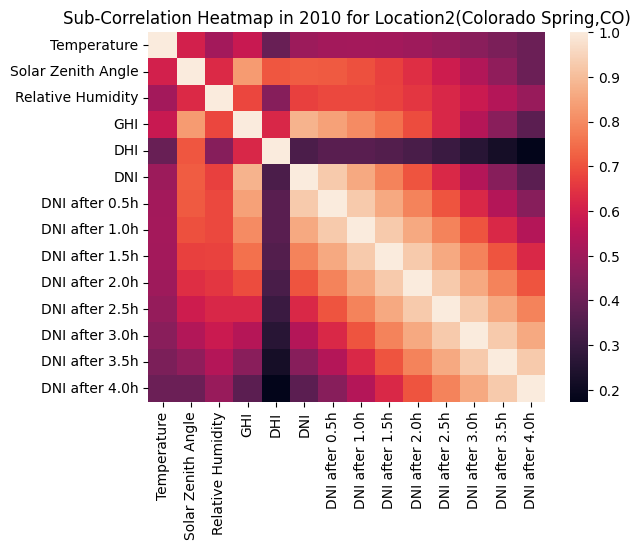

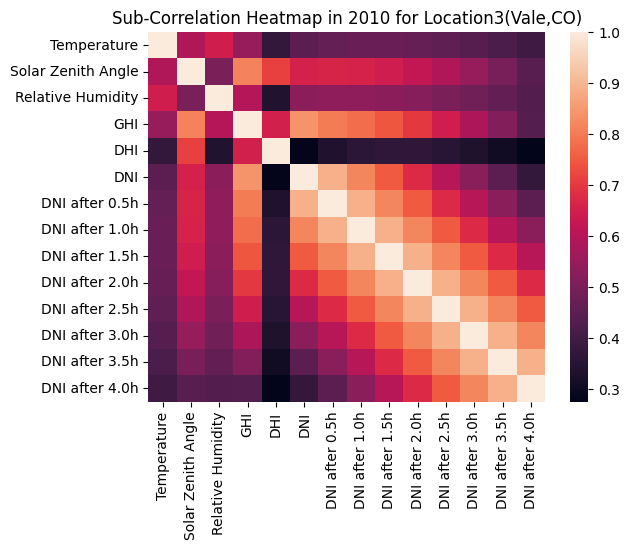

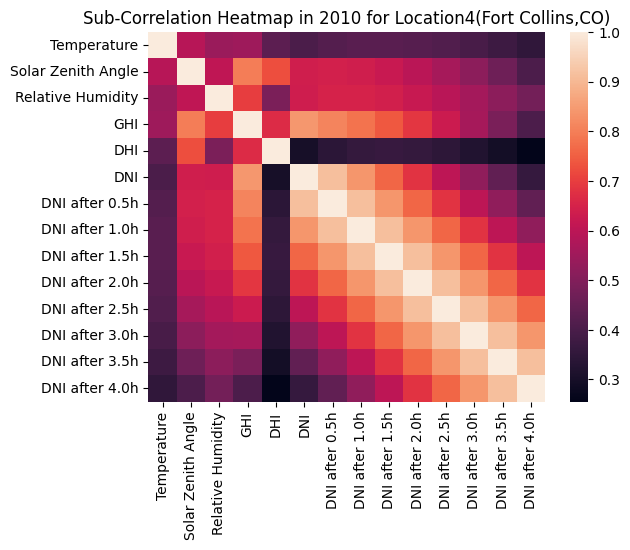

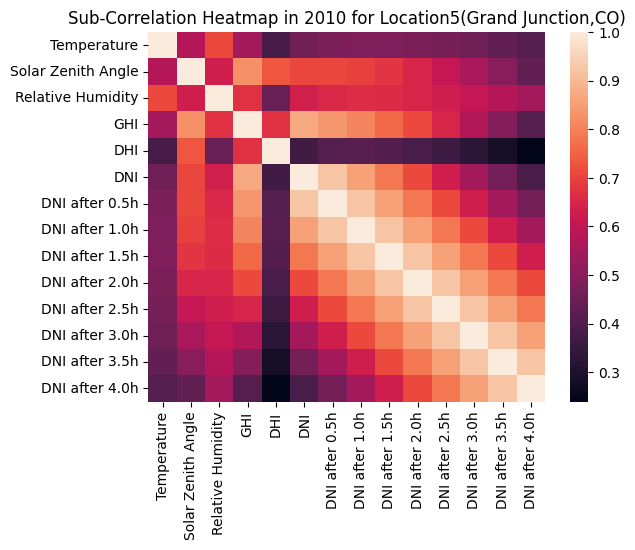

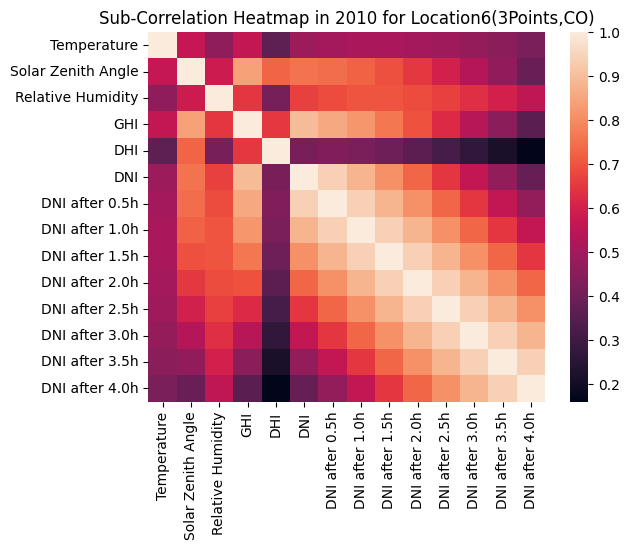

In [15]:
for i in range(locs):
    plt.clf()
    corr_matrix = abs(sub_dfs[i].corr()) 
    dataplot = sns.heatmap(corr_matrix)
    # displaying heatmap
    plt.title('Sub-Correlation Heatmap in 2010 for {}'.format(text[i]))
    plt.show()

<Figure size 640x480 with 0 Axes>

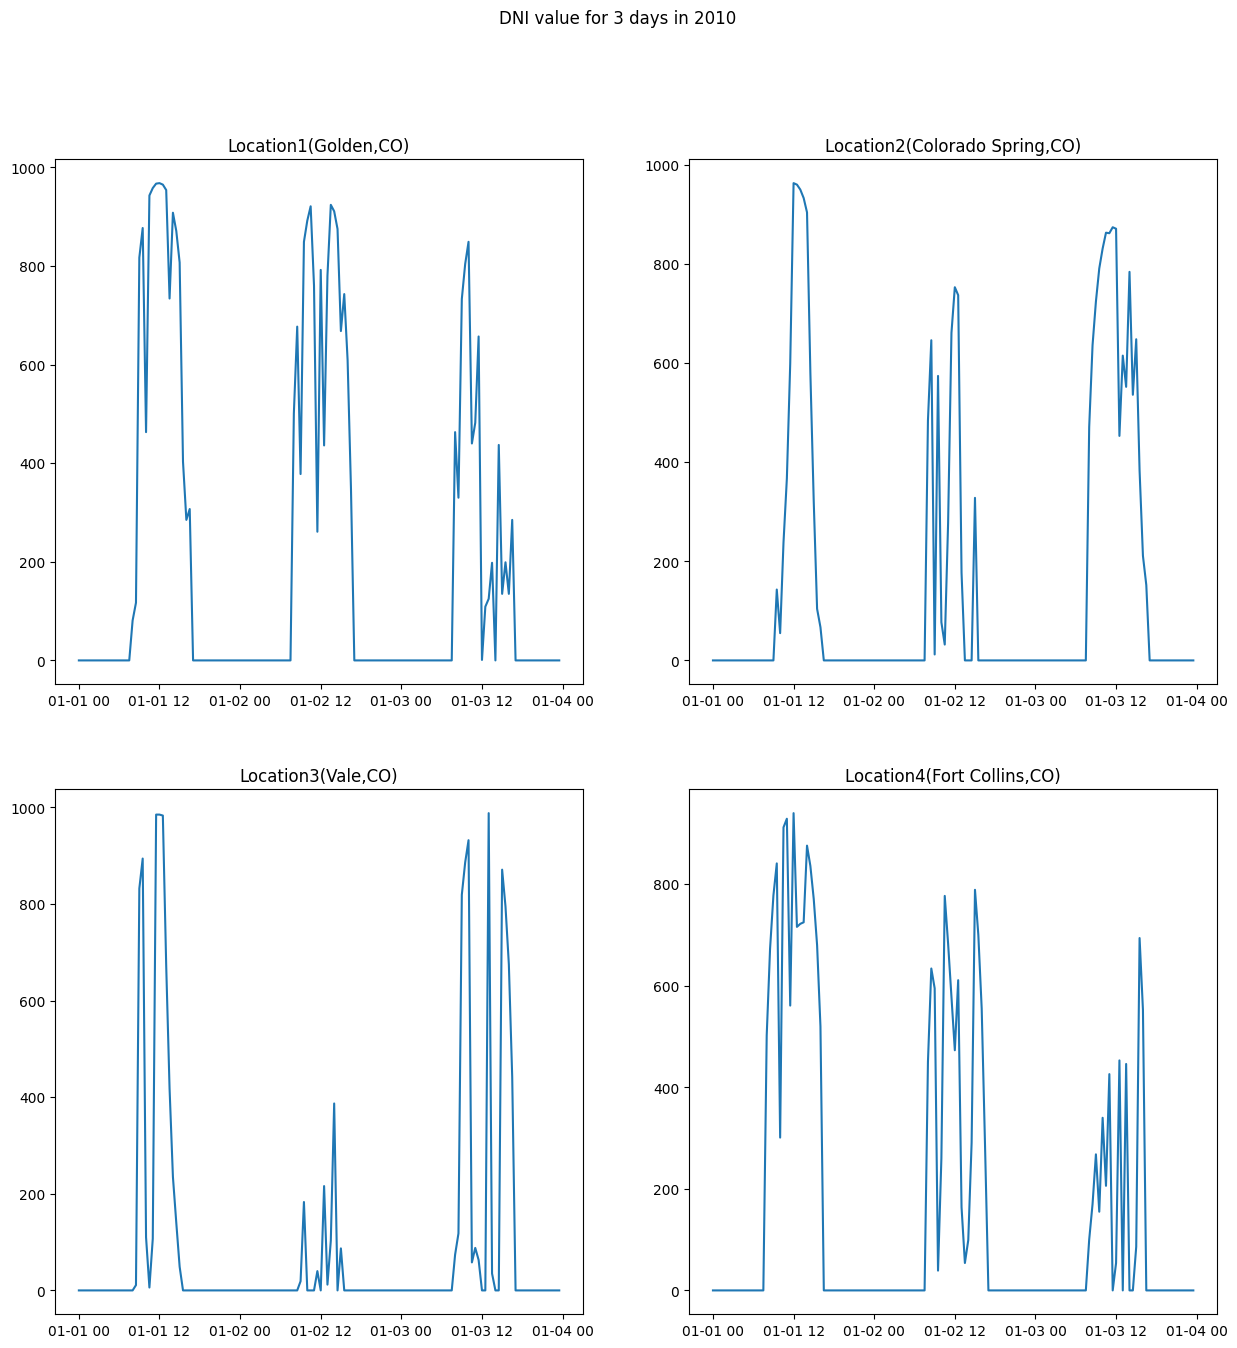

In [16]:
plt.clf()
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
plt.suptitle('DNI value for 3 days in 2010')
for i, ax in enumerate(axes.flat):
    ax.set_title(text[i])
    ax.plot(dfs[i].index[:48*3], dfs[i]['DNI'][:48*3])
    # plt.xticks(x=dfs[i].index[:48], rotation=45, ha='right')
plt.show()

<Figure size 640x480 with 0 Axes>

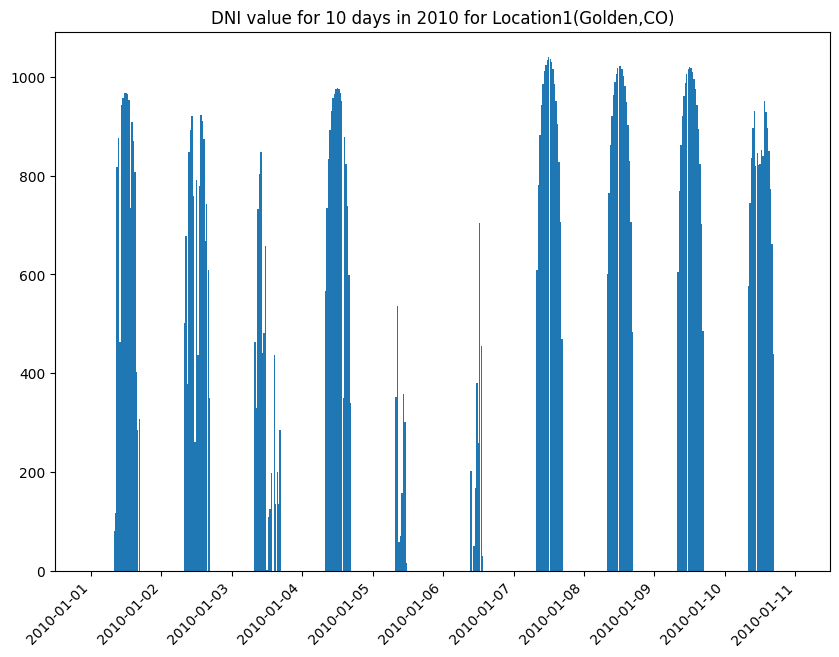

<Figure size 640x480 with 0 Axes>

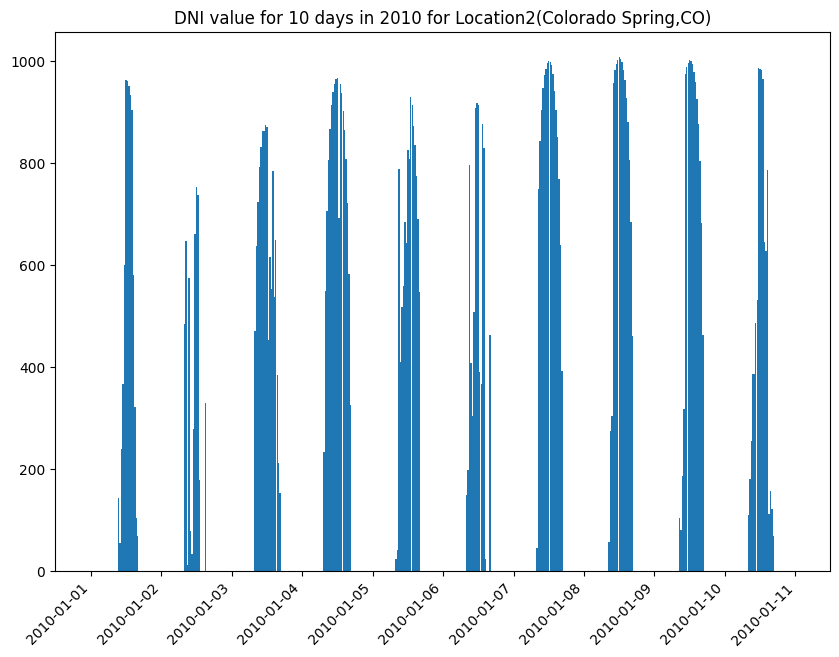

<Figure size 640x480 with 0 Axes>

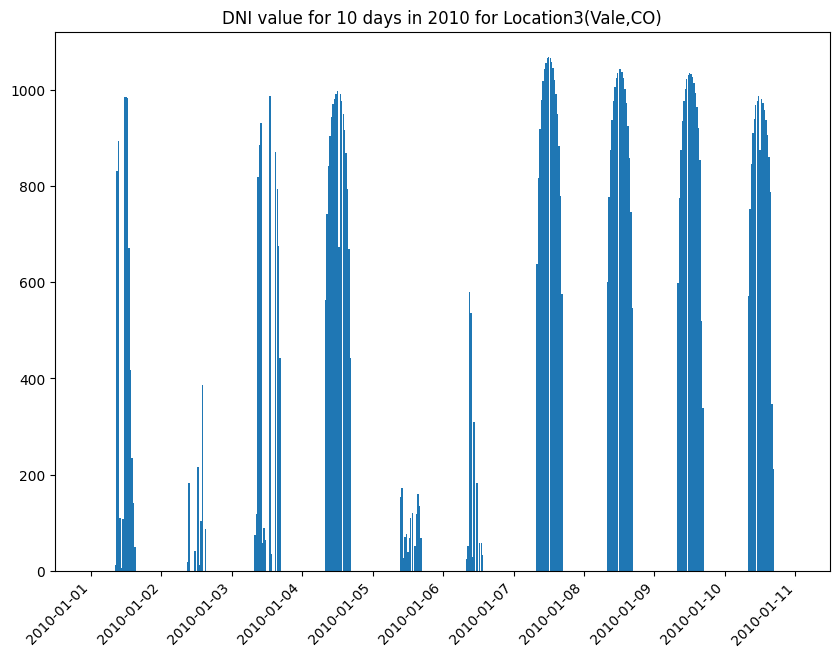

<Figure size 640x480 with 0 Axes>

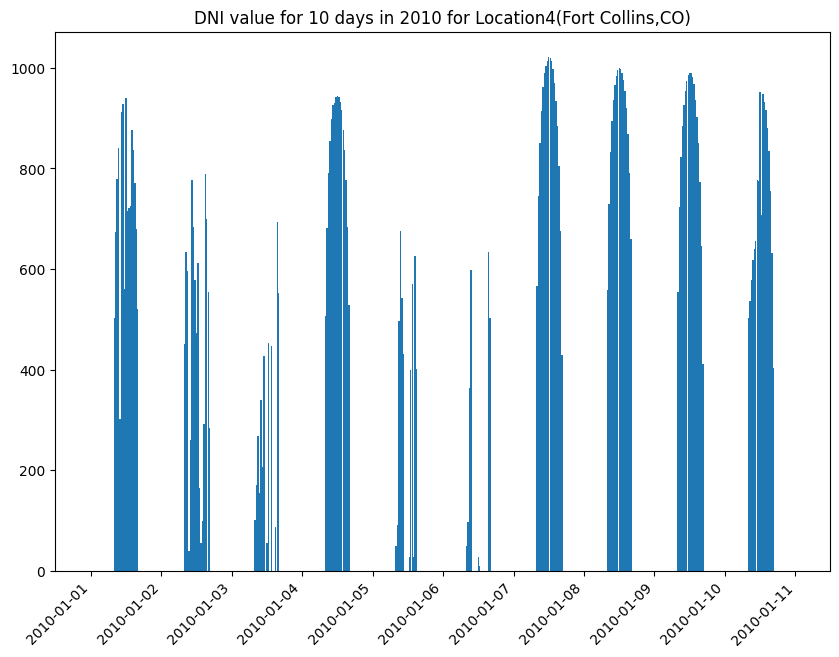

<Figure size 640x480 with 0 Axes>

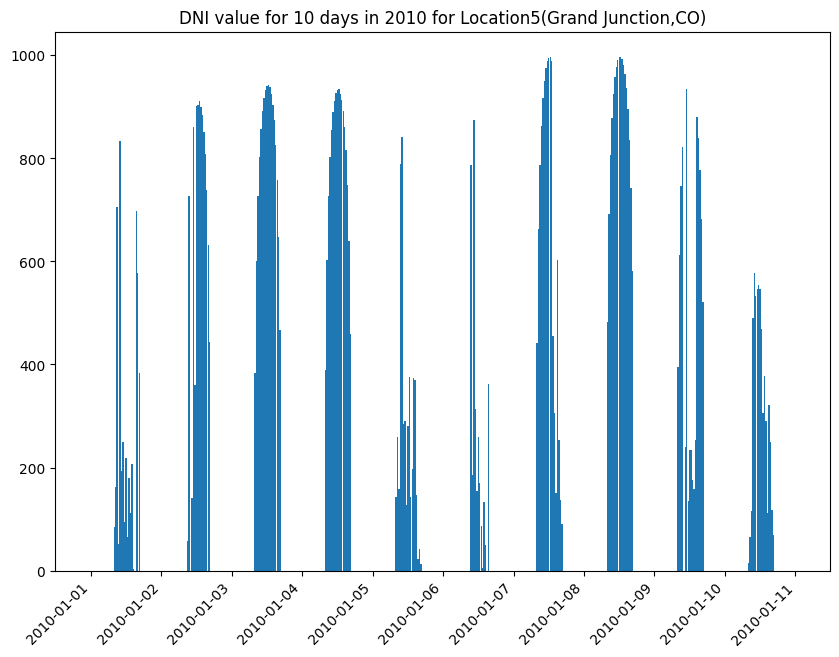

<Figure size 640x480 with 0 Axes>

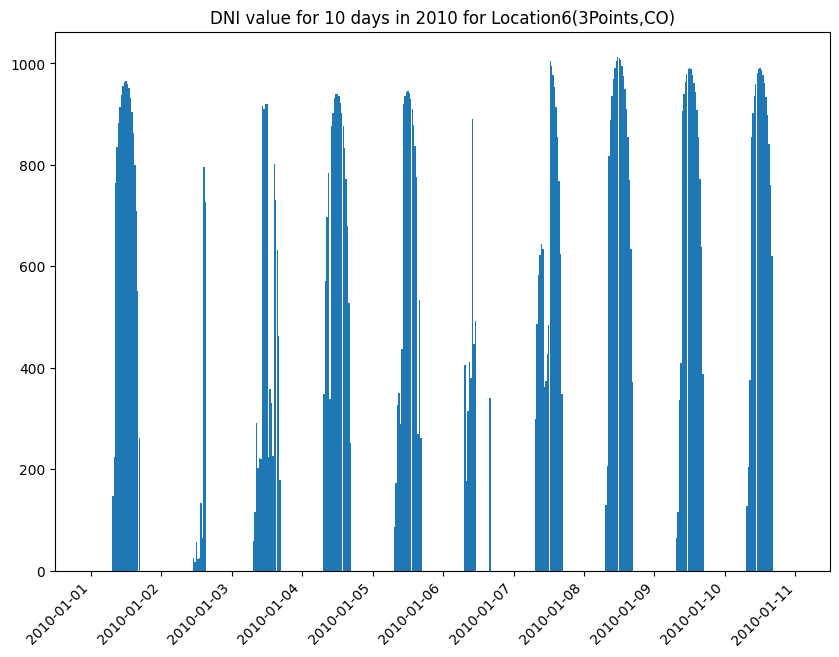

In [17]:
for i in range(locs):
    plt.clf()
    fig = plt.figure(figsize =(10, 7))
    plt.title('DNI value for 10 days in 2010 for {}'.format(text[i]))
    plt.bar(dfs[i].index[:480], dfs[i]['DNI'][:480], width=0.02)

    plt.xticks(x=dfs[i].index[:480], rotation=45, ha='right')
    plt.show()

In [18]:
win_size = 8
X_lst = []
Y_lst = []
for i in range(locs):
    df_fetures = sub_dfs[i].iloc[:,:-8]
    X = np.zeros((df_fetures.shape[0] - win_size, win_size * df_fetures.shape[1]))
    Y = np.zeros((df_fetures.shape[0] - win_size, 1))
    print("{}\nFeature array size:{}, Labels array size{}".format(text[i], X.shape, Y.shape))

    for j in range(X.shape[0]):
        chunk_x = df_fetures.iloc[j:j+win_size, :].to_numpy()
        chunk_y = df_fetures.iloc[j+win_size, -1]
        X[j] = np.reshape(chunk_x, (1, df_fetures.shape[1] * win_size))
        Y[j]= chunk_y

    X_lst.append(X)
    Y_lst.append(Y)


Location1(Golden,CO)
Feature array size:(17512, 48), Labels array size(17512, 1)
Location2(Colorado Spring,CO)
Feature array size:(17512, 48), Labels array size(17512, 1)
Location3(Vale,CO)
Feature array size:(17512, 48), Labels array size(17512, 1)
Location4(Fort Collins,CO)
Feature array size:(17512, 48), Labels array size(17512, 1)
Location5(Grand Junction,CO)
Feature array size:(17512, 48), Labels array size(17512, 1)
Location6(3Points,CO)
Feature array size:(17512, 48), Labels array size(17512, 1)


In [19]:
# Remove the labels that we are sure they have DNI of 0

for i in range(locs):
    zero_index = []
    for j in range(31, 50):     ## 31 means 7pm, and 50 means 5:30 am
        zero_index = zero_index + list(range(j, Y_lst[i].shape[0], 48))
        ### examples:
        # zero1 = list(range(34, Y.shape[0], 48))    #10pm
        # # zero2 = list(range(35, Y.shape[0], 48))    #11pm

    print("{}\nnum of zero dni: ".format(text[i]), len(zero_index))
    print("This sum must be zeroo ==> ", np.sum(np.take(Y_lst[i], zero_index)))

    Y_lst[i] = np.delete(Y_lst[i], zero_index, axis=0)
    X_lst[i] = np.delete(X_lst[i], zero_index, axis=0)
    print("{}\nFeature array size:{}, Labels array size{}".format(text[i], X_lst[i].shape, Y_lst[i].shape))


Location1(Golden,CO)
num of zero dni:  6925
This sum must be zeroo ==>  0.0
Location1(Golden,CO)
Feature array size:(10587, 48), Labels array size(10587, 1)
Location2(Colorado Spring,CO)
num of zero dni:  6925
This sum must be zeroo ==>  0.0
Location2(Colorado Spring,CO)
Feature array size:(10587, 48), Labels array size(10587, 1)
Location3(Vale,CO)
num of zero dni:  6925
This sum must be zeroo ==>  0.0
Location3(Vale,CO)
Feature array size:(10587, 48), Labels array size(10587, 1)
Location4(Fort Collins,CO)
num of zero dni:  6925
This sum must be zeroo ==>  0.0
Location4(Fort Collins,CO)
Feature array size:(10587, 48), Labels array size(10587, 1)
Location5(Grand Junction,CO)
num of zero dni:  6925
This sum must be zeroo ==>  2109.0
Location5(Grand Junction,CO)
Feature array size:(10587, 48), Labels array size(10587, 1)
Location6(3Points,CO)
num of zero dni:  6925
This sum must be zeroo ==>  0.0
Location6(3Points,CO)
Feature array size:(10587, 48), Labels array size(10587, 1)


In [20]:
big_X = np.zeros((X_lst[0].shape[0]*locs, X_lst[0].shape[1]))
big_Y = np.zeros((Y_lst[0].shape[0]*locs, Y_lst[0].shape[1]))
for i in range(locs):
    big_X[i:i+X_lst[0].shape[0], :] = X_lst[i]
    big_Y[i:i+Y_lst[0].shape[0], :] = Y_lst[i]

big_X[:10]

array([[-10.  , 163.12,  59.53,   0.  ,   0.  ,   0.  , -10.  , 162.32,
         55.02,   0.  ,   0.  ,   0.  , -10.  , 159.5 ,  55.62,   0.  ,
          0.  ,   0.  ,  -9.  , 155.34,  55.63,   0.  ,   0.  ,   0.  ,
         -9.  , 150.42,  57.88,   0.  ,   0.  ,   0.  ,  -9.  , 145.08,
         53.54,   0.  ,   0.  ,   0.  ,  -9.  , 139.51,  57.22,   0.  ,
          0.  ,   0.  ,  -9.  , 133.81,  57.23,   0.  ,   0.  ,   0.  ],
       [ -8.  , 164.18,  53.95,   0.  ,   0.  ,   0.  ,  -7.  , 163.11,
         53.94,   0.  ,   0.  ,   0.  ,  -7.  , 159.95,  52.81,   0.  ,
          0.  ,   0.  ,  -7.  , 155.51,  52.81,   0.  ,   0.  ,   0.  ,
         -8.  , 150.38,  53.11,   0.  ,   0.  ,   0.  ,  -7.  , 144.88,
         49.13,   0.  ,   0.  ,   0.  ,  -7.  , 139.18,  51.95,   0.  ,
          0.  ,   0.  ,  -7.  , 133.37,  51.95,   0.  ,   0.  ,   0.  ],
       [-16.  , 163.24,  77.64,   0.  ,   0.  ,   0.  , -16.  , 162.75,
         77.65,   0.  ,   0.  ,   0.  , -16.  , 160.13,  79.34

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

train_ratio = 0.70
validation_ratio = 0.15
test_ratio = 0.30

trainX_lst = []
valX_lst = []
testX_lst = []

trainY_lst = []
valY_lst = []
testY_lst = []

trainX_scaled_lst = []
valX_scaled_lst = []
testX_scaled_lst = []

for i in range(locs):
    trainX, testX, trainY, testY = train_test_split(X, Y, test_size= 1 - train_ratio)
    valX, testX, valY, testY = train_test_split(testX, testY, test_size=test_ratio/(test_ratio + validation_ratio))
    
    sc=StandardScaler()
    scaler = sc.fit(trainX)
    trainX_scaled = scaler.transform(trainX)
    valX_scaled = scaler.transform(valX)
    testX_scaled = scaler.transform(testX)

    trainX_lst.append(trainX)
    valX_lst.append(valX)
    testX_lst.append(testX)
    
    trainY_lst.append(trainY)
    valY_lst.append(valY)
    testY_lst.append(testY)
    
    trainX_scaled_lst.append(trainX_scaled)
    valX_scaled_lst.append(valX_scaled)
    testX_scaled_lst.append(testX_scaled)
    
    print("=== {} ===".format(text[i]))
    print("trainx size: ", trainX_scaled.shape)
    print("valx size: ", valX_scaled.shape)
    print("testx size: ", testX_scaled.shape)
    print("==============")
    print("trainy size: ", trainY.shape)
    print("valy size: ", valY.shape)
    print("testy size: ", testY.shape)
    print("==============\n\n")

=== Location1(Golden,CO) ===
trainx size:  (12258, 48)
valx size:  (1751, 48)
testx size:  (3503, 48)
trainy size:  (12258, 1)
valy size:  (1751, 1)
testy size:  (3503, 1)


=== Location2(Colorado Spring,CO) ===
trainx size:  (12258, 48)
valx size:  (1751, 48)
testx size:  (3503, 48)
trainy size:  (12258, 1)
valy size:  (1751, 1)
testy size:  (3503, 1)


=== Location3(Vale,CO) ===
trainx size:  (12258, 48)
valx size:  (1751, 48)
testx size:  (3503, 48)
trainy size:  (12258, 1)
valy size:  (1751, 1)
testy size:  (3503, 1)


=== Location4(Fort Collins,CO) ===
trainx size:  (12258, 48)
valx size:  (1751, 48)
testx size:  (3503, 48)
trainy size:  (12258, 1)
valy size:  (1751, 1)
testy size:  (3503, 1)


=== Location5(Grand Junction,CO) ===
trainx size:  (12258, 48)
valx size:  (1751, 48)
testx size:  (3503, 48)
trainy size:  (12258, 1)
valy size:  (1751, 1)
testy size:  (3503, 1)


=== Location6(3Points,CO) ===
trainx size:  (12258, 48)
valx size:  (1751, 48)
testx size:  (3503, 48)
trainy

In [22]:
big_trainX, big_testX, big_trainY, big_testY = train_test_split(big_X, big_Y, test_size= 1 - train_ratio)
big_valX, big_testX, big_valY, big_testY = train_test_split(big_testX, big_testY, test_size=test_ratio/(test_ratio + validation_ratio))
    
sc=StandardScaler()
scaler = sc.fit(trainX)
big_trainX_scaled = scaler.transform(big_trainX)
big_valX_scaled = scaler.transform(big_valX)
big_testX_scaled = scaler.transform(big_testX)

In [23]:
# let's try linear regression first
from sklearn import linear_model, metrics

y_pred_linreg_lst = []

for i in range(locs): 
    # Create linear regression object
    regr = linear_model.LinearRegression()
    
    # Train the model using the training sets
    regr.fit(trainX_scaled_lst[i], trainY_lst[i])
    
    # Make predictions using the testing set
    y_pred_linreg = regr.predict(testX_scaled_lst[i])
    y_pred_linreg_lst.append(y_pred_linreg)
    
    print("=== {} ===".format(text[i]))
    print('Mean Absolute Error:', metrics.mean_absolute_error(testY_lst[i], y_pred_linreg_lst[i]))
    print('Mean Squared Error:', metrics.mean_squared_error(testY_lst[i], y_pred_linreg_lst[i]))
    print('Root Mean Squared Error:', metrics.mean_squared_error(testY_lst[i], y_pred_linreg_lst[i], squared=False))
    print("=======\n")


=== Location1(Golden,CO) ===
Mean Absolute Error: 58.54083177036767
Mean Squared Error: 12025.921815484511
Root Mean Squared Error: 109.66276403357938

=== Location2(Colorado Spring,CO) ===
Mean Absolute Error: 61.12634665652008
Mean Squared Error: 13243.122512393476
Root Mean Squared Error: 115.07876655749085

=== Location3(Vale,CO) ===
Mean Absolute Error: 57.38179802172502
Mean Squared Error: 12158.53883435257
Root Mean Squared Error: 110.2657645615926

=== Location4(Fort Collins,CO) ===
Mean Absolute Error: 58.84657596412175
Mean Squared Error: 11668.965147738689
Root Mean Squared Error: 108.02298434934433

=== Location5(Grand Junction,CO) ===
Mean Absolute Error: 60.492431206755896
Mean Squared Error: 13073.045724816133
Root Mean Squared Error: 114.33742049222613

=== Location6(3Points,CO) ===
Mean Absolute Error: 56.675602371627384
Mean Squared Error: 11423.675244739341
Root Mean Squared Error: 106.88159450878032



In [24]:
from sklearn.svm import SVR

y_pred_svr_lst = []

for i in range(locs):
    regressor = SVR(kernel='poly')
    regressor.fit(trainX_scaled_lst[i],trainY_lst[i])
    y_pred_svr = regressor.predict(testX_scaled_lst[i])
    y_pred_svr_lst.append(y_pred_svr)
    
    print("=== {} ===".format(text[i]))
    print('Mean Absolute Error:', metrics.mean_absolute_error(testY_lst[i], y_pred_svr_lst[i]))
    print('Mean Squared Error:', metrics.mean_squared_error(testY_lst[i], y_pred_svr_lst[i]))
    print('Root Mean Squared Error:', metrics.mean_squared_error(testY_lst[i], y_pred_svr_lst[i], squared=False))
    print("=======\n")



/Users/saraabouelella/anaconda3/envs/nrel311/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


=== Location1(Golden,CO) ===
Mean Absolute Error: 143.3402711750294
Mean Squared Error: 61050.965024260855
Root Mean Squared Error: 247.08493483873283



/Users/saraabouelella/anaconda3/envs/nrel311/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


=== Location2(Colorado Spring,CO) ===
Mean Absolute Error: 144.60227110979915
Mean Squared Error: 62380.50248029461
Root Mean Squared Error: 249.76089061399227



/Users/saraabouelella/anaconda3/envs/nrel311/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


=== Location3(Vale,CO) ===
Mean Absolute Error: 140.78140159606673
Mean Squared Error: 60602.05301950985
Root Mean Squared Error: 246.17484237734337



/Users/saraabouelella/anaconda3/envs/nrel311/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


=== Location4(Fort Collins,CO) ===
Mean Absolute Error: 138.68707842569972
Mean Squared Error: 58304.793600126824
Root Mean Squared Error: 241.46385568056937



/Users/saraabouelella/anaconda3/envs/nrel311/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


=== Location5(Grand Junction,CO) ===
Mean Absolute Error: 147.13397411946488
Mean Squared Error: 64111.952619461896
Root Mean Squared Error: 253.20338192737847



/Users/saraabouelella/anaconda3/envs/nrel311/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


=== Location6(3Points,CO) ===
Mean Absolute Error: 137.4372005890504
Mean Squared Error: 57826.418745172414
Root Mean Squared Error: 240.47124307320493



In [25]:
input_shape = trainX_lst[0].shape[1]
n_batch_size = 200

n_steps_per_epoch = int(trainX_lst[0].shape[0] / n_batch_size)
n_validation_steps = int(valX_lst[0].shape[0] / n_batch_size)
n_test_steps = int(testX_lst[0].shape[0] / n_batch_size)
n_epochs = 150


print('Input Shape:{} '.format(input_shape))
print('Batch Size:{}'.format(n_batch_size))
print('Steps per Epoch:{}'.format(n_steps_per_epoch))
print('Validation Steps:{}'.format(n_validation_steps))
print('Test Steps:{}'.format(n_test_steps))
print('Number of Epochs:{}'.format(n_epochs))


Input Shape:48 
Batch Size:200
Steps per Epoch:61
Validation Steps:8
Test Steps:17
Number of Epochs:150


In [26]:
big_input_shape = big_trainX.shape[1]
n_batch_size = 200

big_n_steps_per_epoch = int(big_trainX.shape[0] / n_batch_size)
big_n_validation_steps = int(big_valX.shape[0] / n_batch_size)
big_n_test_steps = int(big_testX.shape[0] / n_batch_size)
n_epochs = 150


print('BIG Input Shape:{} '.format(big_input_shape))
print('BIG Batch Size:{}'.format(n_batch_size))
print('BIG Steps per Epoch:{}'.format(big_n_steps_per_epoch))
print('BIG Validation Steps:{}'.format(big_n_validation_steps))
print('BIG Test Steps:{}'.format(big_n_test_steps))
print('BIG Number of Epochs:{}'.format(n_epochs))

BIG Input Shape:48 
BIG Batch Size:200
BIG Steps per Epoch:222
BIG Validation Steps:31
BIG Test Steps:63
BIG Number of Epochs:150


In [27]:
import os
import shutil
import pickle as pk

from keras import models
from keras import layers
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model

from sklearn import metrics

In [28]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(input_shape,)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(loss='mse', optimizer='adam', metrics=['mae'])
    return model

In [75]:
build_model().summary()

Model: "sequential_81"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_243 (Dense)           (None, 64)                3136      
                                                                 
 dense_244 (Dense)           (None, 64)                4160      
                                                                 
 dense_245 (Dense)           (None, 1)                 65        
                                                                 
Total params: 7361 (28.75 KB)
Trainable params: 7361 (28.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [76]:
history_lst = []
checkpoint_no_lst = []
model_name_lst = []
for i in range(locs):
    model = build_model()
    model.compile(loss='mse', optimizer='adam', metrics=['mae'])
    # Prepare a directory to store all the checkpoints.
    checkpoint_no = 'ckpt_{}_ANN'.format(i+1)
    model_name = 'dnl_forcast_ANN{}'.format(i+1)
    checkpoint_no_lst.append(checkpoint_no)
    model_name_lst.append(model_name)
    checkpoint_dir = './'+ checkpoint_no
    if not os.path.exists(checkpoint_dir):
        os.makedirs(checkpoint_dir)
    keras_callbacks = [ModelCheckpoint(filepath = checkpoint_dir + '/' + model_name, monitor='val_loss', save_best_only=True, mode='auto')]
    
    history = model.fit(trainX_scaled_lst[i],
                    trainY_lst[i],
                    steps_per_epoch=n_steps_per_epoch,
                    epochs=n_epochs,
                    batch_size=n_batch_size,
                    validation_data=(valX_scaled_lst[i], valY_lst[i]),
                    validation_steps=n_validation_steps,
                    callbacks=[keras_callbacks])


    hist_df = pd.DataFrame(history.history)
    hist_df['epoch'] = hist_df.index + 1
    cols = list(hist_df.columns)
    cols = [cols[-1]] + cols[:-1]
    hist_df = hist_df[cols]
    hist_df.to_csv(checkpoint_no + '/' + 'history_df_' + model_name + '.csv')

    values_of_best_model = hist_df[hist_df.val_loss == hist_df.val_loss.min()]

    pk.dump(scaler, open(checkpoint_no + '/' + 'scaler.pkl', 'wb'))

    
    history_lst.append(history)
values_of_best_model

Epoch 1/150
 1/61 [..............................] - ETA: 14s - loss: 236653.9375 - mae: 301.7641INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 1s 6ms/step - loss: 208848.1406 - mae: 274.7729 - val_loss: 184777.1562 - val_mae: 258.6552
Epoch 2/150
 1/61 [..............................] - ETA: 0s - loss: 145647.8281 - mae: 234.1708INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 4ms/step - loss: 139704.2344 - mae: 230.8900 - val_loss: 92427.3984 - val_mae: 190.9410
Epoch 3/150
 1/61 [..............................] - ETA: 0s - loss: 91275.0391 - mae: 193.9790INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 4ms/step - loss: 73369.3281 - mae: 173.2481 - val_loss: 62303.3164 - val_mae: 160.7930
Epoch 4/150
 1/61 [..............................] - ETA: 0s - loss: 52204.2539 - mae: 141.8932INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 4ms/step - loss: 45870.7969 - mae: 137.8447 - val_loss: 36516.4609 - val_mae: 122.3869
Epoch 5/150
 1/61 [..............................] - ETA: 0s - loss: 33172.0547 - mae: 116.3107INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 4ms/step - loss: 28633.9922 - mae: 107.8022 - val_loss: 25892.2422 - val_mae: 100.0505
Epoch 6/150
 1/61 [..............................] - ETA: 0s - loss: 30409.3105 - mae: 102.7200INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 4ms/step - loss: 23386.0371 - mae: 96.1943 - val_loss: 22990.3516 - val_mae: 96.3102
Epoch 7/150
 1/61 [..............................] - ETA: 0s - loss: 26716.7852 - mae: 101.8176INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 4ms/step - loss: 21503.5020 - mae: 93.8991 - val_loss: 21542.3867 - val_mae: 93.2834
Epoch 8/150
 1/61 [..............................] - ETA: 0s - loss: 23769.8848 - mae: 93.9231INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 4ms/step - loss: 19746.4336 - mae: 88.8162 - val_loss: 20539.5957 - val_mae: 90.7403
Epoch 9/150
 1/61 [..............................] - ETA: 0s - loss: 23452.1621 - mae: 99.8764INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 4ms/step - loss: 19255.2461 - mae: 87.5889 - val_loss: 19581.6445 - val_mae: 87.1922
Epoch 10/150
 1/61 [..............................] - ETA: 0s - loss: 18089.2520 - mae: 79.3459INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 4ms/step - loss: 18001.3301 - mae: 83.4173 - val_loss: 18768.3457 - val_mae: 84.4258
Epoch 11/150
 1/61 [..............................] - ETA: 0s - loss: 15102.1504 - mae: 73.4703INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 4ms/step - loss: 17215.6875 - mae: 80.1644 - val_loss: 18006.3613 - val_mae: 79.5346
Epoch 12/150
 1/61 [..............................] - ETA: 0s - loss: 16114.6152 - mae: 70.2824INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 16141.8613 - mae: 74.6537 - val_loss: 17138.9648 - val_mae: 75.0724
Epoch 13/150
 1/61 [..............................] - ETA: 0s - loss: 12579.7764 - mae: 64.4606INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 4ms/step - loss: 15468.0508 - mae: 71.3956 - val_loss: 16573.8730 - val_mae: 72.0606
Epoch 14/150
61/61 [==============================] - ETA: 0s - loss: 14207.9082 - mae: 67.3527INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 4ms/step - loss: 14207.9082 - mae: 67.3527 - val_loss: 16135.5146 - val_mae: 69.4517
Epoch 15/150
 1/61 [..............................] - ETA: 0s - loss: 22689.1328 - mae: 80.1508INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 4ms/step - loss: 14578.4570 - mae: 67.7060 - val_loss: 15844.7500 - val_mae: 68.0086
Epoch 16/150
16/61 [======>.......................] - ETA: 0s - loss: 13033.6426 - mae: 63.3009INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 5ms/step - loss: 13447.5664 - mae: 64.2804 - val_loss: 15587.8896 - val_mae: 67.2920
Epoch 17/150
 1/61 [..............................] - ETA: 0s - loss: 12666.4600 - mae: 62.5046INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 4ms/step - loss: 13349.9033 - mae: 63.3579 - val_loss: 15306.3604 - val_mae: 65.6967
Epoch 18/150
 1/61 [..............................] - ETA: 0s - loss: 16870.5898 - mae: 67.5288INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 4ms/step - loss: 13068.9678 - mae: 61.8378 - val_loss: 15192.2158 - val_mae: 63.6985
Epoch 19/150
 1/61 [..............................] - ETA: 0s - loss: 18579.1797 - mae: 68.3862INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 4ms/step - loss: 13235.8662 - mae: 61.7676 - val_loss: 14960.1885 - val_mae: 64.4530
Epoch 20/150
 1/61 [..............................] - ETA: 0s - loss: 19731.5234 - mae: 72.2232INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 4ms/step - loss: 12543.5977 - mae: 58.5090 - val_loss: 14796.7979 - val_mae: 64.7137
Epoch 21/150
 1/61 [..............................] - ETA: 0s - loss: 10344.1621 - mae: 54.7634INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 1s 12ms/step - loss: 12131.8516 - mae: 57.6271 - val_loss: 14637.9814 - val_mae: 61.9068
Epoch 22/150
61/61 [==============================] - 0s 993us/step - loss: 12592.0938 - mae: 58.3942 - val_loss: 14698.1729 - val_mae: 60.5963
Epoch 23/150
 1/61 [..............................] - ETA: 0s - loss: 13845.9824 - mae: 55.6200INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 12181.8174 - mae: 56.4315 - val_loss: 14502.2236 - val_mae: 60.9787
Epoch 24/150
 1/61 [..............................] - ETA: 0s - loss: 16061.5879 - mae: 60.7861INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 4ms/step - loss: 12566.5859 - mae: 57.2746 - val_loss: 14427.9746 - val_mae: 60.4254
Epoch 25/150
 1/61 [..............................] - ETA: 0s - loss: 15047.5928 - mae: 61.5561INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 4ms/step - loss: 11791.9785 - mae: 55.0720 - val_loss: 14329.4629 - val_mae: 59.9870
Epoch 26/150
61/61 [==============================] - 0s 941us/step - loss: 11531.5693 - mae: 54.2356 - val_loss: 14528.2188 - val_mae: 57.8835
Epoch 27/150
 1/61 [..............................] - ETA: 0s - loss: 9240.4795 - mae: 50.3413INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 4ms/step - loss: 12301.7188 - mae: 56.1052 - val_loss: 14181.6904 - val_mae: 58.6802
Epoch 28/150
61/61 [==============================] - ETA: 0s - loss: 11136.4668 - mae: 52.3407INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 4ms/step - loss: 11136.4668 - mae: 52.3407 - val_loss: 14150.2236 - val_mae: 57.9487
Epoch 29/150
 1/61 [..............................] - ETA: 0s - loss: 8896.0508 - mae: 51.6004INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 11923.8994 - mae: 54.3514 - val_loss: 14044.1367 - val_mae: 58.3520
Epoch 30/150
 1/61 [..............................] - ETA: 0s - loss: 13618.9229 - mae: 58.8499INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 11637.6914 - mae: 53.1544 - val_loss: 13988.0342 - val_mae: 57.7968
Epoch 31/150
 1/61 [..............................] - ETA: 0s - loss: 9175.9600 - mae: 49.2609INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 4ms/step - loss: 11427.9102 - mae: 52.9695 - val_loss: 13976.5449 - val_mae: 56.4467
Epoch 32/150
 1/61 [..............................] - ETA: 0s - loss: 9949.0391 - mae: 48.1254INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 4ms/step - loss: 11626.1680 - mae: 52.5156 - val_loss: 13875.2412 - val_mae: 56.7868
Epoch 33/150
45/61 [=====================>........] - ETA: 0s - loss: 11368.8018 - mae: 52.2002INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 4ms/step - loss: 11004.7100 - mae: 51.3315 - val_loss: 13791.2051 - val_mae: 57.0716
Epoch 34/150
61/61 [==============================] - 0s 1ms/step - loss: 11766.3887 - mae: 52.8190 - val_loss: 13924.8721 - val_mae: 56.9698
Epoch 35/150
61/61 [==============================] - 0s 921us/step - loss: 10877.3398 - mae: 51.0724 - val_loss: 13793.3076 - val_mae: 55.8515
Epoch 36/150
 1/61 [..............................] - ETA: 0s - loss: 14539.1914 - mae: 53.3090INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 4ms/step - loss: 11209.5605 - mae: 50.6764 - val_loss: 13716.2383 - val_mae: 55.0871
Epoch 37/150
 1/61 [..............................] - ETA: 0s - loss: 15399.1426 - mae: 60.1205INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 4ms/step - loss: 11886.6943 - mae: 52.9953 - val_loss: 13623.0342 - val_mae: 55.5246
Epoch 38/150
 1/61 [..............................] - ETA: 0s - loss: 12332.6973 - mae: 55.7201INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 4ms/step - loss: 10916.7188 - mae: 50.3476 - val_loss: 13603.6191 - val_mae: 54.2867
Epoch 39/150
 1/61 [..............................] - ETA: 0s - loss: 8391.1709 - mae: 47.5009INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 4ms/step - loss: 11248.0654 - mae: 50.6102 - val_loss: 13540.3877 - val_mae: 55.1858
Epoch 40/150
 1/61 [..............................] - ETA: 0s - loss: 6711.2749 - mae: 39.2720INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 4ms/step - loss: 10809.5244 - mae: 49.6372 - val_loss: 13530.8213 - val_mae: 54.0205
Epoch 41/150
 1/61 [..............................] - ETA: 0s - loss: 8588.4463 - mae: 42.7241INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 4ms/step - loss: 11541.5557 - mae: 51.1999 - val_loss: 13483.8525 - val_mae: 53.9177
Epoch 42/150
61/61 [==============================] - 0s 959us/step - loss: 11134.5088 - mae: 50.2895 - val_loss: 13528.5479 - val_mae: 55.2930
Epoch 43/150
61/61 [==============================] - 0s 937us/step - loss: 10736.7607 - mae: 49.3616 - val_loss: 13586.7051 - val_mae: 57.2412
Epoch 44/150
 1/61 [..............................] - ETA: 0s - loss: 6508.9912 - mae: 43.2559INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 4ms/step - loss: 10958.3545 - mae: 49.4430 - val_loss: 13457.9004 - val_mae: 53.0632
Epoch 45/150
 1/61 [..............................] - ETA: 0s - loss: 8473.2295 - mae: 46.3493INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 4ms/step - loss: 10780.8164 - mae: 49.3836 - val_loss: 13450.3350 - val_mae: 53.8911
Epoch 46/150
61/61 [==============================] - 0s 924us/step - loss: 11215.9639 - mae: 49.2989 - val_loss: 13673.9824 - val_mae: 52.5651
Epoch 47/150
 1/61 [..............................] - ETA: 0s - loss: 11843.0947 - mae: 53.6725INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 10988.5039 - mae: 50.6979 - val_loss: 13362.9648 - val_mae: 54.2306
Epoch 48/150
61/61 [==============================] - 0s 887us/step - loss: 10969.8291 - mae: 49.3458 - val_loss: 13497.5977 - val_mae: 54.4306
Epoch 49/150
61/61 [==============================] - 0s 878us/step - loss: 10938.1924 - mae: 49.8681 - val_loss: 13473.9551 - val_mae: 55.5475
Epoch 50/150
61/61 [==============================] - 0s 927us/step - loss: 10694.4307 - mae: 49.3989 - val_loss: 13391.2695 - val_mae: 53.9787
Epoch 51/150
 1/61 [..............................] - ETA: 0s - loss: 9649.1846 - mae: 46.3863INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 4ms/step - loss: 10894.1406 - mae: 49.0321 - val_loss: 13261.1504 - val_mae: 52.9119
Epoch 52/150
61/61 [==============================] - 0s 967us/step - loss: 11179.1543 - mae: 49.3738 - val_loss: 13497.0820 - val_mae: 52.2619
Epoch 53/150
61/61 [==============================] - 0s 946us/step - loss: 10664.5107 - mae: 48.0651 - val_loss: 13313.9229 - val_mae: 53.0102
Epoch 54/150
 1/61 [..............................] - ETA: 0s - loss: 10250.2148 - mae: 51.8299INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 11011.8965 - mae: 49.1002 - val_loss: 13199.9375 - val_mae: 52.3295
Epoch 55/150
61/61 [==============================] - 0s 907us/step - loss: 10535.1250 - mae: 48.1251 - val_loss: 13224.3945 - val_mae: 52.5364
Epoch 56/150
 1/61 [..............................] - ETA: 0s - loss: 8849.5928 - mae: 46.4877INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 10890.0996 - mae: 48.7165 - val_loss: 13193.0146 - val_mae: 53.7278
Epoch 57/150
61/61 [==============================] - 0s 1ms/step - loss: 10749.1748 - mae: 48.2422 - val_loss: 13349.3984 - val_mae: 52.7045
Epoch 58/150
61/61 [==============================] - 0s 937us/step - loss: 10678.3252 - mae: 48.7725 - val_loss: 13246.4404 - val_mae: 51.4144
Epoch 59/150
 1/61 [..............................] - ETA: 0s - loss: 4808.4692 - mae: 31.6895INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 10881.1592 - mae: 48.1971 - val_loss: 13181.3604 - val_mae: 51.4381
Epoch 60/150
61/61 [==============================] - 0s 937us/step - loss: 10602.3633 - mae: 47.7374 - val_loss: 13181.5820 - val_mae: 51.6639
Epoch 61/150
 1/61 [..............................] - ETA: 0s - loss: 11681.3662 - mae: 46.1662INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 4ms/step - loss: 10689.9863 - mae: 48.3970 - val_loss: 13134.1602 - val_mae: 55.8716
Epoch 62/150
 1/61 [..............................] - ETA: 0s - loss: 6329.0073 - mae: 45.4825INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 4ms/step - loss: 10738.6729 - mae: 48.2667 - val_loss: 13115.9902 - val_mae: 53.1628
Epoch 63/150
 1/61 [..............................] - ETA: 0s - loss: 9475.1035 - mae: 50.8417INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 4ms/step - loss: 10698.8779 - mae: 48.1988 - val_loss: 13087.4570 - val_mae: 54.3963
Epoch 64/150
 1/61 [..............................] - ETA: 0s - loss: 8700.1250 - mae: 39.9893INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 4ms/step - loss: 10733.7246 - mae: 48.0947 - val_loss: 13065.3477 - val_mae: 52.3032
Epoch 65/150
61/61 [==============================] - 0s 916us/step - loss: 10710.6475 - mae: 48.0429 - val_loss: 13091.4990 - val_mae: 51.4019
Epoch 66/150
61/61 [==============================] - 0s 914us/step - loss: 10467.4453 - mae: 47.1661 - val_loss: 13073.8428 - val_mae: 52.3844
Epoch 67/150
 1/61 [..............................] - ETA: 0s - loss: 13297.6260 - mae: 49.8796INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 1s 9ms/step - loss: 10726.1992 - mae: 48.0928 - val_loss: 13015.0430 - val_mae: 54.2436
Epoch 68/150
61/61 [==============================] - 0s 2ms/step - loss: 10523.0039 - mae: 48.1991 - val_loss: 13025.1592 - val_mae: 52.3038
Epoch 69/150
61/61 [==============================] - 0s 894us/step - loss: 10773.4668 - mae: 48.0250 - val_loss: 13053.3877 - val_mae: 52.3001
Epoch 70/150
 1/61 [..............................] - ETA: 0s - loss: 13306.0371 - mae: 50.4012INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 4ms/step - loss: 10576.7422 - mae: 47.6551 - val_loss: 12973.2842 - val_mae: 51.8031
Epoch 71/150
 1/61 [..............................] - ETA: 0s - loss: 12311.4922 - mae: 50.5166INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 4ms/step - loss: 10645.4590 - mae: 47.9275 - val_loss: 12971.7139 - val_mae: 51.3963
Epoch 72/150
61/61 [==============================] - 0s 991us/step - loss: 10656.2783 - mae: 47.8806 - val_loss: 12978.7227 - val_mae: 50.7060
Epoch 73/150
61/61 [==============================] - 0s 923us/step - loss: 10288.1826 - mae: 46.3783 - val_loss: 13048.1025 - val_mae: 50.3145
Epoch 74/150
61/61 [==============================] - 0s 944us/step - loss: 10520.1475 - mae: 47.4065 - val_loss: 13132.9824 - val_mae: 50.9053
Epoch 75/150
61/61 [==============================] - 0s 916us/step - loss: 10401.5303 - mae: 47.1609 - val_loss: 13092.3291 - val_mae: 49.8901
Epoch 76/150
61/61 [==============================] - 0s 879us/step - loss: 10356.5557 - mae: 47.0193 - val_loss: 13131.9805 - val_mae: 51.5037
Epoch 77/150
 1/61 [..............................] - ETA: 0s - loss: 11150.3213 - mae: 49.5802INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forc

INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 10807.2539 - mae: 47.9961 - val_loss: 12955.0840 - val_mae: 52.2786
Epoch 78/150
61/61 [==============================] - 0s 875us/step - loss: 10688.1729 - mae: 47.4180 - val_loss: 13003.3320 - val_mae: 53.1458
Epoch 79/150
 1/61 [..............................] - ETA: 0s - loss: 6158.0894 - mae: 38.9254INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 10390.2051 - mae: 48.0462 - val_loss: 12932.7637 - val_mae: 50.7099
Epoch 80/150
 1/61 [..............................] - ETA: 0s - loss: 8496.5410 - mae: 44.5802INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 10178.1514 - mae: 45.8953 - val_loss: 12930.1152 - val_mae: 50.9684
Epoch 81/150
 1/61 [..............................] - ETA: 0s - loss: 11441.2090 - mae: 51.3262INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 4ms/step - loss: 11024.0742 - mae: 49.1352 - val_loss: 12926.0615 - val_mae: 50.3009
Epoch 82/150
 1/61 [..............................] - ETA: 0s - loss: 7192.9531 - mae: 42.5725INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 4ms/step - loss: 10261.4629 - mae: 46.7090 - val_loss: 12897.9297 - val_mae: 51.8081
Epoch 83/150
 1/61 [..............................] - ETA: 0s - loss: 14290.1338 - mae: 56.6755INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 4ms/step - loss: 10264.9248 - mae: 46.5451 - val_loss: 12848.7559 - val_mae: 50.5727
Epoch 84/150
61/61 [==============================] - 0s 962us/step - loss: 10382.7061 - mae: 47.0807 - val_loss: 12973.0703 - val_mae: 49.9881
Epoch 85/150
 1/61 [..............................] - ETA: 0s - loss: 4950.8936 - mae: 31.4534INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 4ms/step - loss: 10303.3662 - mae: 46.6875 - val_loss: 12820.3877 - val_mae: 50.9535
Epoch 86/150
61/61 [==============================] - 0s 943us/step - loss: 10897.9844 - mae: 48.2192 - val_loss: 12857.0898 - val_mae: 51.3724
Epoch 87/150
61/61 [==============================] - 0s 907us/step - loss: 10530.7080 - mae: 47.3487 - val_loss: 12903.0459 - val_mae: 50.4144
Epoch 88/150
61/61 [==============================] - 0s 932us/step - loss: 10110.8633 - mae: 45.7561 - val_loss: 12930.7002 - val_mae: 49.5223
Epoch 89/150
61/61 [==============================] - 0s 946us/step - loss: 10736.1797 - mae: 47.9540 - val_loss: 12947.5537 - val_mae: 50.2510
Epoch 90/150
 1/61 [..............................] - ETA: 0s - loss: 8395.1045 - mae: 46.2700INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 4ms/step - loss: 10157.8408 - mae: 45.8542 - val_loss: 12803.4648 - val_mae: 51.6555
Epoch 91/150
61/61 [==============================] - 0s 1ms/step - loss: 10420.4775 - mae: 47.2438 - val_loss: 13108.4521 - val_mae: 52.2086
Epoch 92/150
61/61 [==============================] - 0s 968us/step - loss: 10502.9121 - mae: 48.1587 - val_loss: 12963.1748 - val_mae: 50.4590
Epoch 93/150
61/61 [==============================] - 0s 906us/step - loss: 10106.4434 - mae: 46.5977 - val_loss: 12920.4990 - val_mae: 52.1775
Epoch 94/150
61/61 [==============================] - 0s 927us/step - loss: 10783.8750 - mae: 47.8033 - val_loss: 12901.3037 - val_mae: 50.9126
Epoch 95/150
 1/61 [..............................] - ETA: 0s - loss: 6924.4336 - mae: 39.0984INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 4ms/step - loss: 9964.7744 - mae: 45.7726 - val_loss: 12781.5430 - val_mae: 52.8929
Epoch 96/150
61/61 [==============================] - 0s 987us/step - loss: 10448.8369 - mae: 47.1915 - val_loss: 12817.4570 - val_mae: 50.3780
Epoch 97/150
 1/61 [..............................] - ETA: 0s - loss: 11434.8262 - mae: 50.1091INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 4ms/step - loss: 10155.8516 - mae: 45.9994 - val_loss: 12776.8896 - val_mae: 51.2871
Epoch 98/150
61/61 [==============================] - 0s 885us/step - loss: 10917.3545 - mae: 47.4783 - val_loss: 12816.5010 - val_mae: 51.6855
Epoch 99/150
61/61 [==============================] - 0s 995us/step - loss: 9737.9990 - mae: 46.4641 - val_loss: 12974.9414 - val_mae: 50.4518
Epoch 100/150
61/61 [==============================] - 0s 879us/step - loss: 10090.5059 - mae: 46.1083 - val_loss: 12846.7285 - val_mae: 52.9479
Epoch 101/150
61/61 [==============================] - 0s 941us/step - loss: 10727.1660 - mae: 47.5536 - val_loss: 12909.3652 - val_mae: 50.1911
Epoch 102/150
61/61 [==============================] - 0s 941us/step - loss: 9926.2910 - mae: 45.2334 - val_loss: 12922.2686 - val_mae: 52.8808
Epoch 103/150
61/61 [==============================] - 0s 938us/step - loss: 10487.2627 - mae: 47.2183 - val_loss: 12827.7852 - val_mae: 53.4765
Epoch

INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 4ms/step - loss: 10252.3018 - mae: 47.2534 - val_loss: 12743.0742 - val_mae: 51.0234
Epoch 108/150
 1/61 [..............................] - ETA: 0s - loss: 12174.4287 - mae: 48.1504INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 10394.6787 - mae: 46.4298 - val_loss: 12735.6729 - val_mae: 51.5126
Epoch 109/150
61/61 [==============================] - 0s 934us/step - loss: 10255.0605 - mae: 46.6858 - val_loss: 12773.9209 - val_mae: 54.7640
Epoch 110/150
61/61 [==============================] - 0s 923us/step - loss: 10248.3936 - mae: 46.2751 - val_loss: 12765.6201 - val_mae: 52.1295
Epoch 111/150
61/61 [==============================] - 0s 924us/step - loss: 10063.2520 - mae: 45.8765 - val_loss: 12814.0000 - val_mae: 49.8827
Epoch 112/150
 1/61 [..............................] - ETA: 0s - loss: 17897.0254 - mae: 55.2932INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 4ms/step - loss: 10052.0947 - mae: 45.8441 - val_loss: 12728.4541 - val_mae: 50.4659
Epoch 113/150
61/61 [==============================] - 0s 968us/step - loss: 10004.5977 - mae: 45.8968 - val_loss: 12755.7998 - val_mae: 51.2781
Epoch 114/150
61/61 [==============================] - 0s 912us/step - loss: 10179.0205 - mae: 46.8820 - val_loss: 12841.9434 - val_mae: 52.4324
Epoch 115/150
 1/61 [..............................] - ETA: 0s - loss: 10725.9824 - mae: 47.1608INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 4ms/step - loss: 10295.0537 - mae: 46.8627 - val_loss: 12717.6963 - val_mae: 49.7906
Epoch 116/150
 1/61 [..............................] - ETA: 0s - loss: 16502.7734 - mae: 56.1085INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 4ms/step - loss: 10141.7246 - mae: 45.9213 - val_loss: 12717.0283 - val_mae: 49.5598
Epoch 117/150
 1/61 [..............................] - ETA: 0s - loss: 12882.5625 - mae: 48.9991INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 4ms/step - loss: 10162.4414 - mae: 46.7141 - val_loss: 12688.9697 - val_mae: 51.0782
Epoch 118/150
61/61 [==============================] - 0s 886us/step - loss: 10183.2129 - mae: 46.3440 - val_loss: 12929.5371 - val_mae: 52.0633
Epoch 119/150
61/61 [==============================] - 0s 890us/step - loss: 9970.5781 - mae: 45.7448 - val_loss: 12723.5000 - val_mae: 51.4966
Epoch 120/150
61/61 [==============================] - 0s 918us/step - loss: 10128.7500 - mae: 46.3659 - val_loss: 12943.3760 - val_mae: 50.1663
Epoch 121/150
61/61 [==============================] - 0s 976us/step - loss: 10131.5518 - mae: 46.6131 - val_loss: 12718.7490 - val_mae: 50.2886
Epoch 122/150
61/61 [==============================] - 0s 920us/step - loss: 10225.0752 - mae: 46.1643 - val_loss: 12702.1260 - val_mae: 50.9654
Epoch 123/150
61/61 [==============================] - 0s 944us/step - loss: 10047.2754 - mae: 45.8847 - val_loss: 12778.8125 - val_mae: 50.3497
Ep

INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 4ms/step - loss: 10102.7598 - mae: 46.3726 - val_loss: 12686.3242 - val_mae: 50.0502
Epoch 126/150
61/61 [==============================] - 0s 870us/step - loss: 10023.8252 - mae: 45.9076 - val_loss: 12739.1650 - val_mae: 50.7082
Epoch 127/150
61/61 [==============================] - 0s 867us/step - loss: 10134.8525 - mae: 46.1524 - val_loss: 12729.7266 - val_mae: 51.4956
Epoch 128/150
61/61 [==============================] - 0s 869us/step - loss: 10032.8857 - mae: 45.5741 - val_loss: 12782.9287 - val_mae: 50.9000
Epoch 129/150
61/61 [==============================] - 0s 839us/step - loss: 9970.6514 - mae: 45.8676 - val_loss: 12716.0430 - val_mae: 50.8226
Epoch 130/150
61/61 [==============================] - 0s 838us/step - loss: 9873.4746 - mae: 46.0914 - val_loss: 12947.6367 - val_mae: 50.2480
Epoch 131/150
 1/61 [..............................] - ETA: 0s - loss: 13940.3252 - mae: 53.5433INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_

INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 10267.1113 - mae: 47.0533 - val_loss: 12672.1602 - val_mae: 52.4329
Epoch 132/150
61/61 [==============================] - 0s 916us/step - loss: 9835.7607 - mae: 45.8926 - val_loss: 12677.1738 - val_mae: 51.4195
Epoch 133/150
61/61 [==============================] - 0s 841us/step - loss: 10008.4277 - mae: 46.4681 - val_loss: 12784.9902 - val_mae: 50.4270
Epoch 134/150
61/61 [==============================] - 0s 908us/step - loss: 10258.1475 - mae: 46.7480 - val_loss: 12786.1592 - val_mae: 49.5073
Epoch 135/150
61/61 [==============================] - 0s 955us/step - loss: 9593.0166 - mae: 44.8799 - val_loss: 12718.8086 - val_mae: 50.1871
Epoch 136/150
61/61 [==============================] - 0s 991us/step - loss: 10360.0879 - mae: 46.4418 - val_loss: 12788.5039 - val_mae: 50.1663
Epoch 137/150
 1/61 [..............................] - ETA: 0s - loss: 11300.1260 - mae: 50.6020INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_

INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 4ms/step - loss: 9924.1006 - mae: 46.1329 - val_loss: 12633.2900 - val_mae: 51.6945
Epoch 138/150
61/61 [==============================] - 0s 966us/step - loss: 9670.4287 - mae: 45.2384 - val_loss: 12756.4258 - val_mae: 50.8572
Epoch 139/150
61/61 [==============================] - 0s 939us/step - loss: 10273.8076 - mae: 46.4430 - val_loss: 12745.1729 - val_mae: 51.7382
Epoch 140/150
61/61 [==============================] - 0s 949us/step - loss: 9929.5381 - mae: 45.5150 - val_loss: 12728.5176 - val_mae: 51.0406
Epoch 141/150
61/61 [==============================] - 0s 857us/step - loss: 9806.4775 - mae: 45.8642 - val_loss: 12827.3027 - val_mae: 50.3770
Epoch 142/150
61/61 [==============================] - 0s 826us/step - loss: 10191.4160 - mae: 46.2002 - val_loss: 12667.0400 - val_mae: 51.8657
Epoch 143/150
61/61 [==============================] - 0s 859us/step - loss: 9851.8828 - mae: 45.8728 - val_loss: 12843.4248 - val_mae: 51.3764
Epoch 

INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 4ms/step - loss: 206472.5781 - mae: 274.9211 - val_loss: 180940.0938 - val_mae: 260.2190
Epoch 2/150
 1/61 [..............................] - ETA: 0s - loss: 213558.1406 - mae: 297.4566INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 4ms/step - loss: 121554.6094 - mae: 219.7226 - val_loss: 78489.4531 - val_mae: 181.3663
Epoch 3/150
 1/61 [..............................] - ETA: 0s - loss: 66285.7109 - mae: 155.4072INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 4ms/step - loss: 61602.8242 - mae: 162.6826 - val_loss: 44076.1484 - val_mae: 138.0529
Epoch 4/150
 1/61 [..............................] - ETA: 0s - loss: 45986.2188 - mae: 139.0911INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 4ms/step - loss: 34033.3789 - mae: 118.8542 - val_loss: 26204.3457 - val_mae: 103.5844
Epoch 5/150
 1/61 [..............................] - ETA: 0s - loss: 25806.7148 - mae: 99.2251INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 4ms/step - loss: 24398.2090 - mae: 99.1162 - val_loss: 22150.8809 - val_mae: 96.6762
Epoch 6/150
 1/61 [..............................] - ETA: 0s - loss: 21479.2871 - mae: 96.3122INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 4ms/step - loss: 21652.7031 - mae: 93.9248 - val_loss: 20364.4668 - val_mae: 92.8586
Epoch 7/150
 1/61 [..............................] - ETA: 0s - loss: 17649.1484 - mae: 81.8963INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 4ms/step - loss: 20795.4258 - mae: 91.9825 - val_loss: 18996.1191 - val_mae: 89.7604
Epoch 8/150
 1/61 [..............................] - ETA: 0s - loss: 26512.9297 - mae: 102.1158INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 3ms/step - loss: 19470.4414 - mae: 87.7892 - val_loss: 17788.3965 - val_mae: 86.0255
Epoch 9/150
 1/61 [..............................] - ETA: 0s - loss: 18470.5781 - mae: 81.6550INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 4ms/step - loss: 18662.3555 - mae: 85.0708 - val_loss: 16839.9902 - val_mae: 81.8974
Epoch 10/150
 1/61 [..............................] - ETA: 0s - loss: 17122.1094 - mae: 78.8885INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 4ms/step - loss: 17253.7500 - mae: 80.5983 - val_loss: 15801.8564 - val_mae: 78.0958
Epoch 11/150
 1/61 [..............................] - ETA: 0s - loss: 16216.3164 - mae: 76.4884INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 3ms/step - loss: 16773.1133 - mae: 77.6247 - val_loss: 14936.8936 - val_mae: 74.5345
Epoch 12/150
 1/61 [..............................] - ETA: 0s - loss: 13351.5352 - mae: 65.0725INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 1s 10ms/step - loss: 16060.9746 - mae: 74.4227 - val_loss: 14223.0225 - val_mae: 71.3899
Epoch 13/150
 1/61 [..............................] - ETA: 0s - loss: 9606.7324 - mae: 58.1642INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 3ms/step - loss: 15052.2412 - mae: 70.8922 - val_loss: 13528.1846 - val_mae: 67.8504
Epoch 14/150
 1/61 [..............................] - ETA: 0s - loss: 17938.2754 - mae: 75.3419INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 4ms/step - loss: 14846.7021 - mae: 69.7178 - val_loss: 13016.2617 - val_mae: 66.6766
Epoch 15/150
 1/61 [..............................] - ETA: 0s - loss: 14523.0430 - mae: 71.2581INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 4ms/step - loss: 14348.7588 - mae: 67.1917 - val_loss: 12639.7852 - val_mae: 64.3114
Epoch 16/150
 1/61 [..............................] - ETA: 0s - loss: 11794.1963 - mae: 64.9785INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 4ms/step - loss: 13931.7324 - mae: 65.8362 - val_loss: 12323.3115 - val_mae: 62.6639
Epoch 17/150
 1/61 [..............................] - ETA: 0s - loss: 14111.3271 - mae: 70.9931INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 4ms/step - loss: 12995.5811 - mae: 63.0876 - val_loss: 11992.8887 - val_mae: 61.3040
Epoch 18/150
 1/61 [..............................] - ETA: 0s - loss: 14263.3525 - mae: 58.4397INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 3ms/step - loss: 13296.5635 - mae: 62.5017 - val_loss: 11694.0635 - val_mae: 59.3866
Epoch 19/150
 1/61 [..............................] - ETA: 0s - loss: 10722.4238 - mae: 57.2476INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 4ms/step - loss: 12847.4336 - mae: 61.2793 - val_loss: 11424.6953 - val_mae: 58.6178
Epoch 20/150
 1/61 [..............................] - ETA: 0s - loss: 9868.3887 - mae: 54.5979INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 3ms/step - loss: 12723.9365 - mae: 59.8090 - val_loss: 11266.0635 - val_mae: 56.6251
Epoch 21/150
 1/61 [..............................] - ETA: 0s - loss: 11483.3213 - mae: 56.4476INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 3ms/step - loss: 12452.6230 - mae: 59.0952 - val_loss: 11193.5615 - val_mae: 55.6939
Epoch 22/150
 1/61 [..............................] - ETA: 0s - loss: 16319.8223 - mae: 63.1677INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 4ms/step - loss: 12317.3340 - mae: 57.7454 - val_loss: 10992.4238 - val_mae: 55.2123
Epoch 23/150
 1/61 [..............................] - ETA: 0s - loss: 10789.6201 - mae: 56.3102INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 3ms/step - loss: 12647.0889 - mae: 58.1505 - val_loss: 10826.4609 - val_mae: 54.2279
Epoch 24/150
 1/61 [..............................] - ETA: 0s - loss: 9782.5879 - mae: 51.7316INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 3ms/step - loss: 11852.0801 - mae: 55.8116 - val_loss: 10747.6709 - val_mae: 52.9280
Epoch 25/150
 1/61 [..............................] - ETA: 0s - loss: 10732.8926 - mae: 52.3281INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 3ms/step - loss: 12192.9863 - mae: 56.4781 - val_loss: 10683.9053 - val_mae: 52.6128
Epoch 26/150
 1/61 [..............................] - ETA: 0s - loss: 7009.5898 - mae: 48.4170INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 3ms/step - loss: 11688.6074 - mae: 54.4596 - val_loss: 10653.7783 - val_mae: 54.6609
Epoch 27/150
 1/61 [..............................] - ETA: 0s - loss: 10180.6162 - mae: 53.5028INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 3ms/step - loss: 12169.3271 - mae: 55.4320 - val_loss: 10512.5059 - val_mae: 52.4363
Epoch 28/150
61/61 [==============================] - 0s 952us/step - loss: 11754.7588 - mae: 54.0493 - val_loss: 10550.2148 - val_mae: 50.6219
Epoch 29/150
 1/61 [..............................] - ETA: 0s - loss: 14784.7871 - mae: 60.8764INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 3ms/step - loss: 11715.9014 - mae: 54.4390 - val_loss: 10452.7158 - val_mae: 50.4734
Epoch 30/150
 1/61 [..............................] - ETA: 0s - loss: 19002.1191 - mae: 67.3432INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 4ms/step - loss: 11856.5518 - mae: 53.7909 - val_loss: 10331.1377 - val_mae: 49.8112
Epoch 31/150
 1/61 [..............................] - ETA: 0s - loss: 10507.6084 - mae: 48.6704INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 4ms/step - loss: 11168.5068 - mae: 52.2515 - val_loss: 10240.1104 - val_mae: 48.9713
Epoch 32/150
61/61 [==============================] - 0s 899us/step - loss: 11358.8047 - mae: 51.9469 - val_loss: 10335.7559 - val_mae: 49.4910
Epoch 33/150
61/61 [==============================] - 0s 855us/step - loss: 11286.9082 - mae: 51.6444 - val_loss: 10241.0674 - val_mae: 48.8689
Epoch 34/150
 1/61 [..............................] - ETA: 0s - loss: 6026.1431 - mae: 37.1703INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 3ms/step - loss: 11427.0859 - mae: 51.8726 - val_loss: 10146.7471 - val_mae: 48.7351
Epoch 35/150
61/61 [==============================] - 0s 942us/step - loss: 11636.8408 - mae: 51.8277 - val_loss: 10205.1982 - val_mae: 50.7829
Epoch 36/150
61/61 [==============================] - 0s 853us/step - loss: 11121.2139 - mae: 51.0285 - val_loss: 10201.7197 - val_mae: 49.5264
Epoch 37/150
61/61 [==============================] - 0s 898us/step - loss: 11156.8711 - mae: 51.1647 - val_loss: 10201.1035 - val_mae: 47.9782
Epoch 38/150
 1/61 [..............................] - ETA: 0s - loss: 7505.2124 - mae: 41.3090INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 3ms/step - loss: 11049.3643 - mae: 50.0610 - val_loss: 10109.4248 - val_mae: 47.1815
Epoch 39/150
61/61 [==============================] - 0s 901us/step - loss: 11139.3809 - mae: 50.7554 - val_loss: 10228.1416 - val_mae: 47.6459
Epoch 40/150
 1/61 [..............................] - ETA: 0s - loss: 7301.1289 - mae: 47.5421INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 3ms/step - loss: 11423.2520 - mae: 50.6588 - val_loss: 10039.4873 - val_mae: 49.3456
Epoch 41/150
61/61 [==============================] - 0s 2ms/step - loss: 11391.2764 - mae: 51.1993 - val_loss: 10106.8604 - val_mae: 47.8898
Epoch 42/150
 1/61 [..............................] - ETA: 0s - loss: 7301.9248 - mae: 45.8477INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 3ms/step - loss: 11093.9180 - mae: 49.8962 - val_loss: 9970.8428 - val_mae: 47.5977
Epoch 43/150
61/61 [==============================] - 0s 899us/step - loss: 10987.4980 - mae: 50.0444 - val_loss: 9981.9990 - val_mae: 47.4593
Epoch 44/150
61/61 [==============================] - 0s 851us/step - loss: 11132.7266 - mae: 50.0158 - val_loss: 9971.5146 - val_mae: 48.4977
Epoch 45/150
 1/61 [..............................] - ETA: 0s - loss: 15088.3135 - mae: 64.2925INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 3ms/step - loss: 10619.6240 - mae: 48.9737 - val_loss: 9933.3848 - val_mae: 46.4504
Epoch 46/150
61/61 [==============================] - 0s 922us/step - loss: 11195.1592 - mae: 50.8326 - val_loss: 10016.6865 - val_mae: 50.5211
Epoch 47/150
61/61 [==============================] - 0s 853us/step - loss: 11260.5332 - mae: 49.4169 - val_loss: 10038.6904 - val_mae: 45.7307
Epoch 48/150
 1/61 [..............................] - ETA: 0s - loss: 9427.8877 - mae: 43.9388INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 3ms/step - loss: 10778.9570 - mae: 49.2942 - val_loss: 9932.4404 - val_mae: 46.9396
Epoch 49/150
 1/61 [..............................] - ETA: 0s - loss: 13329.4746 - mae: 54.0856INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 3ms/step - loss: 10720.5146 - mae: 48.9448 - val_loss: 9876.6172 - val_mae: 48.0598
Epoch 50/150
61/61 [==============================] - 0s 1ms/step - loss: 11401.4561 - mae: 49.4044 - val_loss: 10011.3086 - val_mae: 46.5390
Epoch 51/150
61/61 [==============================] - 0s 902us/step - loss: 10415.0225 - mae: 48.4788 - val_loss: 9931.1992 - val_mae: 45.5530
Epoch 52/150
 1/61 [..............................] - ETA: 0s - loss: 15226.6777 - mae: 51.4511INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 3ms/step - loss: 11236.2490 - mae: 49.1047 - val_loss: 9858.5977 - val_mae: 47.7367
Epoch 53/150
61/61 [==============================] - 0s 892us/step - loss: 11008.7158 - mae: 49.4726 - val_loss: 9897.9111 - val_mae: 48.1704
Epoch 54/150
 1/61 [..............................] - ETA: 0s - loss: 6876.6675 - mae: 43.1184INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 4ms/step - loss: 10359.4346 - mae: 48.0528 - val_loss: 9832.7021 - val_mae: 46.7844
Epoch 55/150
61/61 [==============================] - 0s 967us/step - loss: 11358.9727 - mae: 49.7771 - val_loss: 9889.7021 - val_mae: 48.0462
Epoch 56/150
61/61 [==============================] - 0s 873us/step - loss: 10711.6494 - mae: 48.0991 - val_loss: 9873.9219 - val_mae: 45.8349
Epoch 57/150
61/61 [==============================] - 0s 872us/step - loss: 10761.5459 - mae: 48.3499 - val_loss: 9862.4639 - val_mae: 45.6581
Epoch 58/150
61/61 [==============================] - 0s 854us/step - loss: 10696.9580 - mae: 48.6281 - val_loss: 9839.4473 - val_mae: 47.3096
Epoch 59/150
 1/61 [..............................] - ETA: 0s - loss: 13544.6475 - mae: 57.6000INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 3ms/step - loss: 10897.6797 - mae: 48.5880 - val_loss: 9826.1934 - val_mae: 46.1124
Epoch 60/150
 1/61 [..............................] - ETA: 0s - loss: 9781.1328 - mae: 48.2244INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 3ms/step - loss: 10722.7031 - mae: 47.9209 - val_loss: 9822.4648 - val_mae: 47.0661
Epoch 61/150
61/61 [==============================] - 0s 915us/step - loss: 10720.3281 - mae: 48.2609 - val_loss: 9856.1221 - val_mae: 48.0946
Epoch 62/150
61/61 [==============================] - 0s 846us/step - loss: 10790.6191 - mae: 48.7035 - val_loss: 9829.6455 - val_mae: 45.8628
Epoch 63/150
61/61 [==============================] - 0s 846us/step - loss: 10734.3701 - mae: 48.0298 - val_loss: 9887.3428 - val_mae: 46.1920
Epoch 64/150
61/61 [==============================] - 0s 839us/step - loss: 10710.7744 - mae: 47.6991 - val_loss: 9976.3965 - val_mae: 49.9298
Epoch 65/150
61/61 [==============================] - 0s 841us/step - loss: 10748.2256 - mae: 48.1676 - val_loss: 9952.2666 - val_mae: 50.5355
Epoch 66/150
61/61 [==============================] - 0s 840us/step - loss: 10679.6367 - mae: 48.0868 - val_loss: 10056.4463 - val_mae: 46.0858
Epoch 67/150


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 3ms/step - loss: 10341.1074 - mae: 46.9369 - val_loss: 9794.2148 - val_mae: 47.1060
Epoch 69/150
61/61 [==============================] - 0s 882us/step - loss: 10868.3535 - mae: 48.5561 - val_loss: 9804.3516 - val_mae: 45.5734
Epoch 70/150
61/61 [==============================] - 0s 904us/step - loss: 10623.8418 - mae: 47.7418 - val_loss: 9843.1104 - val_mae: 47.2740
Epoch 71/150
61/61 [==============================] - 0s 854us/step - loss: 10729.7373 - mae: 48.0558 - val_loss: 9794.8018 - val_mae: 45.5052
Epoch 72/150
 1/61 [..............................] - ETA: 0s - loss: 9796.7578 - mae: 42.7968INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 3ms/step - loss: 10752.8984 - mae: 48.0245 - val_loss: 9779.7773 - val_mae: 45.4872
Epoch 73/150
61/61 [==============================] - 0s 899us/step - loss: 10420.0029 - mae: 47.2369 - val_loss: 9885.5352 - val_mae: 46.3728
Epoch 74/150
61/61 [==============================] - 0s 829us/step - loss: 10774.3916 - mae: 48.3744 - val_loss: 9844.9404 - val_mae: 49.1609
Epoch 75/150
61/61 [==============================] - 0s 854us/step - loss: 10320.7900 - mae: 46.8807 - val_loss: 9928.0762 - val_mae: 48.2069
Epoch 76/150
61/61 [==============================] - 0s 833us/step - loss: 10516.0752 - mae: 47.9570 - val_loss: 9790.2930 - val_mae: 46.6249
Epoch 77/150
61/61 [==============================] - 0s 864us/step - loss: 10313.0947 - mae: 46.9343 - val_loss: 9815.1924 - val_mae: 47.1909
Epoch 78/150
 1/61 [..............................] - ETA: 0s - loss: 9206.9434 - mae: 41.0082INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN

INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 4ms/step - loss: 10711.9883 - mae: 47.6646 - val_loss: 9759.0205 - val_mae: 46.1567
Epoch 79/150
61/61 [==============================] - 0s 950us/step - loss: 10658.2793 - mae: 47.5568 - val_loss: 9860.6035 - val_mae: 46.2093
Epoch 80/150
61/61 [==============================] - 0s 868us/step - loss: 10498.0234 - mae: 47.6330 - val_loss: 9836.8955 - val_mae: 44.6247
Epoch 81/150
61/61 [==============================] - 0s 849us/step - loss: 10707.6660 - mae: 47.9103 - val_loss: 9825.7227 - val_mae: 44.9660
Epoch 82/150
61/61 [==============================] - 0s 840us/step - loss: 10228.6064 - mae: 46.2205 - val_loss: 9995.9297 - val_mae: 45.9364
Epoch 83/150
61/61 [==============================] - 0s 859us/step - loss: 10794.6924 - mae: 48.5796 - val_loss: 9768.7383 - val_mae: 46.0354
Epoch 84/150
61/61 [==============================] - 0s 853us/step - loss: 10790.3418 - mae: 47.9566 - val_loss: 9804.1650 - val_mae: 48.0124
Epoch 85/150
6

INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 3ms/step - loss: 9841.4141 - mae: 46.5216 - val_loss: 9738.2402 - val_mae: 45.1320
Epoch 105/150
61/61 [==============================] - 0s 886us/step - loss: 10797.5205 - mae: 47.5441 - val_loss: 9840.5000 - val_mae: 45.6037
Epoch 106/150
61/61 [==============================] - 0s 830us/step - loss: 10337.1143 - mae: 46.7118 - val_loss: 9749.8701 - val_mae: 45.6828
Epoch 107/150
61/61 [==============================] - 0s 844us/step - loss: 10188.6973 - mae: 46.4188 - val_loss: 9768.0127 - val_mae: 46.4394
Epoch 108/150
61/61 [==============================] - 0s 839us/step - loss: 9943.9648 - mae: 46.0952 - val_loss: 9898.9863 - val_mae: 45.0301
Epoch 109/150
61/61 [==============================] - 0s 854us/step - loss: 10719.3115 - mae: 47.6225 - val_loss: 9846.6172 - val_mae: 48.1482
Epoch 110/150
61/61 [==============================] - 0s 854us/step - loss: 10227.4072 - mae: 47.4209 - val_loss: 9821.8359 - val_mae: 44.8418
Epoch 111/

INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 1s 4ms/step - loss: 205516.4688 - mae: 274.8709 - val_loss: 180513.3750 - val_mae: 259.6201
Epoch 2/150
 1/61 [..............................] - ETA: 0s - loss: 180168.3281 - mae: 263.6428INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 4ms/step - loss: 124640.6016 - mae: 225.4845 - val_loss: 68367.8125 - val_mae: 174.7370
Epoch 3/150
 1/61 [..............................] - ETA: 0s - loss: 72247.1562 - mae: 177.3166INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 3ms/step - loss: 55197.9727 - mae: 156.0428 - val_loss: 34673.5469 - val_mae: 122.1159
Epoch 4/150
 1/61 [..............................] - ETA: 0s - loss: 47025.7266 - mae: 145.0768INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 3ms/step - loss: 30051.9297 - mae: 111.1359 - val_loss: 22898.3398 - val_mae: 93.8895
Epoch 5/150
 1/61 [..............................] - ETA: 0s - loss: 20408.0430 - mae: 90.9928INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 3ms/step - loss: 22730.9648 - mae: 95.1050 - val_loss: 20413.7168 - val_mae: 88.9241
Epoch 6/150
 1/61 [..............................] - ETA: 0s - loss: 23860.9844 - mae: 86.2234INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 3ms/step - loss: 20649.4297 - mae: 91.4296 - val_loss: 18862.3242 - val_mae: 85.9558
Epoch 7/150
 1/61 [..............................] - ETA: 0s - loss: 18587.8242 - mae: 82.3756INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 4ms/step - loss: 19188.8027 - mae: 88.0186 - val_loss: 17636.0293 - val_mae: 82.8770
Epoch 8/150
 1/61 [..............................] - ETA: 0s - loss: 13798.2910 - mae: 74.1541INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 4ms/step - loss: 18275.8066 - mae: 85.3194 - val_loss: 16398.0293 - val_mae: 79.3744
Epoch 9/150
 1/61 [..............................] - ETA: 0s - loss: 16709.3906 - mae: 80.0379INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 3ms/step - loss: 17323.3965 - mae: 81.9132 - val_loss: 15489.7197 - val_mae: 76.1923
Epoch 10/150
 1/61 [..............................] - ETA: 0s - loss: 19208.4902 - mae: 86.0496INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 4ms/step - loss: 16657.3516 - mae: 79.4983 - val_loss: 14548.2559 - val_mae: 72.9146
Epoch 11/150
 1/61 [..............................] - ETA: 0s - loss: 21329.0156 - mae: 87.3295INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 3ms/step - loss: 15803.1836 - mae: 76.0231 - val_loss: 13948.6699 - val_mae: 70.9949
Epoch 12/150
 1/61 [..............................] - ETA: 0s - loss: 15974.5752 - mae: 70.7293INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 3ms/step - loss: 15183.8408 - mae: 73.5796 - val_loss: 13187.9902 - val_mae: 67.1836
Epoch 13/150
 1/61 [..............................] - ETA: 0s - loss: 19140.5137 - mae: 83.7355INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 4ms/step - loss: 14726.0137 - mae: 71.5183 - val_loss: 12729.6035 - val_mae: 64.8998
Epoch 14/150
 1/61 [..............................] - ETA: 0s - loss: 13340.9512 - mae: 68.4180INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 4ms/step - loss: 14680.8291 - mae: 69.8861 - val_loss: 12385.3066 - val_mae: 63.8975
Epoch 15/150
 1/61 [..............................] - ETA: 0s - loss: 11784.9111 - mae: 64.3185INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 3ms/step - loss: 13860.4082 - mae: 66.8362 - val_loss: 11968.5098 - val_mae: 61.0598
Epoch 16/150
 1/61 [..............................] - ETA: 0s - loss: 15525.0430 - mae: 69.0509INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 4ms/step - loss: 13738.1797 - mae: 65.8246 - val_loss: 11719.2822 - val_mae: 59.5363
Epoch 17/150
 1/61 [..............................] - ETA: 0s - loss: 10132.9912 - mae: 56.0286INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 4ms/step - loss: 13043.3184 - mae: 63.8614 - val_loss: 11407.4365 - val_mae: 57.6166
Epoch 18/150
61/61 [==============================] - 0s 2ms/step - loss: 13665.1641 - mae: 63.1801 - val_loss: 11419.6875 - val_mae: 58.4300
Epoch 19/150
 1/61 [..............................] - ETA: 0s - loss: 10827.9141 - mae: 58.7975INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 4ms/step - loss: 12751.4893 - mae: 61.2127 - val_loss: 11093.4639 - val_mae: 55.0431
Epoch 20/150
 1/61 [..............................] - ETA: 0s - loss: 16091.7852 - mae: 63.3583INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 4ms/step - loss: 12975.9111 - mae: 60.6197 - val_loss: 10965.1973 - val_mae: 54.2411
Epoch 21/150
 1/61 [..............................] - ETA: 0s - loss: 11480.6328 - mae: 58.3596INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 4ms/step - loss: 12582.8916 - mae: 58.7247 - val_loss: 10746.0664 - val_mae: 52.8127
Epoch 22/150
 1/61 [..............................] - ETA: 0s - loss: 12866.5273 - mae: 62.5701INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 4ms/step - loss: 12468.8701 - mae: 57.9655 - val_loss: 10674.9873 - val_mae: 51.4102
Epoch 23/150
 1/61 [..............................] - ETA: 0s - loss: 12316.2627 - mae: 57.2088INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 4ms/step - loss: 12877.2510 - mae: 58.2458 - val_loss: 10582.3447 - val_mae: 50.6000
Epoch 24/150
 1/61 [..............................] - ETA: 0s - loss: 9389.6709 - mae: 48.5840INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 4ms/step - loss: 12028.6533 - mae: 56.3061 - val_loss: 10477.6377 - val_mae: 50.2517
Epoch 25/150
 1/61 [..............................] - ETA: 0s - loss: 13748.2500 - mae: 56.3724INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 4ms/step - loss: 12361.1992 - mae: 56.1245 - val_loss: 10336.1709 - val_mae: 49.8262
Epoch 26/150
61/61 [==============================] - 0s 951us/step - loss: 12195.6836 - mae: 55.8746 - val_loss: 10384.9355 - val_mae: 49.7687
Epoch 27/150
61/61 [==============================] - 0s 890us/step - loss: 12170.9180 - mae: 55.1051 - val_loss: 10337.1211 - val_mae: 48.5157
Epoch 28/150
 1/61 [..............................] - ETA: 0s - loss: 8616.6865 - mae: 41.2277INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 4ms/step - loss: 12228.2793 - mae: 55.1960 - val_loss: 10322.7285 - val_mae: 48.8249
Epoch 29/150
61/61 [==============================] - 0s 1ms/step - loss: 11534.5205 - mae: 53.0717 - val_loss: 10353.2881 - val_mae: 49.9293
Epoch 30/150
 1/61 [..............................] - ETA: 0s - loss: 9928.1367 - mae: 53.2470INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 4ms/step - loss: 11566.9492 - mae: 53.5829 - val_loss: 10256.7930 - val_mae: 48.7504
Epoch 31/150
61/61 [==============================] - 0s 956us/step - loss: 12111.0801 - mae: 54.9000 - val_loss: 10458.1240 - val_mae: 49.7895
Epoch 32/150
 1/61 [..............................] - ETA: 0s - loss: 10063.8740 - mae: 52.1072INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 4ms/step - loss: 11577.1367 - mae: 52.2781 - val_loss: 10101.3467 - val_mae: 47.1153
Epoch 33/150
61/61 [==============================] - 0s 951us/step - loss: 11776.8730 - mae: 52.9633 - val_loss: 10117.8496 - val_mae: 46.8285
Epoch 34/150
61/61 [==============================] - 0s 868us/step - loss: 11343.1016 - mae: 51.8440 - val_loss: 10118.2158 - val_mae: 46.1602
Epoch 35/150
61/61 [==============================] - 0s 861us/step - loss: 11887.8076 - mae: 52.9591 - val_loss: 10167.7910 - val_mae: 47.5944
Epoch 36/150
61/61 [==============================] - 0s 859us/step - loss: 11370.1787 - mae: 51.8175 - val_loss: 10172.6611 - val_mae: 47.3238
Epoch 37/150
 1/61 [..............................] - ETA: 0s - loss: 8171.6187 - mae: 46.6108INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 4ms/step - loss: 11405.5801 - mae: 51.3259 - val_loss: 10052.3115 - val_mae: 47.5204
Epoch 38/150
44/61 [====================>.........] - ETA: 0s - loss: 11376.4199 - mae: 51.3980INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 4ms/step - loss: 11266.3633 - mae: 51.2727 - val_loss: 10019.4844 - val_mae: 45.5094
Epoch 39/150
61/61 [==============================] - 0s 903us/step - loss: 11804.2432 - mae: 52.0117 - val_loss: 10052.9053 - val_mae: 44.8748
Epoch 40/150
61/61 [==============================] - 0s 882us/step - loss: 10859.2725 - mae: 49.7484 - val_loss: 10045.9746 - val_mae: 44.6405
Epoch 41/150
61/61 [==============================] - 0s 863us/step - loss: 11530.1787 - mae: 50.8623 - val_loss: 10074.1865 - val_mae: 45.8314
Epoch 42/150
61/61 [==============================] - 0s 869us/step - loss: 11268.9658 - mae: 50.4771 - val_loss: 10109.9512 - val_mae: 46.3540
Epoch 43/150
61/61 [==============================] - 0s 901us/step - loss: 11176.9072 - mae: 50.3663 - val_loss: 10177.2793 - val_mae: 45.7004
Epoch 44/150
61/61 [==============================] - 0s 981us/step - loss: 11422.8271 - mae: 50.4321 - val_loss: 10068.6719 - val_mae: 44.2744
Epoch 4

INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 4ms/step - loss: 10777.0996 - mae: 48.7838 - val_loss: 9916.8418 - val_mae: 44.6709
Epoch 51/150
61/61 [==============================] - 0s 1ms/step - loss: 11194.3350 - mae: 49.5060 - val_loss: 10025.1309 - val_mae: 43.5063
Epoch 52/150
61/61 [==============================] - 0s 956us/step - loss: 11300.1494 - mae: 49.9280 - val_loss: 10319.4971 - val_mae: 45.2081
Epoch 53/150
61/61 [==============================] - 0s 966us/step - loss: 10830.2939 - mae: 48.3708 - val_loss: 10193.2617 - val_mae: 45.2089
Epoch 54/150
61/61 [==============================] - 0s 911us/step - loss: 10998.9521 - mae: 48.5958 - val_loss: 10001.2764 - val_mae: 43.0743
Epoch 55/150
61/61 [==============================] - 0s 950us/step - loss: 10981.2129 - mae: 48.5141 - val_loss: 10039.0635 - val_mae: 44.8084
Epoch 56/150
61/61 [==============================] - 0s 929us/step - loss: 11024.1650 - mae: 49.8232 - val_loss: 10144.4121 - val_mae: 44.1007
Epoch 57/1

INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 4ms/step - loss: 10772.2129 - mae: 48.2019 - val_loss: 9899.8291 - val_mae: 45.1747
Epoch 59/150
61/61 [==============================] - 0s 967us/step - loss: 10819.2578 - mae: 48.7923 - val_loss: 10257.1260 - val_mae: 45.6648
Epoch 60/150
61/61 [==============================] - 0s 950us/step - loss: 11065.9502 - mae: 49.2715 - val_loss: 10030.4355 - val_mae: 45.3618
Epoch 61/150
61/61 [==============================] - 0s 905us/step - loss: 10902.5840 - mae: 47.9797 - val_loss: 10052.0322 - val_mae: 46.1247
Epoch 62/150
61/61 [==============================] - 0s 945us/step - loss: 11046.7490 - mae: 48.4808 - val_loss: 9968.4541 - val_mae: 44.3558
Epoch 63/150
61/61 [==============================] - 0s 912us/step - loss: 10998.0996 - mae: 49.0229 - val_loss: 10003.7812 - val_mae: 43.5607
Epoch 64/150
61/61 [==============================] - 0s 978us/step - loss: 10922.4590 - mae: 48.8012 - val_loss: 10124.7158 - val_mae: 43.7908
Epoch 65/

INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 4ms/step - loss: 11008.6299 - mae: 47.9356 - val_loss: 9883.9033 - val_mae: 42.3598
Epoch 77/150
61/61 [==============================] - 0s 1ms/step - loss: 10770.0557 - mae: 46.9170 - val_loss: 9888.9600 - val_mae: 43.8616
Epoch 78/150
61/61 [==============================] - 0s 970us/step - loss: 10629.2471 - mae: 47.2686 - val_loss: 10005.5146 - val_mae: 43.6655
Epoch 79/150
61/61 [==============================] - 0s 1ms/step - loss: 10968.8652 - mae: 48.5603 - val_loss: 10100.6562 - val_mae: 46.2709
Epoch 80/150
61/61 [==============================] - 0s 877us/step - loss: 10371.3574 - mae: 46.6853 - val_loss: 10196.8467 - val_mae: 44.4866
Epoch 81/150
61/61 [==============================] - 0s 907us/step - loss: 10850.8281 - mae: 48.0650 - val_loss: 10085.2627 - val_mae: 44.2619
Epoch 82/150
61/61 [==============================] - 0s 969us/step - loss: 11020.7334 - mae: 48.8004 - val_loss: 10176.6338 - val_mae: 48.4315
Epoch 83/150


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 4ms/step - loss: 11020.0674 - mae: 48.5227 - val_loss: 9816.7725 - val_mae: 43.1483
Epoch 90/150
61/61 [==============================] - 0s 1ms/step - loss: 10444.6504 - mae: 47.2499 - val_loss: 10082.7383 - val_mae: 44.7374
Epoch 91/150
61/61 [==============================] - 0s 2ms/step - loss: 10367.4902 - mae: 46.5277 - val_loss: 9947.2861 - val_mae: 41.5593
Epoch 92/150
61/61 [==============================] - 0s 1ms/step - loss: 10827.5947 - mae: 47.4283 - val_loss: 9848.3154 - val_mae: 43.0671
Epoch 93/150
61/61 [==============================] - 0s 1ms/step - loss: 10682.4678 - mae: 47.5132 - val_loss: 9963.4971 - val_mae: 41.6341
Epoch 94/150
61/61 [==============================] - 0s 866us/step - loss: 10718.5771 - mae: 47.2777 - val_loss: 9919.1016 - val_mae: 42.3838
Epoch 95/150
61/61 [==============================] - 0s 1ms/step - loss: 10607.2295 - mae: 47.6236 - val_loss: 9907.5059 - val_mae: 42.2238
Epoch 96/150
61/61 [===

INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 1s 11ms/step - loss: 10747.7852 - mae: 47.6385 - val_loss: 9809.9551 - val_mae: 44.0249
Epoch 98/150
 1/61 [..............................] - ETA: 0s - loss: 8745.6553 - mae: 43.3713INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 4ms/step - loss: 10463.7051 - mae: 47.2709 - val_loss: 9809.4297 - val_mae: 43.3039
Epoch 99/150
61/61 [==============================] - 0s 980us/step - loss: 10789.1924 - mae: 48.0991 - val_loss: 10232.6543 - val_mae: 47.5116
Epoch 100/150
61/61 [==============================] - 0s 879us/step - loss: 10376.7822 - mae: 46.5356 - val_loss: 9856.1885 - val_mae: 42.7293
Epoch 101/150
61/61 [==============================] - 0s 873us/step - loss: 10954.5312 - mae: 48.3548 - val_loss: 9853.8105 - val_mae: 42.6776
Epoch 102/150
61/61 [==============================] - 0s 848us/step - loss: 10494.6377 - mae: 46.8292 - val_loss: 9860.3242 - val_mae: 44.8831
Epoch 103/150
61/61 [==============================] - 0s 853us/step - loss: 10618.5254 - mae: 46.6593 - val_loss: 10167.9678 - val_mae: 51.0459
Epoch 104/150
61/61 [==============================] - 0s 888us/step - loss: 10469.6797 - mae: 48.0317 - val_loss: 9958.3984 - val_mae: 43.1819
Epoch 1

INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 3ms/step - loss: 10660.4199 - mae: 47.1846 - val_loss: 9794.7305 - val_mae: 44.5394
Epoch 116/150
61/61 [==============================] - 0s 923us/step - loss: 10229.5674 - mae: 46.1797 - val_loss: 9886.6035 - val_mae: 41.8062
Epoch 117/150
61/61 [==============================] - 0s 885us/step - loss: 10553.1768 - mae: 46.8986 - val_loss: 9927.7090 - val_mae: 42.1429
Epoch 118/150
61/61 [==============================] - 0s 888us/step - loss: 10542.4980 - mae: 47.0533 - val_loss: 9957.1523 - val_mae: 44.2764
Epoch 119/150
61/61 [==============================] - 0s 878us/step - loss: 10582.8281 - mae: 46.9402 - val_loss: 9861.6064 - val_mae: 42.6944
Epoch 120/150
61/61 [==============================] - 0s 862us/step - loss: 10267.9111 - mae: 46.0458 - val_loss: 9947.3604 - val_mae: 44.3383
Epoch 121/150
61/61 [==============================] - 0s 859us/step - loss: 10496.1475 - mae: 46.8862 - val_loss: 9801.0205 - val_mae: 43.8374
Epoch 12

INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 3ms/step - loss: 10394.8633 - mae: 46.4316 - val_loss: 9793.3164 - val_mae: 42.1119
Epoch 134/150
61/61 [==============================] - 0s 965us/step - loss: 10695.4678 - mae: 47.3851 - val_loss: 9822.4785 - val_mae: 42.7386
Epoch 135/150
61/61 [==============================] - 0s 870us/step - loss: 10151.3643 - mae: 45.4969 - val_loss: 9826.2051 - val_mae: 43.8131
Epoch 136/150
61/61 [==============================] - 0s 858us/step - loss: 10060.6182 - mae: 45.7268 - val_loss: 9921.3447 - val_mae: 42.1698
Epoch 137/150
61/61 [==============================] - 0s 866us/step - loss: 10646.3721 - mae: 47.0648 - val_loss: 9863.6982 - val_mae: 41.7159
Epoch 138/150
61/61 [==============================] - 0s 864us/step - loss: 10218.6084 - mae: 45.9576 - val_loss: 9840.1279 - val_mae: 42.2740
Epoch 139/150
61/61 [==============================] - 0s 901us/step - loss: 10208.3105 - mae: 45.8369 - val_loss: 9910.7188 - val_mae: 44.6848
Epoch 14

INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 4ms/step - loss: 10356.8809 - mae: 46.9163 - val_loss: 9732.7900 - val_mae: 42.6637
Epoch 150/150
61/61 [==============================] - 0s 1ms/step - loss: 10063.1426 - mae: 46.1416 - val_loss: 9974.0566 - val_mae: 43.6447
Epoch 1/150
50/61 [=======================>......] - ETA: 0s - loss: 213876.5312 - mae: 280.7483INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 5ms/step - loss: 210184.8125 - mae: 278.0775 - val_loss: 193159.5156 - val_mae: 268.2863
Epoch 2/150
 1/61 [..............................] - ETA: 0s - loss: 213716.8750 - mae: 293.9087INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 4ms/step - loss: 131878.6250 - mae: 227.0942 - val_loss: 85597.2812 - val_mae: 187.6519
Epoch 3/150
 1/61 [..............................] - ETA: 0s - loss: 92585.7500 - mae: 193.2191INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 4ms/step - loss: 62481.8516 - mae: 160.8825 - val_loss: 49542.1016 - val_mae: 145.8470
Epoch 4/150
 1/61 [..............................] - ETA: 0s - loss: 48290.6602 - mae: 148.1426INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 4ms/step - loss: 35578.3281 - mae: 122.6401 - val_loss: 29207.0508 - val_mae: 108.6792
Epoch 5/150
 1/61 [..............................] - ETA: 0s - loss: 36608.6914 - mae: 122.9904INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 4ms/step - loss: 25463.4590 - mae: 102.4555 - val_loss: 24019.5508 - val_mae: 97.5693
Epoch 6/150
44/61 [====================>.........] - ETA: 0s - loss: 22290.0195 - mae: 96.1941INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 5ms/step - loss: 22202.9004 - mae: 95.4727 - val_loss: 22023.8008 - val_mae: 93.5494
Epoch 7/150
 1/61 [..............................] - ETA: 0s - loss: 19732.2129 - mae: 93.4245INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 4ms/step - loss: 20584.8672 - mae: 92.1187 - val_loss: 20588.1309 - val_mae: 90.6081
Epoch 8/150
 1/61 [..............................] - ETA: 0s - loss: 19554.1172 - mae: 87.2790INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 4ms/step - loss: 19576.5391 - mae: 89.1147 - val_loss: 19440.2715 - val_mae: 86.0224
Epoch 9/150
 1/61 [..............................] - ETA: 0s - loss: 15827.2842 - mae: 83.7594INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 3ms/step - loss: 17952.0332 - mae: 83.6755 - val_loss: 18374.1582 - val_mae: 81.0259
Epoch 10/150
 1/61 [..............................] - ETA: 0s - loss: 21073.7500 - mae: 90.7975INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 4ms/step - loss: 17653.7266 - mae: 81.2440 - val_loss: 17392.3105 - val_mae: 76.8657
Epoch 11/150
 1/61 [..............................] - ETA: 0s - loss: 12270.8496 - mae: 63.2816INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 4ms/step - loss: 16129.3213 - mae: 76.1263 - val_loss: 16585.8906 - val_mae: 74.5782
Epoch 12/150
 1/61 [..............................] - ETA: 0s - loss: 18367.6309 - mae: 82.5012INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 4ms/step - loss: 15422.9766 - mae: 73.9166 - val_loss: 15901.9072 - val_mae: 72.4899
Epoch 13/150
 1/61 [..............................] - ETA: 0s - loss: 12719.2422 - mae: 71.0641INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 4ms/step - loss: 15089.0312 - mae: 71.2852 - val_loss: 15414.6279 - val_mae: 70.8625
Epoch 14/150
 1/61 [..............................] - ETA: 0s - loss: 15684.3916 - mae: 73.1777INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 4ms/step - loss: 14335.5488 - mae: 68.8512 - val_loss: 15104.0098 - val_mae: 68.1484
Epoch 15/150
 1/61 [..............................] - ETA: 0s - loss: 11814.0166 - mae: 66.4259INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 4ms/step - loss: 14253.2754 - mae: 67.0558 - val_loss: 14686.8750 - val_mae: 66.3292
Epoch 16/150
 1/61 [..............................] - ETA: 0s - loss: 11962.1279 - mae: 67.0846INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 4ms/step - loss: 13433.5342 - mae: 64.8201 - val_loss: 14299.3721 - val_mae: 64.5165
Epoch 17/150
 1/61 [..............................] - ETA: 0s - loss: 14314.0986 - mae: 65.3360INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 4ms/step - loss: 13746.2969 - mae: 64.0961 - val_loss: 14103.5996 - val_mae: 63.1626
Epoch 18/150
 1/61 [..............................] - ETA: 0s - loss: 17682.6641 - mae: 68.6143INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 4ms/step - loss: 13313.1328 - mae: 62.1417 - val_loss: 13881.6025 - val_mae: 61.9740
Epoch 19/150
 1/61 [..............................] - ETA: 0s - loss: 9318.1826 - mae: 54.7838INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 4ms/step - loss: 13197.2188 - mae: 61.2430 - val_loss: 13747.7812 - val_mae: 60.0607
Epoch 20/150
 1/61 [..............................] - ETA: 0s - loss: 13842.5684 - mae: 63.6089INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 3ms/step - loss: 12447.4639 - mae: 59.0902 - val_loss: 13553.7588 - val_mae: 59.9668
Epoch 21/150
 1/61 [..............................] - ETA: 0s - loss: 16427.9746 - mae: 64.4650INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 4ms/step - loss: 12949.8584 - mae: 59.4692 - val_loss: 13440.0176 - val_mae: 58.6732
Epoch 22/150
 1/61 [..............................] - ETA: 0s - loss: 13250.1523 - mae: 53.9898INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 3ms/step - loss: 12552.2295 - mae: 57.5492 - val_loss: 13299.6602 - val_mae: 57.8918
Epoch 23/150
 1/61 [..............................] - ETA: 0s - loss: 12511.4502 - mae: 60.1041INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 3ms/step - loss: 12505.7852 - mae: 57.2957 - val_loss: 13189.8604 - val_mae: 58.9716
Epoch 24/150
 1/61 [..............................] - ETA: 0s - loss: 11682.0947 - mae: 58.8116INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 3ms/step - loss: 12300.9180 - mae: 56.8993 - val_loss: 13118.6875 - val_mae: 56.0332
Epoch 25/150
 1/61 [..............................] - ETA: 0s - loss: 8455.4365 - mae: 49.2720INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 3ms/step - loss: 12153.5986 - mae: 55.7937 - val_loss: 12983.3652 - val_mae: 56.9483
Epoch 26/150
 1/61 [..............................] - ETA: 0s - loss: 14974.1748 - mae: 62.4314INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 4ms/step - loss: 12369.8164 - mae: 55.4257 - val_loss: 12877.6035 - val_mae: 56.2974
Epoch 27/150
 1/61 [..............................] - ETA: 0s - loss: 8153.7300 - mae: 48.9221INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 4ms/step - loss: 11802.8320 - mae: 55.2016 - val_loss: 12816.4248 - val_mae: 56.2867
Epoch 28/150
 1/61 [..............................] - ETA: 0s - loss: 7933.5176 - mae: 49.5466INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 3ms/step - loss: 12092.7490 - mae: 54.7826 - val_loss: 12687.7764 - val_mae: 54.1517
Epoch 29/150
 1/61 [..............................] - ETA: 0s - loss: 11403.0479 - mae: 51.9565INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 4ms/step - loss: 12063.8369 - mae: 54.3137 - val_loss: 12646.5596 - val_mae: 53.3709
Epoch 30/150
 1/61 [..............................] - ETA: 0s - loss: 12937.8652 - mae: 54.8198INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 1s 11ms/step - loss: 11459.7275 - mae: 53.1720 - val_loss: 12627.9629 - val_mae: 53.1588
Epoch 31/150
 1/61 [..............................] - ETA: 0s - loss: 9864.3066 - mae: 52.9589INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 4ms/step - loss: 12276.5264 - mae: 54.4625 - val_loss: 12524.1348 - val_mae: 55.3103
Epoch 32/150
 1/61 [..............................] - ETA: 0s - loss: 11783.8574 - mae: 51.3717INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 3ms/step - loss: 11772.9941 - mae: 53.8687 - val_loss: 12422.1465 - val_mae: 55.2778
Epoch 33/150
 1/61 [..............................] - ETA: 0s - loss: 10195.8145 - mae: 52.1210INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 3ms/step - loss: 11450.1426 - mae: 52.9209 - val_loss: 12325.4404 - val_mae: 52.7023
Epoch 34/150
61/61 [==============================] - 0s 957us/step - loss: 11827.0537 - mae: 52.9392 - val_loss: 12341.2139 - val_mae: 53.5594
Epoch 35/150
 1/61 [..............................] - ETA: 0s - loss: 9890.2490 - mae: 51.5616INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 3ms/step - loss: 11552.9180 - mae: 52.6120 - val_loss: 12289.4102 - val_mae: 53.0073
Epoch 36/150
 1/61 [..............................] - ETA: 0s - loss: 12366.6758 - mae: 49.2683INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 3ms/step - loss: 11152.7734 - mae: 50.6421 - val_loss: 12184.9189 - val_mae: 53.3620
Epoch 37/150
 1/61 [..............................] - ETA: 0s - loss: 9299.6514 - mae: 49.2270INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 3ms/step - loss: 11500.4238 - mae: 52.1775 - val_loss: 12154.3252 - val_mae: 53.3315
Epoch 38/150
52/61 [========================>.....] - ETA: 0s - loss: 11516.6221 - mae: 52.2656INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 4ms/step - loss: 11575.2197 - mae: 52.2159 - val_loss: 12140.6504 - val_mae: 51.9169
Epoch 39/150
61/61 [==============================] - 0s 899us/step - loss: 10995.8896 - mae: 50.6099 - val_loss: 12251.8076 - val_mae: 50.9102
Epoch 40/150
 1/61 [..............................] - ETA: 0s - loss: 9734.0596 - mae: 47.6847INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 3ms/step - loss: 11977.4199 - mae: 52.2394 - val_loss: 12108.0723 - val_mae: 52.6744
Epoch 41/150
 1/61 [..............................] - ETA: 0s - loss: 15892.3262 - mae: 63.2933INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 3ms/step - loss: 10809.6934 - mae: 49.9401 - val_loss: 12060.1523 - val_mae: 52.0975
Epoch 42/150
 1/61 [..............................] - ETA: 0s - loss: 10676.7539 - mae: 47.8211INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 3ms/step - loss: 11379.4463 - mae: 50.6238 - val_loss: 11981.4814 - val_mae: 51.6474
Epoch 43/150
 1/61 [..............................] - ETA: 0s - loss: 15177.5488 - mae: 60.9581INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 3ms/step - loss: 11351.8916 - mae: 51.2080 - val_loss: 11919.5596 - val_mae: 51.2782
Epoch 44/150
61/61 [==============================] - 0s 958us/step - loss: 11118.7334 - mae: 50.0081 - val_loss: 11951.2148 - val_mae: 50.8377
Epoch 45/150
 1/61 [..............................] - ETA: 0s - loss: 10235.2627 - mae: 44.8152INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 3ms/step - loss: 11121.3271 - mae: 49.7253 - val_loss: 11876.8359 - val_mae: 51.2267
Epoch 46/150
61/61 [==============================] - 0s 904us/step - loss: 10662.3545 - mae: 49.3874 - val_loss: 11972.7559 - val_mae: 50.0569
Epoch 47/150
61/61 [==============================] - 0s 866us/step - loss: 11648.0400 - mae: 51.2675 - val_loss: 12036.9404 - val_mae: 49.8099
Epoch 48/150
61/61 [==============================] - 0s 938us/step - loss: 11176.8242 - mae: 50.4084 - val_loss: 11960.9971 - val_mae: 50.2234
Epoch 49/150
 1/61 [..............................] - ETA: 0s - loss: 5548.7500 - mae: 39.1888INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 3ms/step - loss: 11005.8555 - mae: 49.3510 - val_loss: 11844.0664 - val_mae: 51.0725
Epoch 50/150
 1/61 [..............................] - ETA: 0s - loss: 15823.1680 - mae: 58.6030INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 3ms/step - loss: 10758.9189 - mae: 48.7958 - val_loss: 11832.9297 - val_mae: 49.1646
Epoch 51/150
 1/61 [..............................] - ETA: 0s - loss: 8536.2891 - mae: 44.3725INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 3ms/step - loss: 11197.2266 - mae: 49.8237 - val_loss: 11775.7451 - val_mae: 50.6186
Epoch 52/150
61/61 [==============================] - 0s 870us/step - loss: 11232.4600 - mae: 49.7336 - val_loss: 11818.6914 - val_mae: 50.0689
Epoch 53/150
 1/61 [..............................] - ETA: 0s - loss: 16859.8594 - mae: 58.4141INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 3ms/step - loss: 10881.5020 - mae: 48.7504 - val_loss: 11763.8408 - val_mae: 50.3419
Epoch 54/150
61/61 [==============================] - 0s 893us/step - loss: 10529.9570 - mae: 48.0502 - val_loss: 11866.1201 - val_mae: 50.7798
Epoch 55/150
61/61 [==============================] - 0s 846us/step - loss: 11453.5508 - mae: 49.9615 - val_loss: 11882.1729 - val_mae: 51.8040
Epoch 56/150
61/61 [==============================] - 0s 846us/step - loss: 10488.6846 - mae: 48.1651 - val_loss: 11821.3750 - val_mae: 51.7717
Epoch 57/150
 1/61 [..............................] - ETA: 0s - loss: 23983.9102 - mae: 77.5742INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 3ms/step - loss: 11257.2607 - mae: 49.3838 - val_loss: 11760.6865 - val_mae: 51.4472
Epoch 58/150
61/61 [==============================] - 0s 2ms/step - loss: 10765.3652 - mae: 48.4359 - val_loss: 11788.6797 - val_mae: 47.8926
Epoch 59/150
 1/61 [..............................] - ETA: 0s - loss: 7476.5820 - mae: 37.3622INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 3ms/step - loss: 10824.0264 - mae: 48.4751 - val_loss: 11747.2754 - val_mae: 51.9231
Epoch 60/150
 1/61 [..............................] - ETA: 0s - loss: 10944.5889 - mae: 52.9580INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 3ms/step - loss: 10924.5352 - mae: 48.8208 - val_loss: 11665.8887 - val_mae: 48.8874
Epoch 61/150
 1/61 [..............................] - ETA: 0s - loss: 7482.8052 - mae: 42.3500INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 3ms/step - loss: 10946.2764 - mae: 48.7079 - val_loss: 11638.6426 - val_mae: 50.2753
Epoch 62/150
61/61 [==============================] - 0s 856us/step - loss: 10752.9531 - mae: 48.1691 - val_loss: 11698.4648 - val_mae: 50.8939
Epoch 63/150
 1/61 [..............................] - ETA: 0s - loss: 10997.9463 - mae: 51.3623INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 3ms/step - loss: 10770.9561 - mae: 48.2395 - val_loss: 11601.4053 - val_mae: 48.1111
Epoch 64/150
61/61 [==============================] - 0s 919us/step - loss: 10892.4893 - mae: 48.2306 - val_loss: 11657.4902 - val_mae: 49.4345
Epoch 65/150
 1/61 [..............................] - ETA: 0s - loss: 8738.4004 - mae: 46.0045INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 3ms/step - loss: 10691.5166 - mae: 48.0786 - val_loss: 11591.6074 - val_mae: 48.1333
Epoch 66/150
61/61 [==============================] - 0s 883us/step - loss: 10821.1641 - mae: 48.2727 - val_loss: 11641.7842 - val_mae: 49.7044
Epoch 67/150
61/61 [==============================] - 0s 843us/step - loss: 10729.9932 - mae: 47.9376 - val_loss: 11782.0723 - val_mae: 49.1057
Epoch 68/150
61/61 [==============================] - 0s 857us/step - loss: 10961.5195 - mae: 48.5806 - val_loss: 11662.6064 - val_mae: 50.9635
Epoch 69/150
61/61 [==============================] - 0s 836us/step - loss: 10561.9482 - mae: 47.5423 - val_loss: 11594.5947 - val_mae: 47.4000
Epoch 70/150
61/61 [==============================] - 0s 843us/step - loss: 10810.8975 - mae: 48.1080 - val_loss: 11600.8184 - val_mae: 48.5864
Epoch 71/150
61/61 [==============================] - 0s 844us/step - loss: 10589.9297 - mae: 47.0892 - val_loss: 11641.7812 - val_mae: 48.2785
Epoch 7

INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 3ms/step - loss: 10923.8037 - mae: 47.9932 - val_loss: 11526.7891 - val_mae: 48.2267
Epoch 73/150
61/61 [==============================] - 0s 891us/step - loss: 10725.4736 - mae: 47.0604 - val_loss: 11567.6055 - val_mae: 47.6066
Epoch 74/150
61/61 [==============================] - 0s 851us/step - loss: 10458.0049 - mae: 47.2796 - val_loss: 11617.0811 - val_mae: 49.8713
Epoch 75/150
61/61 [==============================] - 0s 879us/step - loss: 10622.8281 - mae: 47.1431 - val_loss: 11598.3154 - val_mae: 47.2018
Epoch 76/150
61/61 [==============================] - 0s 844us/step - loss: 10573.0059 - mae: 47.3087 - val_loss: 11559.2637 - val_mae: 47.4062
Epoch 77/150
61/61 [==============================] - 0s 1ms/step - loss: 10556.9307 - mae: 47.3880 - val_loss: 11605.2764 - val_mae: 48.1185
Epoch 78/150
61/61 [==============================] - 0s 844us/step - loss: 10575.8164 - mae: 46.7995 - val_loss: 11566.2627 - val_mae: 47.9931
Epoch 79/

INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 3ms/step - loss: 10670.6406 - mae: 47.4377 - val_loss: 11499.3311 - val_mae: 49.0856
Epoch 80/150
61/61 [==============================] - 0s 996us/step - loss: 10791.2461 - mae: 47.7955 - val_loss: 11630.5654 - val_mae: 50.0003
Epoch 81/150
61/61 [==============================] - 0s 915us/step - loss: 10613.7549 - mae: 47.3361 - val_loss: 11544.7666 - val_mae: 48.1786
Epoch 82/150
61/61 [==============================] - 0s 968us/step - loss: 10685.3164 - mae: 46.9023 - val_loss: 11531.0547 - val_mae: 47.2868
Epoch 83/150
61/61 [==============================] - 0s 911us/step - loss: 10387.1133 - mae: 46.5395 - val_loss: 11516.4180 - val_mae: 49.5986
Epoch 84/150
61/61 [==============================] - 0s 918us/step - loss: 10388.2109 - mae: 46.6943 - val_loss: 11503.7939 - val_mae: 49.3814
Epoch 85/150
61/61 [==============================] - 0s 949us/step - loss: 11074.4668 - mae: 48.4409 - val_loss: 11562.2959 - val_mae: 50.9191
Epoch 8

INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 3ms/step - loss: 10210.5361 - mae: 46.2248 - val_loss: 11453.1309 - val_mae: 48.5500
Epoch 88/150
 1/61 [..............................] - ETA: 0s - loss: 12344.8740 - mae: 50.4715INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 4ms/step - loss: 10739.6553 - mae: 46.7828 - val_loss: 11449.0771 - val_mae: 47.2317
Epoch 89/150
61/61 [==============================] - 0s 1ms/step - loss: 10659.4668 - mae: 47.2334 - val_loss: 11569.1826 - val_mae: 50.8043
Epoch 90/150
61/61 [==============================] - 0s 864us/step - loss: 10454.2383 - mae: 46.5683 - val_loss: 11482.7773 - val_mae: 50.3911
Epoch 91/150
61/61 [==============================] - 0s 876us/step - loss: 10773.8799 - mae: 47.5000 - val_loss: 11560.9297 - val_mae: 51.4108
Epoch 92/150
61/61 [==============================] - 0s 852us/step - loss: 10533.4932 - mae: 46.4375 - val_loss: 11490.1953 - val_mae: 48.1034
Epoch 93/150
61/61 [==============================] - 0s 838us/step - loss: 9811.8604 - mae: 45.3048 - val_loss: 11464.8262 - val_mae: 47.5490
Epoch 94/150
 1/61 [..............................] - ETA: 0s - loss: 6073.8936 - mae: 37.6512INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_

INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 3ms/step - loss: 10560.0459 - mae: 47.0726 - val_loss: 11403.1348 - val_mae: 46.6606
Epoch 95/150
61/61 [==============================] - 0s 932us/step - loss: 10733.5850 - mae: 46.9439 - val_loss: 11472.3535 - val_mae: 46.5526
Epoch 96/150
61/61 [==============================] - 0s 858us/step - loss: 10945.2207 - mae: 47.8253 - val_loss: 11537.8828 - val_mae: 50.7869
Epoch 97/150
61/61 [==============================] - 0s 858us/step - loss: 9938.4727 - mae: 45.5596 - val_loss: 11408.9922 - val_mae: 46.7552
Epoch 98/150
61/61 [==============================] - 0s 873us/step - loss: 10485.7939 - mae: 47.1330 - val_loss: 11460.9189 - val_mae: 46.1998
Epoch 99/150
61/61 [==============================] - 0s 875us/step - loss: 10884.0410 - mae: 47.5369 - val_loss: 11454.7988 - val_mae: 48.4941
Epoch 100/150
61/61 [==============================] - 0s 835us/step - loss: 10896.4541 - mae: 47.0471 - val_loss: 11458.7764 - val_mae: 48.0828
Epoch 1

INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 4ms/step - loss: 10770.9199 - mae: 47.4792 - val_loss: 11362.4912 - val_mae: 47.2143
Epoch 103/150
 1/61 [..............................] - ETA: 0s - loss: 18427.2891 - mae: 57.4720INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 4ms/step - loss: 10118.0273 - mae: 45.7936 - val_loss: 11361.9961 - val_mae: 47.3654
Epoch 104/150
61/61 [==============================] - 0s 1ms/step - loss: 10374.0312 - mae: 46.0561 - val_loss: 11378.5879 - val_mae: 47.2201
Epoch 105/150
61/61 [==============================] - 0s 927us/step - loss: 10298.7031 - mae: 46.1022 - val_loss: 11507.7988 - val_mae: 46.9084
Epoch 106/150
 1/61 [..............................] - ETA: 0s - loss: 11404.4072 - mae: 45.6619INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 4ms/step - loss: 10554.3975 - mae: 47.0293 - val_loss: 11348.9346 - val_mae: 46.6789
Epoch 107/150
61/61 [==============================] - 0s 1ms/step - loss: 10274.2754 - mae: 45.7331 - val_loss: 11549.8408 - val_mae: 48.2276
Epoch 108/150
61/61 [==============================] - 0s 925us/step - loss: 10091.9424 - mae: 46.1341 - val_loss: 11425.6592 - val_mae: 47.1819
Epoch 109/150
61/61 [==============================] - 0s 978us/step - loss: 10719.2490 - mae: 47.1400 - val_loss: 11411.6113 - val_mae: 50.0326
Epoch 110/150
61/61 [==============================] - 0s 904us/step - loss: 10453.5938 - mae: 46.4401 - val_loss: 11485.4814 - val_mae: 47.1436
Epoch 111/150
61/61 [==============================] - 0s 936us/step - loss: 10137.6250 - mae: 46.6456 - val_loss: 11354.4746 - val_mae: 47.6630
Epoch 112/150
61/61 [==============================] - 0s 921us/step - loss: 10208.8916 - mae: 45.8931 - val_loss: 11441.6572 - val_mae: 49.1143
Epo

INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 4ms/step - loss: 10403.5332 - mae: 46.2934 - val_loss: 11345.4014 - val_mae: 46.1637
Epoch 114/150
61/61 [==============================] - 0s 1ms/step - loss: 10585.1602 - mae: 46.6274 - val_loss: 11383.9902 - val_mae: 49.1285
Epoch 115/150
61/61 [==============================] - 0s 2ms/step - loss: 10520.1201 - mae: 46.3190 - val_loss: 11429.2402 - val_mae: 47.3395
Epoch 116/150
 1/61 [..............................] - ETA: 0s - loss: 10335.0566 - mae: 47.0396INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 4ms/step - loss: 9934.1592 - mae: 45.5876 - val_loss: 11333.8799 - val_mae: 48.8277
Epoch 117/150
61/61 [==============================] - 0s 1ms/step - loss: 10409.5029 - mae: 45.8427 - val_loss: 11393.0059 - val_mae: 48.1229
Epoch 118/150
61/61 [==============================] - 0s 926us/step - loss: 10272.2822 - mae: 46.2319 - val_loss: 11362.7646 - val_mae: 46.9179
Epoch 119/150
61/61 [==============================] - 0s 872us/step - loss: 10352.4854 - mae: 46.0077 - val_loss: 11455.7188 - val_mae: 46.5412
Epoch 120/150
61/61 [==============================] - 0s 897us/step - loss: 10235.7510 - mae: 45.5525 - val_loss: 11348.0498 - val_mae: 47.0019
Epoch 121/150
61/61 [==============================] - 0s 941us/step - loss: 10189.9521 - mae: 46.0898 - val_loss: 11369.2861 - val_mae: 46.6068
Epoch 122/150
61/61 [==============================] - 0s 952us/step - loss: 10315.5078 - mae: 46.1198 - val_loss: 11439.1250 - val_mae: 46.9188
Epoc

INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 1s 12ms/step - loss: 10098.3916 - mae: 45.9438 - val_loss: 11329.7939 - val_mae: 46.8270
Epoch 128/150
61/61 [==============================] - 0s 1ms/step - loss: 10403.5869 - mae: 46.6528 - val_loss: 11336.4766 - val_mae: 45.7054
Epoch 129/150
 1/61 [..............................] - ETA: 0s - loss: 7800.9380 - mae: 40.8285INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 5ms/step - loss: 10226.1885 - mae: 45.7953 - val_loss: 11279.1514 - val_mae: 46.1616
Epoch 130/150
61/61 [==============================] - 0s 1ms/step - loss: 10291.3682 - mae: 46.2643 - val_loss: 11306.0547 - val_mae: 47.8284
Epoch 131/150
61/61 [==============================] - 0s 1ms/step - loss: 10236.0645 - mae: 46.3202 - val_loss: 11387.5703 - val_mae: 49.7238
Epoch 132/150
61/61 [==============================] - 0s 899us/step - loss: 9875.6660 - mae: 45.5071 - val_loss: 11339.6758 - val_mae: 47.3193
Epoch 133/150
61/61 [==============================] - 0s 863us/step - loss: 10196.1768 - mae: 45.5925 - val_loss: 11505.2178 - val_mae: 46.7466
Epoch 134/150
61/61 [==============================] - 0s 919us/step - loss: 10358.1348 - mae: 46.4863 - val_loss: 11298.9551 - val_mae: 46.7314
Epoch 135/150
61/61 [==============================] - 0s 998us/step - loss: 10380.9004 - mae: 46.6716 - val_loss: 11284.8604 - val_mae: 46.2577
Epoch 

INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 4ms/step - loss: 10386.8145 - mae: 46.2347 - val_loss: 11275.3408 - val_mae: 48.7593
Epoch 139/150
61/61 [==============================] - 0s 1ms/step - loss: 10268.8184 - mae: 46.4086 - val_loss: 11292.8975 - val_mae: 45.8965
Epoch 140/150
61/61 [==============================] - 0s 982us/step - loss: 9949.6396 - mae: 44.8296 - val_loss: 11323.9111 - val_mae: 47.2555
Epoch 141/150
61/61 [==============================] - 0s 958us/step - loss: 10026.7783 - mae: 45.9053 - val_loss: 11363.1328 - val_mae: 45.5159
Epoch 142/150
61/61 [==============================] - 0s 997us/step - loss: 10267.7100 - mae: 46.3022 - val_loss: 11371.1426 - val_mae: 47.4173
Epoch 143/150
61/61 [==============================] - 0s 947us/step - loss: 9976.8662 - mae: 45.3984 - val_loss: 11392.6299 - val_mae: 47.7581
Epoch 144/150
61/61 [==============================] - 0s 954us/step - loss: 10368.4922 - mae: 46.8512 - val_loss: 11289.9004 - val_mae: 47.0624
Epoch

INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 4ms/step - loss: 10361.8076 - mae: 46.4555 - val_loss: 11265.8887 - val_mae: 47.1267
Epoch 146/150
61/61 [==============================] - 0s 949us/step - loss: 10258.1445 - mae: 46.0453 - val_loss: 11325.8945 - val_mae: 46.5807
Epoch 147/150
61/61 [==============================] - 0s 1ms/step - loss: 9661.6670 - mae: 44.6443 - val_loss: 11374.9854 - val_mae: 46.3695
Epoch 148/150
61/61 [==============================] - 0s 932us/step - loss: 10418.1240 - mae: 46.2471 - val_loss: 11382.6748 - val_mae: 46.0231
Epoch 149/150
61/61 [==============================] - 0s 896us/step - loss: 9771.1455 - mae: 45.2654 - val_loss: 11278.9648 - val_mae: 46.3865
Epoch 150/150
61/61 [==============================] - 0s 866us/step - loss: 10415.6201 - mae: 46.4126 - val_loss: 11407.7373 - val_mae: 47.0547
Epoch 1/150
 1/61 [..............................] - ETA: 8s - loss: 214853.5000 - mae: 280.0869INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_fo

INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


61/61 [==============================] - 0s 4ms/step - loss: 206570.5156 - mae: 273.4318 - val_loss: 182046.2031 - val_mae: 257.1921
Epoch 2/150
 1/61 [..............................] - ETA: 0s - loss: 150557.4531 - mae: 219.3575INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


61/61 [==============================] - 0s 4ms/step - loss: 130749.5781 - mae: 224.4579 - val_loss: 73552.0078 - val_mae: 170.9777
Epoch 3/150
 1/61 [..............................] - ETA: 0s - loss: 63350.9805 - mae: 152.9714INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


61/61 [==============================] - 0s 3ms/step - loss: 64362.3164 - mae: 163.1712 - val_loss: 42699.5898 - val_mae: 133.0067
Epoch 4/150
 1/61 [..............................] - ETA: 0s - loss: 52068.0742 - mae: 153.0886INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


61/61 [==============================] - 0s 3ms/step - loss: 37024.4766 - mae: 123.0984 - val_loss: 24653.9023 - val_mae: 97.0262
Epoch 5/150
 1/61 [..............................] - ETA: 0s - loss: 24885.9004 - mae: 94.9038INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


61/61 [==============================] - 0s 3ms/step - loss: 24997.2969 - mae: 98.0633 - val_loss: 20084.6895 - val_mae: 86.2105
Epoch 6/150
 1/61 [..............................] - ETA: 0s - loss: 24477.7148 - mae: 96.0809INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


61/61 [==============================] - 0s 3ms/step - loss: 21762.4395 - mae: 92.5287 - val_loss: 18266.4258 - val_mae: 84.0384
Epoch 7/150
 1/61 [..............................] - ETA: 0s - loss: 22399.9492 - mae: 96.4603INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


61/61 [==============================] - 0s 4ms/step - loss: 20308.7500 - mae: 90.6946 - val_loss: 17056.1152 - val_mae: 82.2621
Epoch 8/150
 1/61 [..............................] - ETA: 0s - loss: 21053.5879 - mae: 89.6809INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


61/61 [==============================] - 0s 3ms/step - loss: 19199.7988 - mae: 88.3998 - val_loss: 16052.5400 - val_mae: 80.2196
Epoch 9/150
 1/61 [..............................] - ETA: 0s - loss: 19176.1270 - mae: 86.2365INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


61/61 [==============================] - 0s 3ms/step - loss: 17411.1367 - mae: 83.9285 - val_loss: 15271.0986 - val_mae: 78.3586
Epoch 10/150
 1/61 [..............................] - ETA: 0s - loss: 18475.7676 - mae: 83.0907INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


61/61 [==============================] - 0s 4ms/step - loss: 17193.5957 - mae: 82.4872 - val_loss: 14557.0488 - val_mae: 75.3640
Epoch 11/150
 1/61 [..............................] - ETA: 0s - loss: 17143.7598 - mae: 80.7289INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


61/61 [==============================] - 0s 3ms/step - loss: 16317.3730 - mae: 80.3022 - val_loss: 14033.1064 - val_mae: 72.8112
Epoch 12/150
 1/61 [..............................] - ETA: 0s - loss: 15347.0820 - mae: 81.2521INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


61/61 [==============================] - 0s 4ms/step - loss: 15824.1777 - mae: 77.8605 - val_loss: 13471.7783 - val_mae: 70.5565
Epoch 13/150
 1/61 [..............................] - ETA: 0s - loss: 13438.6777 - mae: 69.7754INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


61/61 [==============================] - 0s 3ms/step - loss: 15304.4229 - mae: 75.1446 - val_loss: 13058.9492 - val_mae: 67.9500
Epoch 14/150
 1/61 [..............................] - ETA: 0s - loss: 11785.8408 - mae: 66.2992INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


61/61 [==============================] - 0s 3ms/step - loss: 14488.8213 - mae: 72.1987 - val_loss: 12575.4922 - val_mae: 65.9059
Epoch 15/150
 1/61 [..............................] - ETA: 0s - loss: 12405.0273 - mae: 68.2733INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


61/61 [==============================] - 0s 4ms/step - loss: 14226.7305 - mae: 69.8889 - val_loss: 12219.5283 - val_mae: 63.1076
Epoch 16/150
 1/61 [..............................] - ETA: 0s - loss: 23067.8809 - mae: 81.1026INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


61/61 [==============================] - 0s 3ms/step - loss: 13612.1729 - mae: 67.1802 - val_loss: 11917.5576 - val_mae: 62.4838
Epoch 17/150
32/61 [==============>...............] - ETA: 0s - loss: 13688.8799 - mae: 65.9563INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


61/61 [==============================] - 0s 4ms/step - loss: 13655.5342 - mae: 66.1041 - val_loss: 11573.1875 - val_mae: 59.0623
Epoch 18/150
 1/61 [..............................] - ETA: 0s - loss: 9705.3965 - mae: 51.5730INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


61/61 [==============================] - 0s 4ms/step - loss: 12454.1143 - mae: 62.1102 - val_loss: 11352.1299 - val_mae: 57.0784
Epoch 19/150
 1/61 [..............................] - ETA: 0s - loss: 8066.5137 - mae: 53.2597INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


61/61 [==============================] - 0s 3ms/step - loss: 13384.1377 - mae: 63.1987 - val_loss: 11161.0127 - val_mae: 56.2866
Epoch 20/150
 1/61 [..............................] - ETA: 0s - loss: 12158.5283 - mae: 57.0160INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


61/61 [==============================] - 0s 3ms/step - loss: 12846.3232 - mae: 60.6260 - val_loss: 10960.3477 - val_mae: 54.2829
Epoch 21/150
 1/61 [..............................] - ETA: 0s - loss: 10829.2939 - mae: 53.5588INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


61/61 [==============================] - 0s 4ms/step - loss: 12733.3408 - mae: 59.5093 - val_loss: 10848.4688 - val_mae: 53.9073
Epoch 22/150
 1/61 [..............................] - ETA: 0s - loss: 12266.3496 - mae: 65.4231INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


61/61 [==============================] - 0s 3ms/step - loss: 11697.8047 - mae: 56.8486 - val_loss: 10686.4512 - val_mae: 51.7560
Epoch 23/150
 1/61 [..............................] - ETA: 0s - loss: 10761.8877 - mae: 54.4285INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


61/61 [==============================] - 0s 3ms/step - loss: 12427.4277 - mae: 57.1654 - val_loss: 10649.7002 - val_mae: 53.4648
Epoch 24/150
 1/61 [..............................] - ETA: 0s - loss: 11816.9961 - mae: 59.4696INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


61/61 [==============================] - 0s 3ms/step - loss: 12540.2383 - mae: 57.9097 - val_loss: 10499.7627 - val_mae: 50.8644
Epoch 25/150
60/61 [============================>.] - ETA: 0s - loss: 11852.9502 - mae: 54.6385INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


61/61 [==============================] - 1s 10ms/step - loss: 11781.9248 - mae: 54.4906 - val_loss: 10430.3066 - val_mae: 50.1696
Epoch 26/150
 1/61 [..............................] - ETA: 0s - loss: 7552.0449 - mae: 50.0135INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


61/61 [==============================] - 0s 4ms/step - loss: 11730.5557 - mae: 54.4063 - val_loss: 10429.3086 - val_mae: 50.0575
Epoch 27/150
61/61 [==============================] - 0s 950us/step - loss: 11556.9961 - mae: 53.2903 - val_loss: 10434.8408 - val_mae: 50.2662
Epoch 28/150
 1/61 [..............................] - ETA: 0s - loss: 13492.8887 - mae: 59.8401INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


61/61 [==============================] - 0s 3ms/step - loss: 11611.0371 - mae: 53.6107 - val_loss: 10316.1895 - val_mae: 47.9105
Epoch 29/150
 1/61 [..............................] - ETA: 0s - loss: 19035.6504 - mae: 61.8184INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


61/61 [==============================] - 0s 3ms/step - loss: 11647.2383 - mae: 52.9308 - val_loss: 10283.1045 - val_mae: 47.6360
Epoch 30/150
61/61 [==============================] - 0s 958us/step - loss: 11135.0166 - mae: 51.0831 - val_loss: 10341.6621 - val_mae: 47.3329
Epoch 31/150
 1/61 [..............................] - ETA: 0s - loss: 8911.2324 - mae: 48.2667INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


61/61 [==============================] - 0s 3ms/step - loss: 11555.3096 - mae: 51.7553 - val_loss: 10274.2021 - val_mae: 48.6368
Epoch 32/150
 1/61 [..............................] - ETA: 0s - loss: 10877.1475 - mae: 47.1144INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


61/61 [==============================] - 0s 4ms/step - loss: 11423.2559 - mae: 52.0479 - val_loss: 10199.1885 - val_mae: 46.6709
Epoch 33/150
 1/61 [..............................] - ETA: 0s - loss: 7539.3511 - mae: 46.0882INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


61/61 [==============================] - 0s 3ms/step - loss: 11129.9336 - mae: 50.4745 - val_loss: 10173.0889 - val_mae: 46.0694
Epoch 34/150
 1/61 [..............................] - ETA: 0s - loss: 8923.4463 - mae: 43.3369INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


61/61 [==============================] - 0s 3ms/step - loss: 11187.9170 - mae: 50.4930 - val_loss: 10156.4561 - val_mae: 46.1465
Epoch 35/150
61/61 [==============================] - 0s 832us/step - loss: 11160.8174 - mae: 50.5948 - val_loss: 10186.0654 - val_mae: 45.7273
Epoch 36/150
 1/61 [..............................] - ETA: 0s - loss: 13199.5459 - mae: 57.1979INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


61/61 [==============================] - 0s 3ms/step - loss: 11422.6318 - mae: 50.6887 - val_loss: 10119.9424 - val_mae: 47.8808
Epoch 37/150
61/61 [==============================] - 0s 833us/step - loss: 10461.5098 - mae: 48.3812 - val_loss: 10128.7568 - val_mae: 46.1936
Epoch 38/150
 1/61 [..............................] - ETA: 0s - loss: 10905.8223 - mae: 52.6148INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


61/61 [==============================] - 0s 3ms/step - loss: 11381.6465 - mae: 50.7302 - val_loss: 10098.1523 - val_mae: 46.2453
Epoch 39/150
61/61 [==============================] - 0s 829us/step - loss: 10778.2734 - mae: 49.5632 - val_loss: 10210.4141 - val_mae: 45.6936
Epoch 40/150
61/61 [==============================] - 0s 814us/step - loss: 11311.4004 - mae: 50.6681 - val_loss: 10250.4736 - val_mae: 46.6059
Epoch 41/150
61/61 [==============================] - 0s 817us/step - loss: 10761.9131 - mae: 48.8961 - val_loss: 10124.6787 - val_mae: 45.4926
Epoch 42/150
 1/61 [..............................] - ETA: 0s - loss: 12240.7549 - mae: 48.3438INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


61/61 [==============================] - 0s 3ms/step - loss: 11455.7979 - mae: 50.3645 - val_loss: 10090.0400 - val_mae: 45.6423
Epoch 43/150
61/61 [==============================] - 0s 828us/step - loss: 10550.6387 - mae: 47.6786 - val_loss: 10129.2441 - val_mae: 45.7895
Epoch 44/150
61/61 [==============================] - 0s 822us/step - loss: 11053.4951 - mae: 48.4352 - val_loss: 10152.7373 - val_mae: 44.9998
Epoch 45/150
61/61 [==============================] - 0s 825us/step - loss: 10234.2666 - mae: 47.3033 - val_loss: 10138.1279 - val_mae: 43.0422
Epoch 46/150
61/61 [==============================] - 0s 822us/step - loss: 11018.9619 - mae: 48.4666 - val_loss: 10099.3486 - val_mae: 44.1835
Epoch 47/150
61/61 [==============================] - 0s 813us/step - loss: 10724.4004 - mae: 47.5637 - val_loss: 10220.5664 - val_mae: 46.5575
Epoch 48/150
61/61 [==============================] - 0s 822us/step - loss: 10533.5615 - mae: 47.6885 - val_loss: 10299.5703 - val_mae: 43.5007
Epoch 4

INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


61/61 [==============================] - 0s 3ms/step - loss: 10423.1572 - mae: 46.7974 - val_loss: 10080.9922 - val_mae: 43.2964
Epoch 51/150
61/61 [==============================] - 0s 847us/step - loss: 10914.4131 - mae: 48.5074 - val_loss: 10193.1807 - val_mae: 44.5945
Epoch 52/150
61/61 [==============================] - 0s 824us/step - loss: 10837.6543 - mae: 47.5279 - val_loss: 10208.7803 - val_mae: 44.3642
Epoch 53/150
61/61 [==============================] - 0s 814us/step - loss: 10399.4209 - mae: 46.8573 - val_loss: 10165.1143 - val_mae: 44.7648
Epoch 54/150
61/61 [==============================] - 0s 818us/step - loss: 10572.6533 - mae: 46.6821 - val_loss: 10150.7031 - val_mae: 43.4920
Epoch 55/150
61/61 [==============================] - 0s 814us/step - loss: 11014.8740 - mae: 47.9197 - val_loss: 10349.1621 - val_mae: 47.5567
Epoch 56/150
61/61 [==============================] - 0s 813us/step - loss: 10194.5957 - mae: 46.2283 - val_loss: 10228.8516 - val_mae: 42.4024
Epoch 5

INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 4ms/step - loss: 205439.5156 - mae: 274.4592 - val_loss: 186301.6406 - val_mae: 269.4581
Epoch 2/150
 1/61 [..............................] - ETA: 0s - loss: 164999.9844 - mae: 242.7160INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 3ms/step - loss: 119104.1875 - mae: 216.8741 - val_loss: 74513.5391 - val_mae: 178.0626
Epoch 3/150
 1/61 [..............................] - ETA: 0s - loss: 77842.5000 - mae: 180.5000INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 3ms/step - loss: 57054.7383 - mae: 155.9308 - val_loss: 40686.2266 - val_mae: 134.5576
Epoch 4/150
 1/61 [..............................] - ETA: 0s - loss: 49120.4297 - mae: 154.3902INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 3ms/step - loss: 32017.0137 - mae: 116.2930 - val_loss: 26020.8281 - val_mae: 101.3599
Epoch 5/150
 1/61 [..............................] - ETA: 0s - loss: 20682.1055 - mae: 91.9117INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 3ms/step - loss: 23886.1523 - mae: 98.3883 - val_loss: 23105.8047 - val_mae: 97.0287
Epoch 6/150
 1/61 [..............................] - ETA: 0s - loss: 35139.4297 - mae: 120.0911INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 3ms/step - loss: 21910.3457 - mae: 95.3698 - val_loss: 21613.2305 - val_mae: 94.2514
Epoch 7/150
 1/61 [..............................] - ETA: 0s - loss: 19969.2812 - mae: 91.7771INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 3ms/step - loss: 20532.4121 - mae: 91.9193 - val_loss: 20438.9121 - val_mae: 90.4952
Epoch 8/150
 1/61 [..............................] - ETA: 0s - loss: 18465.8945 - mae: 85.3590INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 3ms/step - loss: 18992.3711 - mae: 87.5995 - val_loss: 19418.7676 - val_mae: 88.3057
Epoch 9/150
 1/61 [..............................] - ETA: 0s - loss: 22738.0703 - mae: 94.8990INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 3ms/step - loss: 18282.8301 - mae: 84.5847 - val_loss: 18639.7695 - val_mae: 85.3354
Epoch 10/150
 1/61 [..............................] - ETA: 0s - loss: 15464.2021 - mae: 82.3927INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 3ms/step - loss: 17375.1406 - mae: 81.4284 - val_loss: 17616.6895 - val_mae: 80.7253
Epoch 11/150
 1/61 [..............................] - ETA: 0s - loss: 16402.3027 - mae: 73.4347INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 3ms/step - loss: 16736.0000 - mae: 78.0774 - val_loss: 16795.4707 - val_mae: 77.5108
Epoch 12/150
 1/61 [..............................] - ETA: 0s - loss: 16992.4082 - mae: 78.3313INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 3ms/step - loss: 15427.8574 - mae: 74.5641 - val_loss: 16146.5977 - val_mae: 75.3218
Epoch 13/150
 1/61 [..............................] - ETA: 0s - loss: 13187.9092 - mae: 68.0889INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 3ms/step - loss: 15389.5518 - mae: 73.4395 - val_loss: 15522.6650 - val_mae: 73.1743
Epoch 14/150
 1/61 [..............................] - ETA: 0s - loss: 10056.6201 - mae: 63.9534INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 3ms/step - loss: 14495.6592 - mae: 70.4814 - val_loss: 15087.8379 - val_mae: 71.0389
Epoch 15/150
 1/61 [..............................] - ETA: 0s - loss: 19090.2129 - mae: 82.0420INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 3ms/step - loss: 14131.7773 - mae: 67.9535 - val_loss: 14636.2041 - val_mae: 68.3758
Epoch 16/150
 1/61 [..............................] - ETA: 0s - loss: 14051.2627 - mae: 65.9099INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 1s 8ms/step - loss: 14153.8135 - mae: 66.8561 - val_loss: 14374.2129 - val_mae: 66.9286
Epoch 17/150
 1/61 [..............................] - ETA: 0s - loss: 7706.3965 - mae: 56.8365INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 4ms/step - loss: 13413.3076 - mae: 64.4676 - val_loss: 14147.8701 - val_mae: 65.7779
Epoch 18/150
 1/61 [..............................] - ETA: 0s - loss: 21005.4805 - mae: 73.5593INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 3ms/step - loss: 13458.0127 - mae: 63.1996 - val_loss: 13916.8984 - val_mae: 64.0536
Epoch 19/150
 1/61 [..............................] - ETA: 0s - loss: 12175.9570 - mae: 59.2225INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 3ms/step - loss: 12958.6973 - mae: 61.3393 - val_loss: 13892.2471 - val_mae: 62.3395
Epoch 20/150
 1/61 [..............................] - ETA: 0s - loss: 7998.6318 - mae: 53.7694INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 3ms/step - loss: 12479.2412 - mae: 60.2808 - val_loss: 13638.2500 - val_mae: 61.0808
Epoch 21/150
 1/61 [..............................] - ETA: 0s - loss: 12137.0098 - mae: 56.8706INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 3ms/step - loss: 13268.3896 - mae: 59.7817 - val_loss: 13527.5283 - val_mae: 60.4017
Epoch 22/150
 1/61 [..............................] - ETA: 0s - loss: 14162.7363 - mae: 63.0623INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 3ms/step - loss: 11828.9814 - mae: 57.1215 - val_loss: 13416.0898 - val_mae: 59.7061
Epoch 23/150
61/61 [==============================] - 0s 849us/step - loss: 12570.1670 - mae: 58.2253 - val_loss: 13579.0859 - val_mae: 58.5960
Epoch 24/150
 1/61 [..............................] - ETA: 0s - loss: 11803.8008 - mae: 53.4104INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 3ms/step - loss: 12133.2988 - mae: 56.4420 - val_loss: 13308.4141 - val_mae: 57.8643
Epoch 25/150
 1/61 [..............................] - ETA: 0s - loss: 13311.8311 - mae: 61.5483INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 3ms/step - loss: 12673.2539 - mae: 57.3364 - val_loss: 13262.4961 - val_mae: 59.3502
Epoch 26/150
 1/61 [..............................] - ETA: 0s - loss: 8632.6592 - mae: 51.2597INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 3ms/step - loss: 11739.4990 - mae: 54.5055 - val_loss: 13159.8750 - val_mae: 57.0351
Epoch 27/150
61/61 [==============================] - 0s 843us/step - loss: 11942.9121 - mae: 55.1458 - val_loss: 13239.0596 - val_mae: 55.9868
Epoch 28/150
61/61 [==============================] - 0s 834us/step - loss: 12283.1279 - mae: 55.4949 - val_loss: 13196.2422 - val_mae: 55.8073
Epoch 29/150
61/61 [==============================] - 0s 819us/step - loss: 12034.9209 - mae: 54.2732 - val_loss: 13184.1328 - val_mae: 59.5339
Epoch 30/150
61/61 [==============================] - 0s 831us/step - loss: 11571.1055 - mae: 53.5313 - val_loss: 13186.1592 - val_mae: 59.5886
Epoch 31/150
 1/61 [..............................] - ETA: 0s - loss: 14682.9922 - mae: 64.1425INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 3ms/step - loss: 11566.4805 - mae: 53.6330 - val_loss: 12948.7617 - val_mae: 55.1841
Epoch 32/150
61/61 [==============================] - 0s 829us/step - loss: 11897.6455 - mae: 53.2215 - val_loss: 12983.6572 - val_mae: 54.8842
Epoch 33/150
 1/61 [..............................] - ETA: 0s - loss: 14038.0947 - mae: 58.6648INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 3ms/step - loss: 11648.0713 - mae: 52.8555 - val_loss: 12934.3496 - val_mae: 54.0054
Epoch 34/150
 1/61 [..............................] - ETA: 0s - loss: 18319.7832 - mae: 59.5668INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 3ms/step - loss: 11462.2500 - mae: 52.1811 - val_loss: 12836.4883 - val_mae: 53.1501
Epoch 35/150
61/61 [==============================] - 0s 889us/step - loss: 11676.4629 - mae: 52.1702 - val_loss: 12879.3701 - val_mae: 53.3192
Epoch 36/150
61/61 [==============================] - 0s 821us/step - loss: 11403.9170 - mae: 52.2981 - val_loss: 12844.6426 - val_mae: 55.5465
Epoch 37/150
 1/61 [..............................] - ETA: 0s - loss: 10091.7021 - mae: 49.3638INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 4ms/step - loss: 11445.4297 - mae: 51.1963 - val_loss: 12741.3184 - val_mae: 55.2214
Epoch 38/150
61/61 [==============================] - 0s 862us/step - loss: 11523.9209 - mae: 52.1542 - val_loss: 12897.9736 - val_mae: 52.7301
Epoch 39/150
 1/61 [..............................] - ETA: 0s - loss: 10659.1875 - mae: 50.5054INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 3ms/step - loss: 11612.8330 - mae: 51.1073 - val_loss: 12719.0303 - val_mae: 53.0871
Epoch 40/150
61/61 [==============================] - 0s 825us/step - loss: 11152.9297 - mae: 50.9485 - val_loss: 12773.7949 - val_mae: 51.8848
Epoch 41/150
61/61 [==============================] - 0s 819us/step - loss: 11651.6660 - mae: 51.6561 - val_loss: 12729.7754 - val_mae: 52.4665
Epoch 42/150
 1/61 [..............................] - ETA: 0s - loss: 9380.6064 - mae: 44.2381INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 3ms/step - loss: 11210.3906 - mae: 49.9704 - val_loss: 12621.2988 - val_mae: 52.5230
Epoch 43/150
61/61 [==============================] - 0s 835us/step - loss: 11303.7637 - mae: 50.5192 - val_loss: 12718.9424 - val_mae: 52.5487
Epoch 44/150
61/61 [==============================] - 0s 819us/step - loss: 10954.1914 - mae: 50.2512 - val_loss: 12788.2529 - val_mae: 52.0787
Epoch 45/150
61/61 [==============================] - 0s 822us/step - loss: 11600.5322 - mae: 50.7651 - val_loss: 12681.4639 - val_mae: 54.7066
Epoch 46/150
 1/61 [..............................] - ETA: 0s - loss: 8733.6387 - mae: 48.2757INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 4ms/step - loss: 10656.6201 - mae: 49.2977 - val_loss: 12548.8555 - val_mae: 52.0436
Epoch 47/150
61/61 [==============================] - 0s 828us/step - loss: 11417.4375 - mae: 50.1612 - val_loss: 12682.8945 - val_mae: 50.8004
Epoch 48/150
61/61 [==============================] - 0s 831us/step - loss: 11081.0625 - mae: 49.9299 - val_loss: 12615.3389 - val_mae: 51.9528
Epoch 49/150
 1/61 [..............................] - ETA: 0s - loss: 11745.5820 - mae: 51.8665INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 3ms/step - loss: 11019.2402 - mae: 49.6147 - val_loss: 12511.2021 - val_mae: 51.2444
Epoch 50/150
61/61 [==============================] - 0s 816us/step - loss: 11274.6709 - mae: 50.2088 - val_loss: 12616.6650 - val_mae: 54.1871
Epoch 51/150
61/61 [==============================] - 0s 840us/step - loss: 11449.4805 - mae: 50.6746 - val_loss: 12527.5811 - val_mae: 53.2162
Epoch 52/150
 1/61 [..............................] - ETA: 0s - loss: 12389.2305 - mae: 56.2719INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 3ms/step - loss: 10910.6074 - mae: 50.2890 - val_loss: 12489.4854 - val_mae: 51.8446
Epoch 53/150
 1/61 [..............................] - ETA: 0s - loss: 3153.2654 - mae: 30.5197INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 3ms/step - loss: 10801.2256 - mae: 48.5687 - val_loss: 12488.0664 - val_mae: 50.6350
Epoch 54/150
61/61 [==============================] - 0s 831us/step - loss: 10944.8643 - mae: 49.9032 - val_loss: 12617.8760 - val_mae: 53.2087
Epoch 55/150
61/61 [==============================] - 0s 820us/step - loss: 11528.9404 - mae: 50.5657 - val_loss: 12502.5352 - val_mae: 51.3653
Epoch 56/150
61/61 [==============================] - 0s 829us/step - loss: 10801.2705 - mae: 48.6971 - val_loss: 12533.3223 - val_mae: 50.1052
Epoch 57/150
 1/61 [..............................] - ETA: 0s - loss: 12697.7441 - mae: 52.7866INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 3ms/step - loss: 11084.3818 - mae: 49.7894 - val_loss: 12421.9814 - val_mae: 51.0189
Epoch 58/150
 1/61 [..............................] - ETA: 0s - loss: 8315.8936 - mae: 43.2993INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 3ms/step - loss: 11129.0254 - mae: 49.1446 - val_loss: 12409.0654 - val_mae: 51.4681
Epoch 59/150
61/61 [==============================] - 0s 831us/step - loss: 10938.8027 - mae: 48.9537 - val_loss: 12409.1963 - val_mae: 52.3451
Epoch 60/150
61/61 [==============================] - 0s 830us/step - loss: 11060.4561 - mae: 49.3984 - val_loss: 12426.2852 - val_mae: 50.7385
Epoch 61/150
61/61 [==============================] - 0s 832us/step - loss: 10872.7324 - mae: 49.0652 - val_loss: 12446.7559 - val_mae: 50.6577
Epoch 62/150
61/61 [==============================] - 0s 818us/step - loss: 10981.7432 - mae: 49.4430 - val_loss: 12494.6797 - val_mae: 50.0184
Epoch 63/150
 1/61 [..............................] - ETA: 0s - loss: 10067.7734 - mae: 47.5550INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 3ms/step - loss: 10904.1025 - mae: 48.2815 - val_loss: 12356.7100 - val_mae: 51.5938
Epoch 64/150
61/61 [==============================] - 0s 968us/step - loss: 10924.5908 - mae: 48.8923 - val_loss: 12419.6152 - val_mae: 50.6197
Epoch 65/150
61/61 [==============================] - 0s 821us/step - loss: 11018.4746 - mae: 49.3320 - val_loss: 12382.5850 - val_mae: 52.1075
Epoch 66/150
61/61 [==============================] - 0s 847us/step - loss: 10716.5576 - mae: 48.3959 - val_loss: 12417.5703 - val_mae: 49.9305
Epoch 67/150
61/61 [==============================] - 0s 825us/step - loss: 10966.0488 - mae: 48.3712 - val_loss: 12398.0137 - val_mae: 52.9953
Epoch 68/150
61/61 [==============================] - 0s 825us/step - loss: 10961.0508 - mae: 49.0195 - val_loss: 12430.8125 - val_mae: 52.8932
Epoch 69/150
61/61 [==============================] - 0s 823us/step - loss: 10831.4756 - mae: 49.2346 - val_loss: 12510.2012 - val_mae: 54.6642
Epoch 7

INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 3ms/step - loss: 10812.7783 - mae: 48.2316 - val_loss: 12280.2236 - val_mae: 50.1579
Epoch 72/150
61/61 [==============================] - 0s 842us/step - loss: 10754.9072 - mae: 49.0661 - val_loss: 12405.1289 - val_mae: 50.2234
Epoch 73/150
61/61 [==============================] - 0s 844us/step - loss: 11023.0557 - mae: 48.2748 - val_loss: 12345.7959 - val_mae: 49.9110
Epoch 74/150
61/61 [==============================] - 0s 822us/step - loss: 10623.5234 - mae: 48.2666 - val_loss: 12421.8271 - val_mae: 50.0238
Epoch 75/150
 1/61 [..............................] - ETA: 0s - loss: 8076.1421 - mae: 43.6479INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 3ms/step - loss: 10762.7695 - mae: 48.0123 - val_loss: 12270.6865 - val_mae: 50.0834
Epoch 76/150
61/61 [==============================] - 0s 848us/step - loss: 10443.6250 - mae: 47.1674 - val_loss: 12284.2461 - val_mae: 50.1166
Epoch 77/150
 1/61 [..............................] - ETA: 0s - loss: 8640.5850 - mae: 44.6559INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 3ms/step - loss: 11437.1992 - mae: 50.0961 - val_loss: 12269.5400 - val_mae: 51.6237
Epoch 78/150
61/61 [==============================] - 0s 842us/step - loss: 10511.6885 - mae: 47.6445 - val_loss: 12272.0098 - val_mae: 50.2166
Epoch 79/150
61/61 [==============================] - 0s 836us/step - loss: 11093.6875 - mae: 48.9181 - val_loss: 12312.3789 - val_mae: 49.9078
Epoch 80/150
 1/61 [..............................] - ETA: 0s - loss: 6374.3276 - mae: 38.3961INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 3ms/step - loss: 10795.2920 - mae: 48.1206 - val_loss: 12257.5410 - val_mae: 50.5427
Epoch 81/150
 1/61 [..............................] - ETA: 0s - loss: 8215.7109 - mae: 45.0709INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 3ms/step - loss: 10283.7031 - mae: 47.0388 - val_loss: 12253.4805 - val_mae: 49.7518
Epoch 82/150
61/61 [==============================] - 0s 861us/step - loss: 11081.8652 - mae: 49.2018 - val_loss: 12259.7676 - val_mae: 49.7448
Epoch 83/150
61/61 [==============================] - 0s 826us/step - loss: 10588.9326 - mae: 47.8258 - val_loss: 12356.0049 - val_mae: 49.6987
Epoch 84/150
61/61 [==============================] - 0s 811us/step - loss: 10922.9932 - mae: 48.5006 - val_loss: 12258.2803 - val_mae: 49.4077
Epoch 85/150
 1/61 [..............................] - ETA: 0s - loss: 5559.0811 - mae: 35.1984INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 3ms/step - loss: 10732.6016 - mae: 47.5620 - val_loss: 12209.2441 - val_mae: 50.4904
Epoch 86/150
61/61 [==============================] - 0s 828us/step - loss: 10506.5781 - mae: 47.7871 - val_loss: 12275.5049 - val_mae: 49.4315
Epoch 87/150
61/61 [==============================] - 0s 817us/step - loss: 10365.8887 - mae: 46.9622 - val_loss: 12263.2441 - val_mae: 49.2926
Epoch 88/150
61/61 [==============================] - 0s 833us/step - loss: 10925.4932 - mae: 48.7940 - val_loss: 12308.2012 - val_mae: 50.2728
Epoch 89/150
61/61 [==============================] - 0s 832us/step - loss: 11154.2822 - mae: 48.7586 - val_loss: 12237.7783 - val_mae: 50.4239
Epoch 90/150
61/61 [==============================] - 0s 828us/step - loss: 9921.6865 - mae: 46.3560 - val_loss: 12230.3340 - val_mae: 49.1671
Epoch 91/150
61/61 [==============================] - 0s 822us/step - loss: 10796.6846 - mae: 48.8265 - val_loss: 12314.4297 - val_mae: 49.6414
Epoch 92

INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 1s 10ms/step - loss: 10514.6436 - mae: 47.8846 - val_loss: 12203.4902 - val_mae: 49.2787
Epoch 98/150
61/61 [==============================] - 0s 927us/step - loss: 10657.3252 - mae: 47.8295 - val_loss: 12222.2773 - val_mae: 49.7646
Epoch 99/150
 1/61 [..............................] - ETA: 0s - loss: 13818.1553 - mae: 49.2065INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 3ms/step - loss: 10990.3398 - mae: 48.5300 - val_loss: 12189.8564 - val_mae: 49.4708
Epoch 100/150
61/61 [==============================] - 0s 875us/step - loss: 10315.3623 - mae: 46.6295 - val_loss: 12248.3223 - val_mae: 50.3155
Epoch 101/150
61/61 [==============================] - 0s 829us/step - loss: 10896.7109 - mae: 47.9743 - val_loss: 12266.3174 - val_mae: 51.6995
Epoch 102/150
61/61 [==============================] - 0s 847us/step - loss: 10417.4951 - mae: 46.9841 - val_loss: 12244.7275 - val_mae: 48.6834
Epoch 103/150
 1/61 [..............................] - ETA: 0s - loss: 15154.3740 - mae: 49.9860INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 3ms/step - loss: 10381.0479 - mae: 47.4291 - val_loss: 12171.7334 - val_mae: 48.5930
Epoch 104/150
 1/61 [..............................] - ETA: 0s - loss: 9503.6465 - mae: 43.3741INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 3ms/step - loss: 10586.7598 - mae: 47.3254 - val_loss: 12163.9912 - val_mae: 50.3848
Epoch 105/150
61/61 [==============================] - 0s 2ms/step - loss: 10573.0332 - mae: 47.2053 - val_loss: 12198.0283 - val_mae: 52.2667
Epoch 106/150
61/61 [==============================] - 0s 836us/step - loss: 10705.9209 - mae: 47.2278 - val_loss: 12168.6348 - val_mae: 50.9237
Epoch 107/150
61/61 [==============================] - 0s 835us/step - loss: 10393.5283 - mae: 47.4720 - val_loss: 12390.5713 - val_mae: 49.2533
Epoch 108/150
61/61 [==============================] - 0s 826us/step - loss: 10632.9639 - mae: 47.6298 - val_loss: 12307.2236 - val_mae: 50.0516
Epoch 109/150
 1/61 [..............................] - ETA: 0s - loss: 6355.4688 - mae: 35.2757INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 3ms/step - loss: 10581.3428 - mae: 47.3806 - val_loss: 12086.6348 - val_mae: 50.7285
Epoch 110/150
61/61 [==============================] - 0s 883us/step - loss: 10542.5293 - mae: 48.2521 - val_loss: 12154.8740 - val_mae: 50.6028
Epoch 111/150
61/61 [==============================] - 0s 811us/step - loss: 10315.8984 - mae: 46.7027 - val_loss: 12101.5312 - val_mae: 50.1954
Epoch 112/150
61/61 [==============================] - 0s 820us/step - loss: 10132.1787 - mae: 45.9044 - val_loss: 12187.8203 - val_mae: 49.1232
Epoch 113/150
61/61 [==============================] - 0s 829us/step - loss: 10904.0732 - mae: 48.5975 - val_loss: 12157.9512 - val_mae: 49.7355
Epoch 114/150
61/61 [==============================] - 0s 833us/step - loss: 10380.0869 - mae: 47.0539 - val_loss: 12285.3389 - val_mae: 53.9734
Epoch 115/150
61/61 [==============================] - 0s 818us/step - loss: 10635.2188 - mae: 47.7675 - val_loss: 12183.6650 - val_mae: 50.8485
E

INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 3ms/step - loss: 10413.8057 - mae: 46.2864 - val_loss: 12064.2490 - val_mae: 48.6792
Epoch 127/150
61/61 [==============================] - 0s 842us/step - loss: 10297.9277 - mae: 46.7025 - val_loss: 12085.3135 - val_mae: 48.6816
Epoch 128/150
61/61 [==============================] - 0s 824us/step - loss: 10582.6006 - mae: 46.9662 - val_loss: 12070.6016 - val_mae: 48.9911
Epoch 129/150
 1/61 [..............................] - ETA: 0s - loss: 7197.6230 - mae: 38.8022INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 3ms/step - loss: 10012.7646 - mae: 45.8363 - val_loss: 12009.2646 - val_mae: 50.4907
Epoch 130/150
61/61 [==============================] - 0s 838us/step - loss: 10863.1523 - mae: 48.2994 - val_loss: 12075.3408 - val_mae: 48.9955
Epoch 131/150
61/61 [==============================] - 0s 825us/step - loss: 10406.3818 - mae: 47.2591 - val_loss: 12110.4326 - val_mae: 50.3371
Epoch 132/150
61/61 [==============================] - 0s 831us/step - loss: 10095.0898 - mae: 46.2102 - val_loss: 12029.2842 - val_mae: 50.4073
Epoch 133/150
61/61 [==============================] - 0s 823us/step - loss: 10504.1309 - mae: 47.3445 - val_loss: 12050.4775 - val_mae: 48.9193
Epoch 134/150
61/61 [==============================] - 0s 824us/step - loss: 10239.1357 - mae: 46.4400 - val_loss: 12075.6338 - val_mae: 50.3427
Epoch 135/150
61/61 [==============================] - 0s 813us/step - loss: 10488.4355 - mae: 47.5177 - val_loss: 12059.6152 - val_mae: 48.7660
E

,epoch,loss,mae,val_loss,val_mae
128,129,10012.764648,45.836327,12009.264648,50.490665


In [30]:
big_model = build_model()
big_model.compile(loss='mse', optimizer='adam', metrics=['mae'])

# Prepare a directory to store all the checkpoints.
big_checkpoint_no = 'ckpt_big_ANN'
big_model_name = 'dnl_forcast_ANN_big'
big_checkpoint_dir = './'+ big_checkpoint_no
if not os.path.exists(big_checkpoint_dir):
    os.makedirs(big_checkpoint_dir)

keras_callbacks = [ModelCheckpoint(filepath = big_checkpoint_dir + '/' + big_model_name, monitor='val_loss', save_best_only=True, mode='auto')]
    
big_history = big_model.fit(big_trainX_scaled, big_trainY,
                    steps_per_epoch=big_n_steps_per_epoch,
                    epochs=n_epochs,
                    batch_size=n_batch_size,
                    validation_data=(big_valX_scaled, big_valY),
                    validation_steps=big_n_validation_steps,
                    callbacks=[keras_callbacks])


big_hist_df = pd.DataFrame(big_history.history)
big_hist_df['epoch'] = big_hist_df.index + 1
cols = list(big_hist_df.columns)
cols = [cols[-1]] + cols[:-1]
big_hist_df = big_hist_df[cols]
big_hist_df.to_csv(big_checkpoint_no + '/' + 'history_df_' + big_model_name + '.csv')

big_values_of_best_model = big_hist_df[big_hist_df.val_loss == big_hist_df.val_loss.min()]

pk.dump(scaler, open(big_checkpoint_no + '/' + 'scaler.pkl', 'wb'))


Epoch 1/150
181/222 [=======================>......] - ETA: 0s - loss: 38337.5117 - mae: 64.6687INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


222/222 [==============================] - 0s 2ms/step - loss: 33269.2109 - mae: 59.1603 - val_loss: 8754.5830 - val_mae: 28.9108
Epoch 2/150
177/222 [======================>.......] - ETA: 0s - loss: 6745.3730 - mae: 26.7375INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


222/222 [==============================] - 0s 1ms/step - loss: 6546.8965 - mae: 26.3211 - val_loss: 5593.8955 - val_mae: 24.8818
Epoch 3/150
179/222 [=======================>......] - ETA: 0s - loss: 5122.7612 - mae: 22.6849INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


222/222 [==============================] - 0s 1ms/step - loss: 5078.1182 - mae: 22.6666 - val_loss: 4757.8027 - val_mae: 20.8030
Epoch 4/150
182/222 [=======================>......] - ETA: 0s - loss: 4420.1836 - mae: 20.7197INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


222/222 [==============================] - 0s 1ms/step - loss: 4436.8057 - mae: 20.6878 - val_loss: 4269.5176 - val_mae: 20.3797
Epoch 5/150
182/222 [=======================>......] - ETA: 0s - loss: 3997.0391 - mae: 19.2780INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


222/222 [==============================] - 0s 1ms/step - loss: 4044.3054 - mae: 19.3010 - val_loss: 3976.7112 - val_mae: 17.9013
Epoch 6/150
182/222 [=======================>......] - ETA: 0s - loss: 3736.2266 - mae: 17.9867INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


222/222 [==============================] - 0s 1ms/step - loss: 3715.5693 - mae: 17.7906 - val_loss: 3869.1995 - val_mae: 17.0077
Epoch 7/150
180/222 [=======================>......] - ETA: 0s - loss: 3558.7925 - mae: 16.9226INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


222/222 [==============================] - 0s 1ms/step - loss: 3584.9380 - mae: 16.9266 - val_loss: 3693.3584 - val_mae: 16.5344
Epoch 8/150
182/222 [=======================>......] - ETA: 0s - loss: 3512.4558 - mae: 16.4823INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


222/222 [==============================] - 0s 1ms/step - loss: 3419.1289 - mae: 16.1917 - val_loss: 3583.1462 - val_mae: 14.6209
Epoch 9/150
183/222 [=======================>......] - ETA: 0s - loss: 3504.4041 - mae: 16.3115INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


222/222 [==============================] - 0s 2ms/step - loss: 3381.6331 - mae: 15.9667 - val_loss: 3553.2212 - val_mae: 14.2398
Epoch 10/150
182/222 [=======================>......] - ETA: 0s - loss: 3401.7732 - mae: 15.8241INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


222/222 [==============================] - 0s 1ms/step - loss: 3325.3440 - mae: 15.5746 - val_loss: 3491.7568 - val_mae: 15.5299
Epoch 11/150
181/222 [=======================>......] - ETA: 0s - loss: 3292.8621 - mae: 15.2291INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


222/222 [==============================] - 0s 1ms/step - loss: 3248.9951 - mae: 15.0042 - val_loss: 3487.2729 - val_mae: 13.9821
Epoch 12/150
182/222 [=======================>......] - ETA: 0s - loss: 3230.6790 - mae: 15.2209INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


222/222 [==============================] - 0s 1ms/step - loss: 3177.0093 - mae: 15.0936 - val_loss: 3447.9800 - val_mae: 14.3010
Epoch 13/150
181/222 [=======================>......] - ETA: 0s - loss: 3196.2551 - mae: 14.7686INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


222/222 [==============================] - 0s 1ms/step - loss: 3138.7622 - mae: 14.5531 - val_loss: 3426.7563 - val_mae: 14.1443
Epoch 14/150
222/222 [==============================] - 0s 665us/step - loss: 3151.8181 - mae: 14.6706 - val_loss: 3427.0242 - val_mae: 14.9320
Epoch 15/150
179/222 [=======================>......] - ETA: 0s - loss: 3225.2139 - mae: 14.9818INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


222/222 [==============================] - 0s 1ms/step - loss: 3157.9602 - mae: 14.6111 - val_loss: 3414.9690 - val_mae: 13.6528
Epoch 16/150
179/222 [=======================>......] - ETA: 0s - loss: 3159.5959 - mae: 14.6243INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


222/222 [==============================] - 0s 1ms/step - loss: 3113.9207 - mae: 14.3500 - val_loss: 3382.4512 - val_mae: 13.3645
Epoch 17/150
222/222 [==============================] - 0s 660us/step - loss: 3039.3135 - mae: 13.9952 - val_loss: 3488.4268 - val_mae: 13.5182
Epoch 18/150
179/222 [=======================>......] - ETA: 0s - loss: 3052.4895 - mae: 13.7367INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


222/222 [==============================] - 0s 1ms/step - loss: 3081.8335 - mae: 13.8721 - val_loss: 3346.7290 - val_mae: 13.8818
Epoch 19/150
222/222 [==============================] - 0s 839us/step - loss: 3007.3667 - mae: 13.6740 - val_loss: 3468.2097 - val_mae: 13.0950
Epoch 20/150
152/222 [===================>..........] - ETA: 0s - loss: 3226.6243 - mae: 14.3784INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


222/222 [==============================] - 0s 1ms/step - loss: 3125.9365 - mae: 13.9538 - val_loss: 3326.3628 - val_mae: 14.4161
Epoch 21/150
164/222 [=====================>........] - ETA: 0s - loss: 2992.4858 - mae: 13.7229INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


222/222 [==============================] - 0s 1ms/step - loss: 3018.3960 - mae: 13.7013 - val_loss: 3313.3264 - val_mae: 13.9673
Epoch 22/150
178/222 [=======================>......] - ETA: 0s - loss: 3017.8521 - mae: 13.7002INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


222/222 [==============================] - 0s 1ms/step - loss: 3010.9670 - mae: 13.6512 - val_loss: 3290.5400 - val_mae: 13.5449
Epoch 23/150
222/222 [==============================] - 0s 738us/step - loss: 3054.6250 - mae: 13.7128 - val_loss: 3339.9629 - val_mae: 12.6475
Epoch 24/150
222/222 [==============================] - 0s 708us/step - loss: 2959.4102 - mae: 13.8956 - val_loss: 3378.4329 - val_mae: 13.6416
Epoch 25/150
222/222 [==============================] - 0s 708us/step - loss: 3032.8916 - mae: 13.6838 - val_loss: 3313.0503 - val_mae: 13.0115
Epoch 26/150
170/222 [=====================>........] - ETA: 0s - loss: 2909.7905 - mae: 13.4406INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


222/222 [==============================] - 0s 1ms/step - loss: 2960.0596 - mae: 13.5312 - val_loss: 3279.7993 - val_mae: 13.1585
Epoch 27/150
170/222 [=====================>........] - ETA: 0s - loss: 3010.3545 - mae: 13.6653INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


222/222 [==============================] - 0s 1ms/step - loss: 2972.7100 - mae: 13.5725 - val_loss: 3254.1145 - val_mae: 13.3141
Epoch 28/150
177/222 [======================>.......] - ETA: 0s - loss: 2899.7507 - mae: 13.3317INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


222/222 [==============================] - 0s 1ms/step - loss: 2908.0906 - mae: 13.5230 - val_loss: 3229.4028 - val_mae: 13.0198
Epoch 29/150
160/222 [====================>.........] - ETA: 0s - loss: 2962.1648 - mae: 13.0771INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


222/222 [==============================] - 0s 1ms/step - loss: 3004.8110 - mae: 13.2846 - val_loss: 3219.6394 - val_mae: 12.4672
Epoch 30/150
222/222 [==============================] - 0s 667us/step - loss: 3017.4231 - mae: 13.6549 - val_loss: 3222.3213 - val_mae: 13.7708
Epoch 31/150
222/222 [==============================] - 0s 698us/step - loss: 2957.7000 - mae: 13.2714 - val_loss: 3220.0464 - val_mae: 13.6920
Epoch 32/150
162/222 [====================>.........] - ETA: 0s - loss: 2819.2808 - mae: 13.1413INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


222/222 [==============================] - 0s 2ms/step - loss: 2932.8225 - mae: 13.3257 - val_loss: 3212.7422 - val_mae: 13.3286
Epoch 33/150
222/222 [==============================] - 0s 718us/step - loss: 2899.2771 - mae: 13.1508 - val_loss: 3263.8435 - val_mae: 13.3532
Epoch 34/150
167/222 [=====================>........] - ETA: 0s - loss: 3065.6001 - mae: 13.5553INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


222/222 [==============================] - 0s 1ms/step - loss: 3057.8601 - mae: 13.6264 - val_loss: 3204.3083 - val_mae: 13.0798
Epoch 35/150
222/222 [==============================] - 0s 714us/step - loss: 2845.2019 - mae: 13.0415 - val_loss: 3250.0811 - val_mae: 13.7708
Epoch 36/150
222/222 [==============================] - 0s 680us/step - loss: 2944.8606 - mae: 13.2479 - val_loss: 3259.6580 - val_mae: 13.2899
Epoch 37/150
222/222 [==============================] - 0s 704us/step - loss: 2872.5505 - mae: 13.1481 - val_loss: 3256.9993 - val_mae: 12.9233
Epoch 38/150
222/222 [==============================] - 0s 682us/step - loss: 2926.2664 - mae: 13.2870 - val_loss: 3242.4036 - val_mae: 12.8069
Epoch 39/150
222/222 [==============================] - 0s 682us/step - loss: 2942.7620 - mae: 13.3700 - val_loss: 3245.0129 - val_mae: 14.1414
Epoch 40/150
222/222 [==============================] - 0s 693us/step - loss: 2931.2783 - mae: 13.1848 - val_loss: 3212.6917 - val_mae: 13.1203
Epoch 4

INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


222/222 [==============================] - 0s 1ms/step - loss: 2841.6326 - mae: 12.8937 - val_loss: 3189.1453 - val_mae: 12.6583
Epoch 47/150
222/222 [==============================] - 0s 681us/step - loss: 2946.2668 - mae: 13.2834 - val_loss: 3228.0012 - val_mae: 14.3699
Epoch 48/150
222/222 [==============================] - 0s 692us/step - loss: 2852.8586 - mae: 12.9687 - val_loss: 3191.7100 - val_mae: 13.4141
Epoch 49/150
222/222 [==============================] - 0s 684us/step - loss: 2878.2393 - mae: 12.9191 - val_loss: 3205.5410 - val_mae: 13.9761
Epoch 50/150
222/222 [==============================] - 0s 696us/step - loss: 2887.3525 - mae: 13.1943 - val_loss: 3211.9485 - val_mae: 14.8689
Epoch 51/150
222/222 [==============================] - 0s 753us/step - loss: 2817.9724 - mae: 13.0797 - val_loss: 3323.9871 - val_mae: 16.1668
Epoch 52/150
222/222 [==============================] - 0s 682us/step - loss: 2844.9563 - mae: 13.0063 - val_loss: 3246.8276 - val_mae: 12.5018
Epoch 5

INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


222/222 [==============================] - 0s 1ms/step - loss: 2834.6145 - mae: 12.8972 - val_loss: 3174.5037 - val_mae: 12.9732
Epoch 61/150
222/222 [==============================] - 0s 668us/step - loss: 2750.8843 - mae: 12.7315 - val_loss: 3243.8044 - val_mae: 12.5162
Epoch 62/150
222/222 [==============================] - 0s 671us/step - loss: 2849.2827 - mae: 12.8524 - val_loss: 3183.6606 - val_mae: 13.5013
Epoch 63/150
222/222 [==============================] - 0s 666us/step - loss: 2814.5007 - mae: 12.7944 - val_loss: 3197.3293 - val_mae: 12.6814
Epoch 64/150
222/222 [==============================] - 0s 676us/step - loss: 2780.0396 - mae: 12.7978 - val_loss: 3230.0613 - val_mae: 11.9575
Epoch 65/150
222/222 [==============================] - 0s 673us/step - loss: 2826.4170 - mae: 13.1952 - val_loss: 3255.7087 - val_mae: 13.2529
Epoch 66/150
222/222 [==============================] - 0s 912us/step - loss: 2870.0715 - mae: 13.0147 - val_loss: 3219.3611 - val_mae: 12.5553
Epoch 6

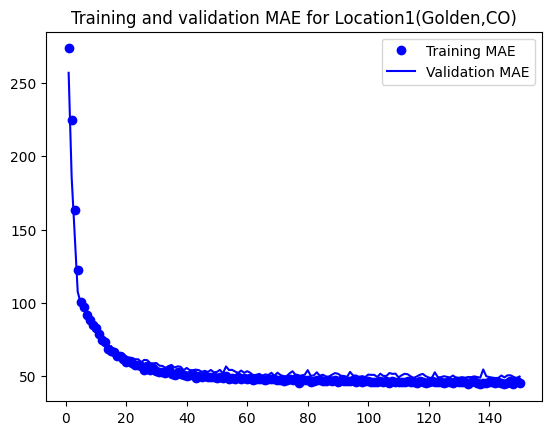

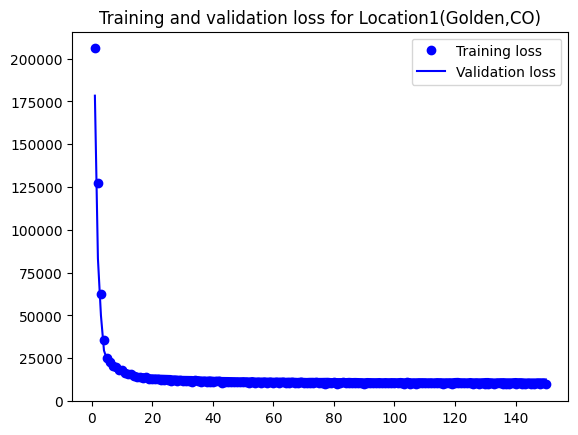

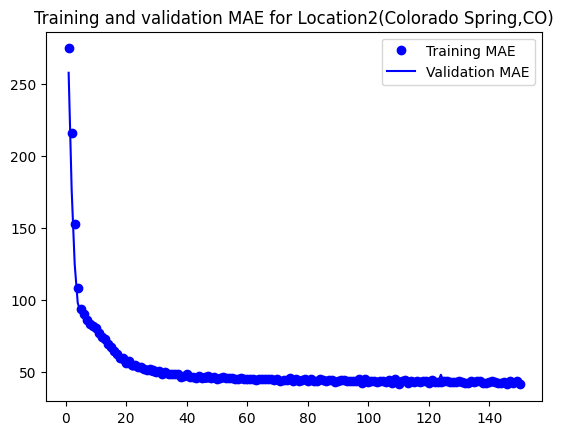

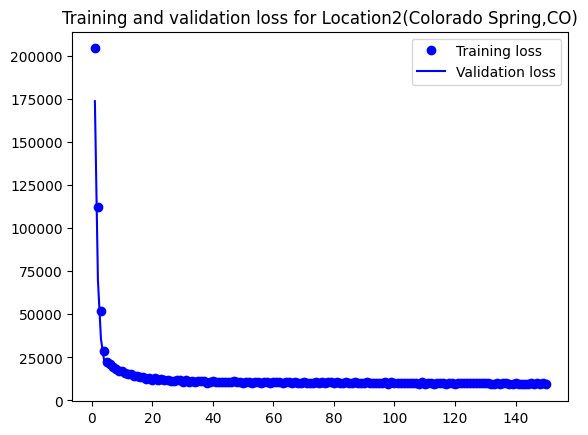

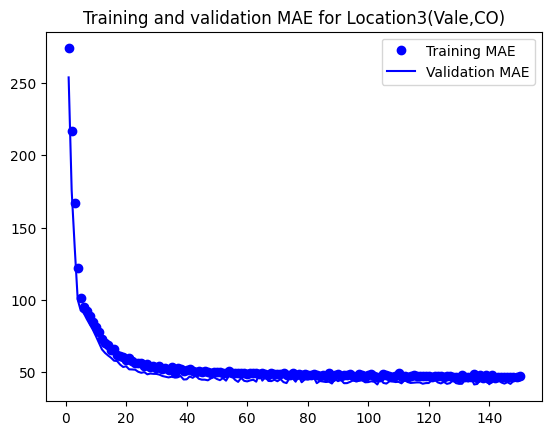

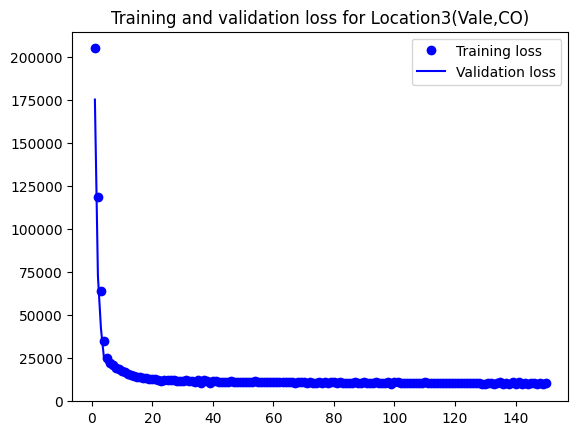

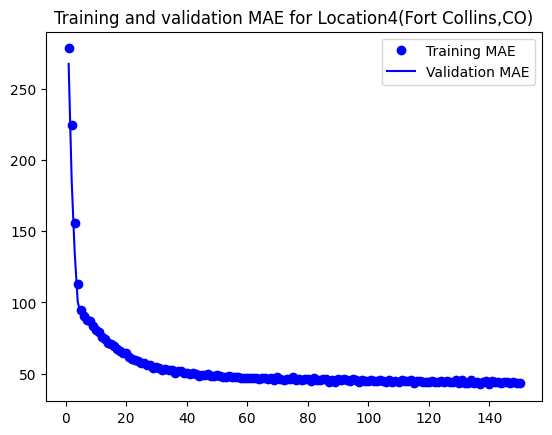

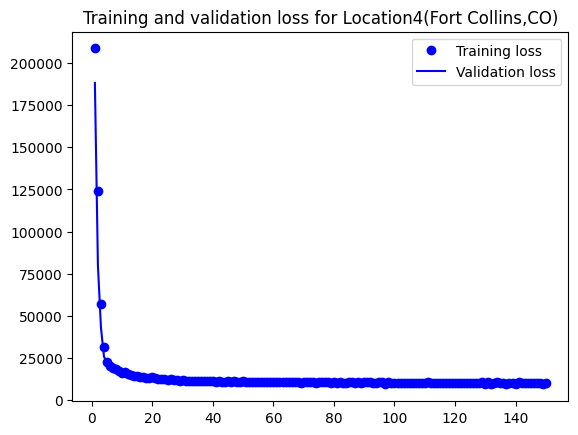

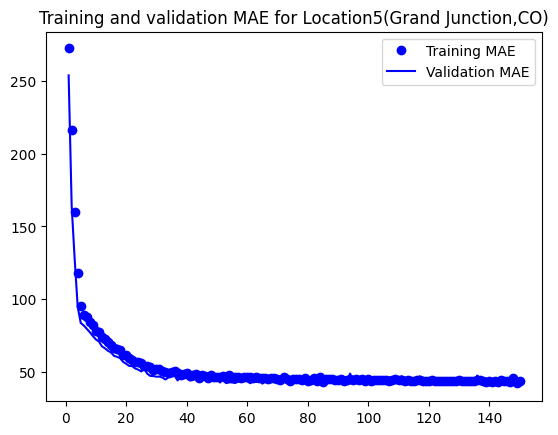

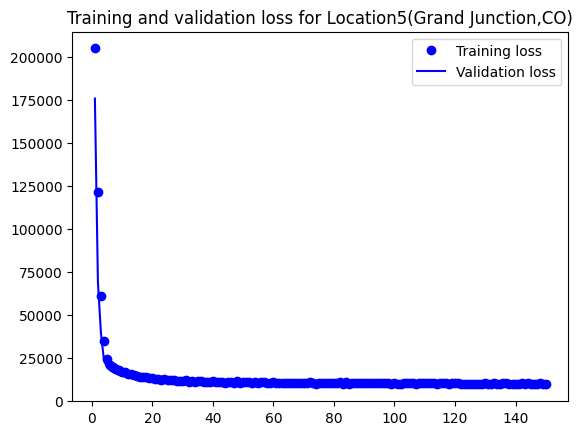

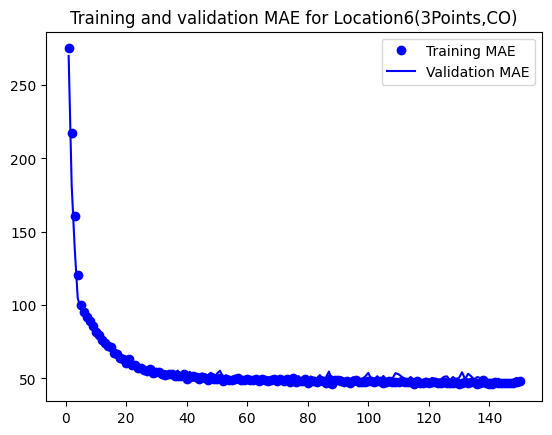

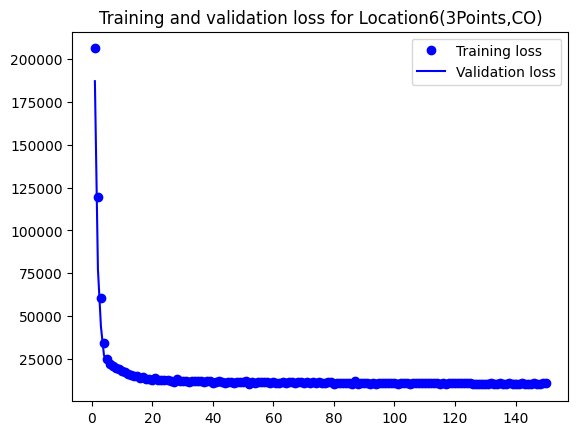

In [31]:
for i in range(locs):
    mae = history_lst[i].history['mae']
    val_mae = history_lst[i].history['val_mae']
    loss = history_lst[i].history['loss']
    val_loss = history_lst[i].history['val_loss']
    
    epochs = range(1, len(mae) + 1)
    plt.clf()
    plt.plot(epochs, mae, 'bo', label='Training MAE')
    plt.plot(epochs, val_mae, 'b', label='Validation MAE')
    plt.title('Training and validation MAE for {}'.format(text[i]))
    plt.legend()
    
    plt.figure()
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss for {}'.format(text[i]))
    plt.legend()
    
    plt.show()

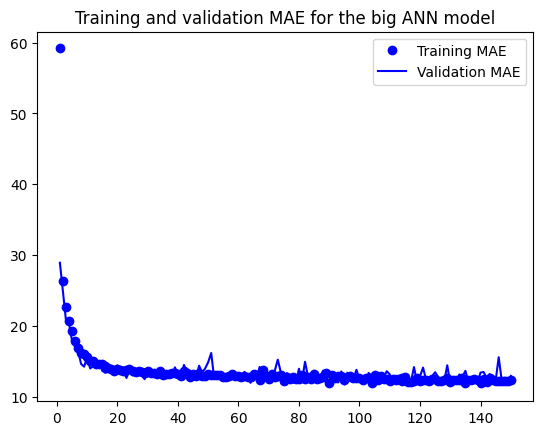

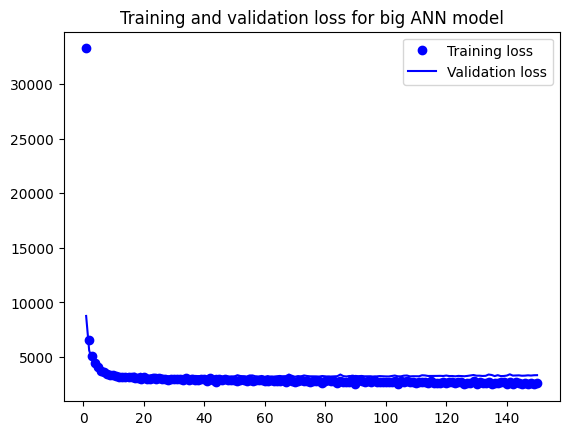

In [32]:
big_mae = big_history.history['mae']
big_val_mae = big_history.history['val_mae']
big_loss = big_history.history['loss']
big_val_loss = big_history.history['val_loss']
    
epochs = range(1, len(big_mae) + 1)
plt.clf()
plt.plot(epochs, big_mae, 'bo', label='Training MAE')
plt.plot(epochs, big_val_mae, 'b', label='Validation MAE')
plt.title('Training and validation MAE for the big ANN model')
plt.legend()
    
plt.figure()
plt.plot(epochs, big_loss, 'bo', label='Training loss')
plt.plot(epochs, big_val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss for big ANN model')
plt.legend()
    
plt.show()

In [33]:
k = 5
all_scores_lst = []
num_val_samples = len(trainX_lst[0]) // k
for i in range(locs):
    all_scores = []
    for j in range(k):
        print('Processing Fold', j)
        val_data = trainX_scaled_lst[i][j * num_val_samples: (j + 1) * num_val_samples]
        val_targets = trainY_lst[i][j * num_val_samples: (j + 1) * num_val_samples]

        partial_train_data = np.concatenate([trainX_scaled_lst[i][:j * num_val_samples], trainX_scaled_lst[i][(j + 1) * num_val_samples:]], axis=0)
        
        partial_train_targets = np.concatenate([trainY_lst[i][:j * num_val_samples], trainY_lst[i][(j + 1) * num_val_samples:]], axis=0)

        model = build_model()
        model.fit(partial_train_data, partial_train_targets, epochs=n_epochs, batch_size=n_batch_size, verbose=0)
        val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
        all_scores.append(val_mae)
        print('MAE: ' + str(val_mae))
        print('========================')
    all_scores_lst.append(all_scores)


Processing Fold 0
MAE: 46.47311782836914
Processing Fold 1
MAE: 48.43436813354492
Processing Fold 2
MAE: 49.523372650146484
Processing Fold 3
MAE: 49.3869514465332
Processing Fold 4
MAE: 46.05161666870117
Processing Fold 0
MAE: 48.21791458129883
Processing Fold 1
MAE: 49.23942947387695
Processing Fold 2
MAE: 45.35917282104492
Processing Fold 3
MAE: 47.24102020263672
Processing Fold 4
MAE: 49.16117477416992
Processing Fold 0
MAE: 48.018798828125
Processing Fold 1
MAE: 49.997718811035156
Processing Fold 2
MAE: 47.18682861328125
Processing Fold 3
MAE: 51.92756652832031
Processing Fold 4
MAE: 47.15546417236328
Processing Fold 0
MAE: 51.092742919921875
Processing Fold 1
MAE: 50.761077880859375
Processing Fold 2
MAE: 48.83308792114258
Processing Fold 3
MAE: 49.9459114074707
Processing Fold 4
MAE: 45.45062255859375
Processing Fold 0
MAE: 44.73717498779297
Processing Fold 1
MAE: 49.24183654785156
Processing Fold 2
MAE: 46.27653121948242
Processing Fold 3
MAE: 49.48958969116211
Processing Fold 

In [34]:
k = 5
big_num_val_samples = len(big_trainX) // k
big_all_scores = []
for j in range(k):
    print('Processing Fold', j)
    big_val_data = big_trainX_scaled[j * big_num_val_samples: (j + 1) * big_num_val_samples]
    big_val_targets = big_trainY[j * big_num_val_samples: (j + 1) * big_num_val_samples]

    big_partial_train_data = np.concatenate([big_trainX_scaled[:j * big_num_val_samples], big_trainX_scaled[(j + 1) * big_num_val_samples:]], axis=0)
        
    big_partial_train_targets = np.concatenate([big_trainY[:j * big_num_val_samples], big_trainY[(j + 1) * big_num_val_samples:]], axis=0)

    big_model = build_model()
    big_model.fit(big_partial_train_data, big_partial_train_targets, epochs=n_epochs, batch_size=n_batch_size, verbose=0)
    big_val_mse, big_val_mae = big_model.evaluate(big_val_data, big_val_targets, verbose=0)
    big_all_scores.append(val_mae)
    print('MAE: ' + str(val_mae))
    print('========================')
    

Processing Fold 0
MAE: 49.51470184326172
Processing Fold 1
MAE: 49.51470184326172
Processing Fold 2
MAE: 49.51470184326172
Processing Fold 3
MAE: 49.51470184326172
Processing Fold 4
MAE: 49.51470184326172


In [35]:
for i in range(locs):
    for j, val in enumerate(all_scores_lst[i]):
        print('Fold ' + str(j) +': ' + 'MAE of', val)
    print('Mean MAE of all folds {}: '.format(text[i]) + str(np.mean(all_scores_lst[i])))
    print("================")

Fold 0: MAE of 46.47311782836914
Fold 1: MAE of 48.43436813354492
Fold 2: MAE of 49.523372650146484
Fold 3: MAE of 49.3869514465332
Fold 4: MAE of 46.05161666870117
Mean MAE of all folds Location1(Golden,CO): 47.97388534545898
Fold 0: MAE of 48.21791458129883
Fold 1: MAE of 49.23942947387695
Fold 2: MAE of 45.35917282104492
Fold 3: MAE of 47.24102020263672
Fold 4: MAE of 49.16117477416992
Mean MAE of all folds Location2(Colorado Spring,CO): 47.84374237060547
Fold 0: MAE of 48.018798828125
Fold 1: MAE of 49.997718811035156
Fold 2: MAE of 47.18682861328125
Fold 3: MAE of 51.92756652832031
Fold 4: MAE of 47.15546417236328
Mean MAE of all folds Location3(Vale,CO): 48.857275390625
Fold 0: MAE of 51.092742919921875
Fold 1: MAE of 50.761077880859375
Fold 2: MAE of 48.83308792114258
Fold 3: MAE of 49.9459114074707
Fold 4: MAE of 45.45062255859375
Mean MAE of all folds Location4(Fort Collins,CO): 49.216688537597655
Fold 0: MAE of 44.73717498779297
Fold 1: MAE of 49.24183654785156
Fold 2: MAE of

In [36]:
for j, val in enumerate(big_all_scores):
    print('Fold ' + str(j) +': ' + 'MAE of', val)
    print('Mean MAE of all folds big model: ' + str(np.mean(big_all_scores)))
    print("================")

Fold 0: MAE of 49.51470184326172
Mean MAE of all folds big model: 49.51470184326172
Fold 1: MAE of 49.51470184326172
Mean MAE of all folds big model: 49.51470184326172
Fold 2: MAE of 49.51470184326172
Mean MAE of all folds big model: 49.51470184326172
Fold 3: MAE of 49.51470184326172
Mean MAE of all folds big model: 49.51470184326172
Fold 4: MAE of 49.51470184326172
Mean MAE of all folds big model: 49.51470184326172


In [37]:
all_mae_histories_lst = []
for i in range(locs):
    all_mae_histories = []
    for j in range(k):
        print('Processing Fold', j)
        val_data = trainX_scaled_lst[i][j * num_val_samples: (j + 1) * num_val_samples]
        val_targets = trainY_lst[i][j * num_val_samples: (j + 1) * num_val_samples]
        partial_train_data = np.concatenate([trainX_scaled_lst[i][:j * num_val_samples], trainX_scaled_lst[i][(j + 1) * num_val_samples:]],axis=0)
        
        partial_train_targets = np.concatenate([trainY_lst[i][:j * num_val_samples], trainY_lst[i][(j + 1) * num_val_samples:]], axis=0)
        
        model = build_model()
        history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=n_epochs, batch_size=n_batch_size, verbose=0)
        mae_history = history.history['val_mae']
        all_mae_histories.append(mae_history)
    
    all_mae_histories_lst.append(all_mae_histories)

Processing Fold 0
Processing Fold 1
Processing Fold 2
Processing Fold 3
Processing Fold 4
Processing Fold 0
Processing Fold 1
Processing Fold 2
Processing Fold 3
Processing Fold 4
Processing Fold 0
Processing Fold 1
Processing Fold 2
Processing Fold 3
Processing Fold 4
Processing Fold 0
Processing Fold 1
Processing Fold 2
Processing Fold 3
Processing Fold 4
Processing Fold 0
Processing Fold 1
Processing Fold 2
Processing Fold 3
Processing Fold 4
Processing Fold 0
Processing Fold 1
Processing Fold 2
Processing Fold 3
Processing Fold 4


In [38]:
big_all_mae_histories = []
for j in range(k):
    print('Processing Fold', j)
    big_val_data = big_trainX_scaled[j * big_num_val_samples: (j + 1) * big_num_val_samples]
    big_val_targets = big_trainY[j * big_num_val_samples: (j + 1) * big_num_val_samples]
    big_partial_train_data = np.concatenate([big_trainX_scaled[:j * big_num_val_samples], big_trainX_scaled[(j + 1) * big_num_val_samples:]],axis=0)
        
    big_partial_train_targets = np.concatenate([big_trainY[:j * big_num_val_samples], big_trainY[(j + 1) * big_num_val_samples:]], axis=0)
        
    big_model = build_model()
    big_history = big_model.fit(big_partial_train_data, big_partial_train_targets, validation_data=(big_val_data, big_val_targets),
                epochs=n_epochs, batch_size=n_batch_size, verbose=0)
    big_mae_history = big_history.history['val_mae']
    big_all_mae_histories.append(big_mae_history)
    

Processing Fold 0
Processing Fold 1
Processing Fold 2
Processing Fold 3
Processing Fold 4


In [39]:
average_mae_history_lst = []
for i in range(locs):
    average_mae_history = [np.mean([x[j] for x in all_mae_histories_lst[i]]) for j in range(n_epochs)]
    average_mae_history_lst.append(average_mae_history)
    print(len(average_mae_history))

150
150
150
150
150
150


In [40]:
big_average_mae_history = [np.mean([x[j] for x in big_all_mae_histories]) for j in range(n_epochs)]
print(len(big_average_mae_history))

150


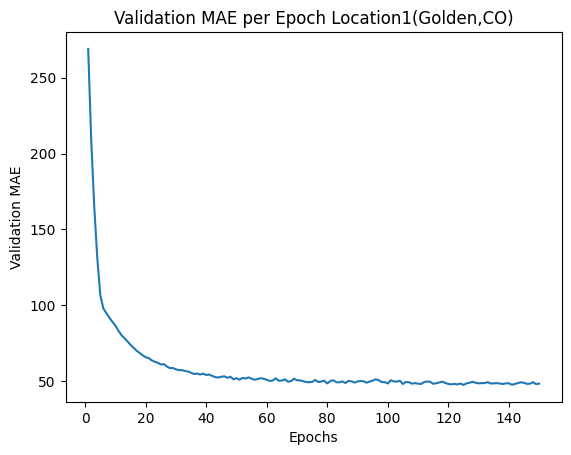

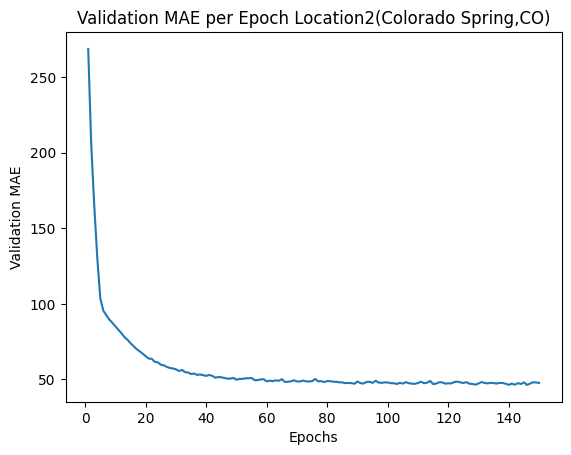

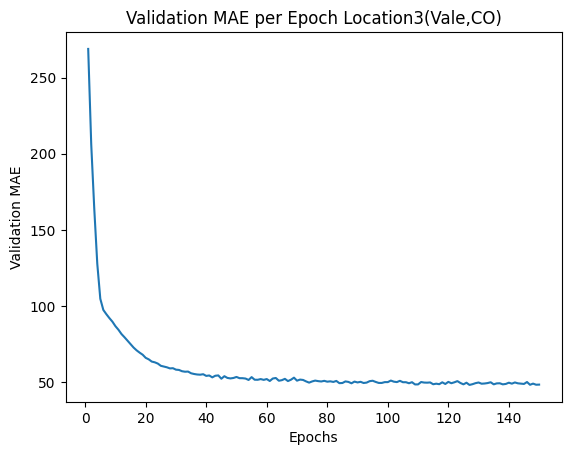

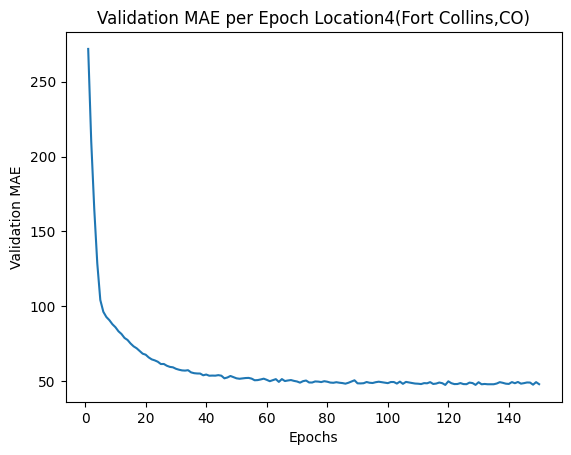

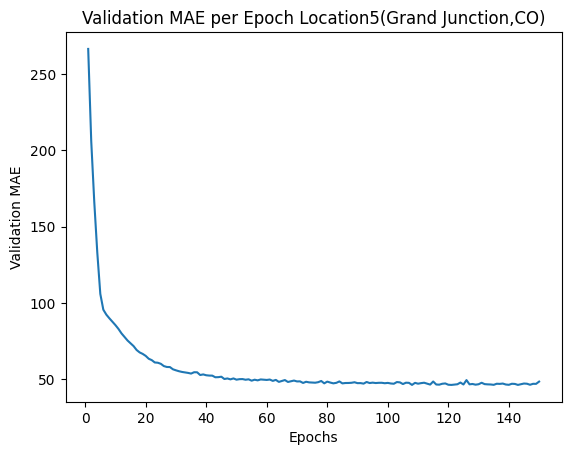

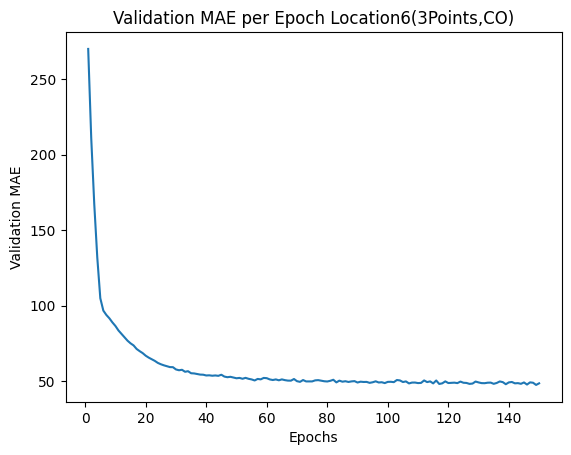

In [41]:
for i in range(locs):
    plt.clf()
    plt.plot(range(1, len(average_mae_history_lst[i]) + 1), average_mae_history_lst[i])
    plt.title('Validation MAE per Epoch {}'.format(text[i]))
    plt.xlabel('Epochs')
    plt.ylabel('Validation MAE')
    plt.show()

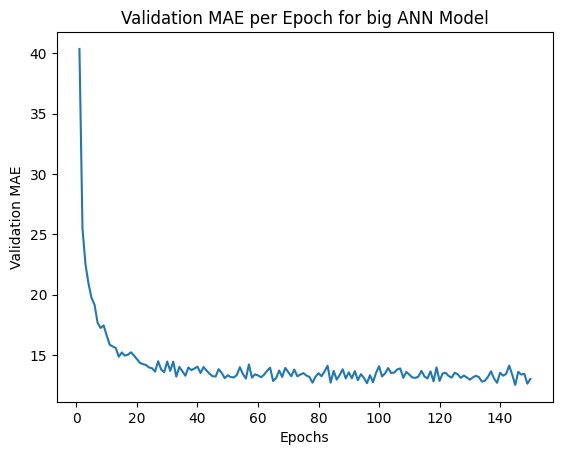

In [42]:
plt.clf()
plt.plot(range(1, len(big_average_mae_history) + 1), big_average_mae_history)
plt.title('Validation MAE per Epoch for big ANN Model')
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [43]:
best_model_lst = []
for i in range(locs):
    model_reloaded = load_model(checkpoint_no_lst[i] + '/' + model_name_lst[i])
    
    # Saving the best model in the correct path and format
    root_directory = os.getcwd()
    checkpoint_dir = os.path.join(root_directory, checkpoint_no_lst[i])
    model_name_temp = os.path.join(checkpoint_dir, model_name_lst[i] + '.h5')
    model_reloaded.save(model_name_temp)
    
    # Deletion of the automatically created folder under Model Checkpoint File.
    folder_name_temp = os.path.join(checkpoint_dir, model_name_lst[i])
    shutil.rmtree(folder_name_temp, ignore_errors=True)
    best_model = load_model(model_name_temp)
    best_model_lst.append(best_model)

/Users/saraabouelella/anaconda3/envs/nrel311/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
/Users/saraabouelella/anaconda3/envs/nrel311/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
/Users/saraabouelella/anaconda3/envs/nrel311/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.s

In [44]:
big_model_reloaded = load_model(big_checkpoint_no + '/' + big_model_name)
    
# Saving the best model in the correct path and format
root_directory = os.getcwd()
big_checkpoint_dir = os.path.join(root_directory, big_checkpoint_no)
big_model_name_temp = os.path.join(big_checkpoint_dir, big_model_name + '.h5')
big_model_reloaded.save(big_model_name_temp)
    
# Deletion of the automatically created folder under Model Checkpoint File.
folder_name_temp = os.path.join(big_checkpoint_dir, big_model_name)
shutil.rmtree(folder_name_temp, ignore_errors=True)
big_best_model = load_model(big_model_name_temp)


/Users/saraabouelella/anaconda3/envs/nrel311/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [45]:
test_loss_lst = []
test_mae_lst = []
for i in range(locs):
    test_loss, test_mae = best_model_lst[i].evaluate(testX_scaled_lst[i], testY_lst[i], steps=n_test_steps)
    test_loss_lst.append(test_loss)
    test_mae_lst.append(test_mae)
    print()
    print('Test MAE {}:'.format(text[i]), test_mae)

17/17 [==============================] - 0s 498us/step - loss: 10497.6338 - mae: 46.9932

Test MAE Location1(Golden,CO): 46.993221282958984
17/17 [==============================] - 0s 493us/step - loss: 11723.0020 - mae: 47.6412

Test MAE Location2(Colorado Spring,CO): 47.6412353515625
17/17 [==============================] - 0s 468us/step - loss: 10802.0566 - mae: 45.3572

Test MAE Location3(Vale,CO): 45.357181549072266
17/17 [==============================] - 0s 466us/step - loss: 10536.0254 - mae: 44.4394

Test MAE Location4(Fort Collins,CO): 44.43944549560547
17/17 [==============================] - 0s 585us/step - loss: 12134.2441 - mae: 50.2324

Test MAE Location5(Grand Junction,CO): 50.23244094848633
17/17 [==============================] - 0s 500us/step - loss: 10007.8525 - mae: 45.7773

Test MAE Location6(3Points,CO): 45.777305603027344


In [46]:
big_test_loss, big_test_mae = big_best_model.evaluate(big_testX_scaled, big_testY, steps=n_test_steps)
print()
print('Test MAE for big ANN Model:', big_test_mae)

17/17 [==============================] - 0s 610us/step - loss: 3069.4692 - mae: 13.4516

Test MAE for big ANN Model: 13.451592445373535


In [47]:
y_pred_ann_lst = []
for i in range(locs):
    y_pred = best_model_lst[i].predict(testX_scaled_lst[i])
    y_pred_ann_lst.append(y_pred)
    
y_pred_ann_lst[0][:5]

110/110 [==============================] - 0s 309us/step


array([[840.0013   ],
       [ -2.5879517],
       [440.8449   ],
       [  7.756035 ],
       [817.08374  ]], dtype=float32)

In [48]:
big_y_pred_ann_lst = []
for i in range(locs):
    y_pred = big_best_model.predict(testX_scaled_lst[i])
    big_y_pred_ann_lst.append(y_pred)
    
big_y_pred_ann_lst[0][:5]

110/110 [==============================] - 0s 267us/step


array([[842.18805   ],
       [ -0.88206905],
       [396.7362    ],
       [ 40.948376  ],
       [790.77313   ]], dtype=float32)

In [49]:
df_results_lst = []
for i in range(locs):
    df_testY = pd.DataFrame(testY_lst[i])
    df_y_pred = pd.DataFrame(y_pred_ann_lst[0])
    
    df_testY.reset_index(drop=True, inplace=True)
    df_y_pred.reset_index(drop=True, inplace=True)
    df_results = pd.concat([df_testY, df_y_pred], axis=1)
    df_results.columns = ['Actual', 'Predicted']
    df_results_lst.append(df_results)

df_results_lst[4]

,Actual,Predicted
0,0.0,840.001282
1,0.0,-2.587952
2,0.0,440.844910
3,0.0,7.756035
4,0.0,817.083740
...,...,...
3498,0.0,0.586561
3499,704.0,961.955200
3500,635.0,700.276001
3501,485.0,428.332886


In [50]:
big_df_results_lst = []
for i in range(locs):
    df_testY = pd.DataFrame(testY_lst[i])
    df_y_pred = pd.DataFrame(big_y_pred_ann_lst[0])
    
    df_testY.reset_index(drop=True, inplace=True)
    df_y_pred.reset_index(drop=True, inplace=True)
    df_results = pd.concat([df_testY, df_y_pred], axis=1)
    df_results.columns = ['Actual', 'Predicted']
    big_df_results_lst.append(df_results)

big_df_results_lst[4]

,Actual,Predicted
0,0.0,842.188049
1,0.0,-0.882069
2,0.0,396.736206
3,0.0,40.948376
4,0.0,790.773132
...,...,...
3498,0.0,-52.260456
3499,704.0,956.217224
3500,635.0,687.061890
3501,485.0,421.629822


In [51]:
for i in range(locs):
    print("Neural Network for {}".format(text[i]))
    print('Mean Absolute Error:', metrics.mean_absolute_error(testY_lst[i], y_pred_ann_lst[i]))
    print('Mean Squared Error:', metrics.mean_squared_error(testY_lst[i], y_pred_ann_lst[i]))
    print('Root Mean Squared Error:', metrics.mean_squared_error(testY_lst[i], y_pred_ann_lst[i], squared=False))
    print("=================================================================")
    
    print("Linear Regression for {}".format(text[i]))
    print('Mean Absolute Error:', metrics.mean_absolute_error(testY_lst[i], y_pred_linreg_lst[i]))
    print('Mean Squared Error:', metrics.mean_squared_error(testY_lst[i], y_pred_linreg_lst[i]))
    print('Root Mean Squared Error:', metrics.mean_squared_error(testY_lst[i], y_pred_linreg_lst[i], squared=False))
    print("=================================================================")
    
    print("SVR for {}".format(text[i]))
    print('Mean Absolute Error:', metrics.mean_absolute_error(testY_lst[i], y_pred_svr_lst[i]))
    print('Mean Squared Error:', metrics.mean_squared_error(testY_lst[i], y_pred_svr_lst[i]))
    print('Root Mean Squared Error:', metrics.mean_squared_error(testY_lst[i], y_pred_svr_lst[i], squared=False))
    print("=================================================================\n")
    

Neural Network for Location1(Golden,CO)
Mean Absolute Error: 46.99321893641107
Mean Squared Error: 10497.634471541698
Root Mean Squared Error: 102.45796441244428
Linear Regression for Location1(Golden,CO)
Mean Absolute Error: 58.54083177036767
Mean Squared Error: 12025.921815484511
Root Mean Squared Error: 109.66276403357938
SVR for Location1(Golden,CO)
Mean Absolute Error: 143.3402711750294
Mean Squared Error: 61050.965024260855
Root Mean Squared Error: 247.08493483873283

Neural Network for Location2(Colorado Spring,CO)
Mean Absolute Error: 47.641234890651674
Mean Squared Error: 11723.002570870976
Root Mean Squared Error: 108.27281547494263
Linear Regression for Location2(Colorado Spring,CO)
Mean Absolute Error: 61.12634665652008
Mean Squared Error: 13243.122512393476
Root Mean Squared Error: 115.07876655749085
SVR for Location2(Colorado Spring,CO)
Mean Absolute Error: 144.60227110979915
Mean Squared Error: 62380.50248029461
Root Mean Squared Error: 249.76089061399227

Neural Network

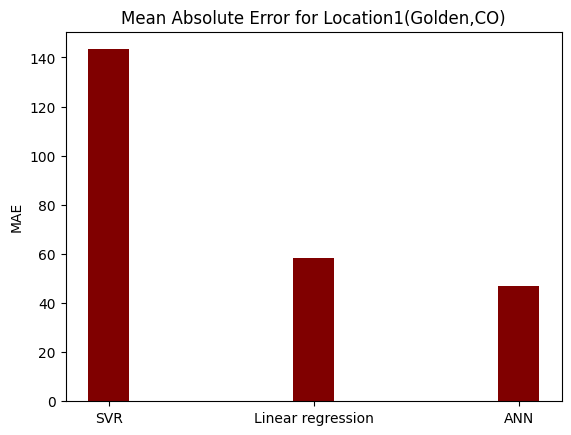

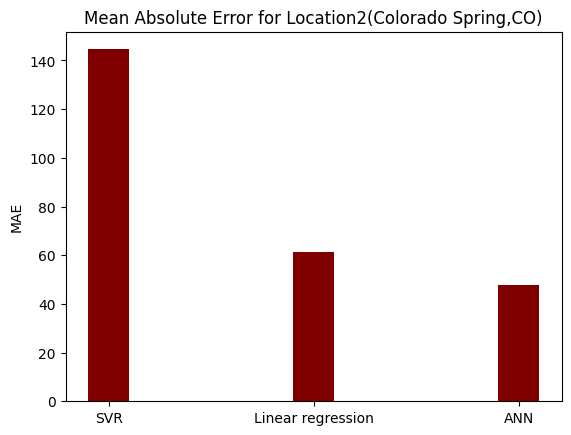

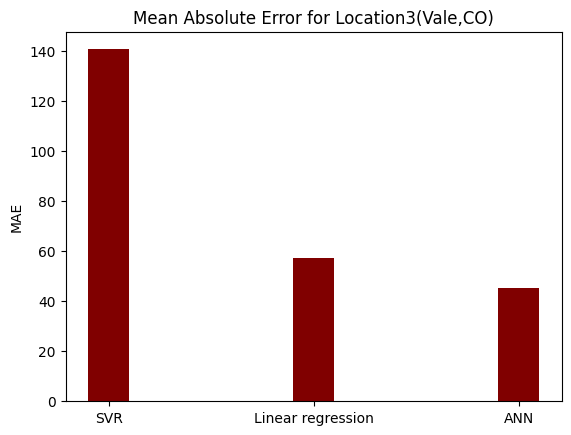

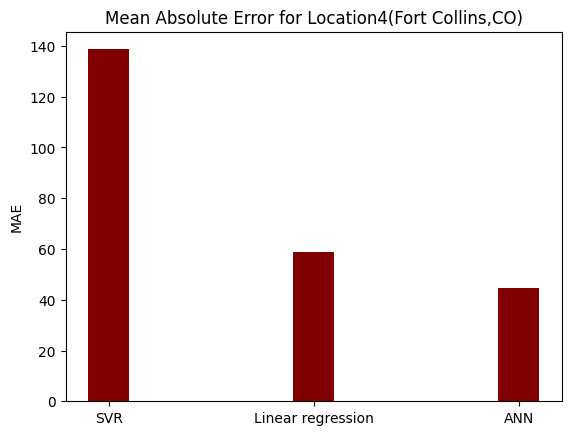

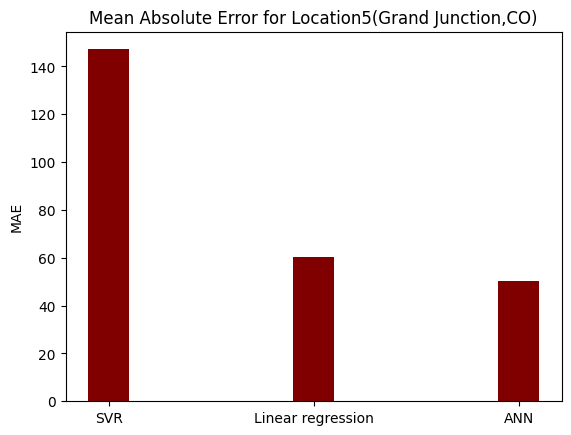

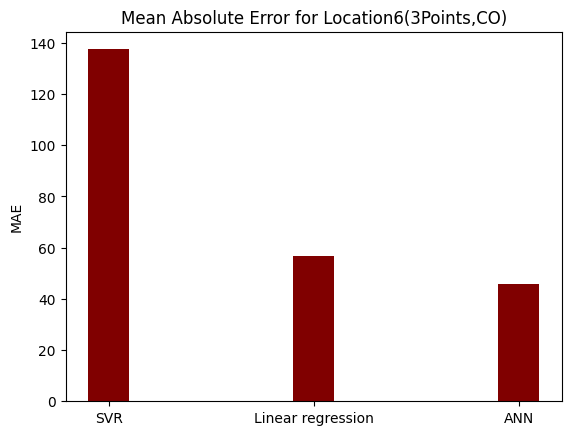

In [85]:
reg = ['SVR', 'Linear regression', 'ANN']

for i in range(locs):
    plt.clf()
    plt.title('Mean Absolute Error for {}'.format(text[i]))
    reg_mae = [metrics.mean_absolute_error(testY_lst[i], y_pred_svr_lst[i]),
        metrics.mean_absolute_error(testY_lst[i], y_pred_linreg_lst[i]),
        metrics.mean_absolute_error(testY_lst[i], y_pred_ann_lst[i])]
    plt.bar(reg, reg_mae, width=0.2, color='maroon')
    # plt.xlabel("Models")
    plt.ylabel("MAE")

    
    # plt.legend()
    plt.show()

In [52]:
for i in range(locs):
    print("Neural Network big Model for {}".format(text[i]))
    print('Mean Absolute Error:', metrics.mean_absolute_error(testY_lst[i], big_y_pred_ann_lst[i]))
    print('Mean Squared Error:', metrics.mean_squared_error(testY_lst[i], big_y_pred_ann_lst[i]))
    print('Root Mean Squared Error:', metrics.mean_squared_error(testY_lst[i], big_y_pred_ann_lst[i], squared=False))
    print("=================================================================")


Neural Network big Model for Location1(Golden,CO)
Mean Absolute Error: 61.29049376477659
Mean Squared Error: 11266.727498927174
Root Mean Squared Error: 106.14484207406016
Neural Network big Model for Location2(Colorado Spring,CO)
Mean Absolute Error: 64.21067420224139
Mean Squared Error: 12352.603075521165
Root Mean Squared Error: 111.14226502785142
Neural Network big Model for Location3(Vale,CO)
Mean Absolute Error: 62.587553513533315
Mean Squared Error: 11450.195543503727
Root Mean Squared Error: 107.0055865060499
Neural Network big Model for Location4(Fort Collins,CO)
Mean Absolute Error: 62.620434345652505
Mean Squared Error: 11282.20631576405
Root Mean Squared Error: 106.2177307033249
Neural Network big Model for Location5(Grand Junction,CO)
Mean Absolute Error: 63.69652272124921
Mean Squared Error: 12387.224142118506
Root Mean Squared Error: 111.29790717762175
Neural Network big Model for Location6(3Points,CO)
Mean Absolute Error: 61.16796733272644
Mean Squared Error: 10851.5752

[[143.3402711750294, 144.60227110979915, 140.78140159606673, 138.68707842569972, 147.13397411946488, 137.4372005890504], [58.54083177036767, 61.12634665652008, 57.38179802172502, 58.84657596412175, 60.492431206755896, 56.675602371627384], [46.99321893641107, 47.641234890651674, 45.35718605191136, 44.43944219347752, 50.23244256022366, 45.77730686004217], [61.29049376477659, 64.21067420224139, 62.587553513533315, 62.620434345652505, 63.69652272124921, 61.16796733272644]]


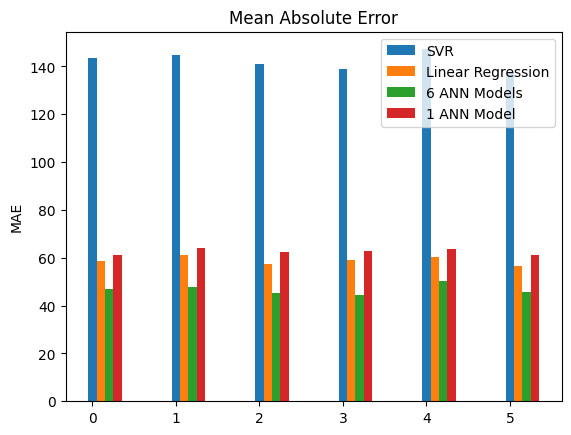

In [130]:
barWidth = 0.1
reg = ['SVR', 'Linear Regression', '6 ANN Models', '1 ANN Model']

reg_svr = []
reg_lin = []
reg_ann1 = []
reg_ann6 = []
for i in range(locs):
    reg_mae = []
    reg_svr.append(metrics.mean_absolute_error(testY_lst[i], y_pred_svr_lst[i]))
    reg_lin.append(metrics.mean_absolute_error(testY_lst[i], y_pred_linreg_lst[i]))
    reg_ann1.append(metrics.mean_absolute_error(testY_lst[i], y_pred_ann_lst[i]))
    reg_ann6.append(metrics.mean_absolute_error(testY_lst[i], big_y_pred_ann_lst[i]))

reg_all = [reg_svr, reg_lin, reg_ann1, reg_ann6]
print(reg_all)
plt.clf()
plt.title('Mean Absolute Error')
br_i = np.arange(locs)
for i in range(len(reg)):
    plt.bar(br_i, reg_all[i], width=barWidth, label=reg[i])
    br_i = [x + barWidth for x in br_i]
    # plt.xticks(br_i, ['Golden', 'Colorado Spring', 'Vale', 'Grandjunction', '3Points'])

plt.xticks(br_i, ['Golden', 'Colorado Spring', 'Vale', 'Grandjunction', '3Points']) 
plt.ylabel("MAE")
plt.legend()
plt.show()

In [53]:
# make the time stamp matches the test Y
test_size = testY_lst[0].shape[0]
shifted_df = dfs[0].iloc[8:, :]
bad_df = shifted_df.isin(shifted_df.iloc[zero_index, :])
df_zero_deleted = shifted_df[~bad_df].dropna()
df_zero_deleted.shape
timest = df_zero_deleted.index[-test_size:]
print(timest)

DatetimeIndex(['2010-09-02 08:00:00', '2010-09-02 08:30:00',
               '2010-09-02 09:00:00', '2010-09-02 09:30:00',
               '2010-09-02 10:00:00', '2010-09-02 10:30:00',
               '2010-09-02 11:00:00', '2010-09-02 11:30:00',
               '2010-09-02 12:00:00', '2010-09-02 12:30:00',
               ...
               '2010-12-31 14:30:00', '2010-12-31 15:00:00',
               '2010-12-31 15:30:00', '2010-12-31 16:00:00',
               '2010-12-31 16:30:00', '2010-12-31 17:00:00',
               '2010-12-31 17:30:00', '2010-12-31 18:00:00',
               '2010-12-31 18:30:00', '2010-12-31 19:00:00'],
              dtype='datetime64[ns]', length=3503, freq=None)


In [54]:
#get the best day!
k = 22
day_long = 38
for i in range(locs):
    day1 = y_pred_ann_lst[i][:k]
    print(day1)
    err =[]
    err.append(metrics.mean_absolute_error(testY_lst[i][:k], y_pred_ann_lst[i][:k]))
    for j in range(k, y_pred.shape[0], day_long):
        err.append(metrics.mean_absolute_error(testY[j:j+day_long], y_pred[j:j+day_long]))
    
    print("min error ", min(err))
    print("position of best day ", err.index(min(err)))
    day_ind = day_long * (err.index(min(err))) + 15
    print(day_ind)


[[ 8.4000128e+02]
 [-2.5879517e+00]
 [ 4.4084491e+02]
 [ 7.7560349e+00]
 [ 8.1708374e+02]
 [ 1.0524427e+02]
 [-5.7968559e+00]
 [ 8.3087964e+02]
 [ 1.8598326e+00]
 [ 8.0643883e+01]
 [ 1.2232643e+01]
 [ 2.3701656e-01]
 [ 1.6786572e+01]
 [ 8.8563531e+02]
 [-8.7769330e-01]
 [-2.5584202e+01]
 [ 8.6549951e+02]
 [-2.1286130e-02]
 [ 8.4767969e+02]
 [ 4.5751941e-01]
 [ 2.3213226e+02]
 [ 4.7821301e+02]]
min error  30.61538833066037
position of best day  84
3207
[[ 2.7285162e+02]
 [ 6.2048804e+02]
 [-5.1333714e+00]
 [ 3.5253278e+02]
 [-3.3910980e+00]
 [-1.2019605e+01]
 [ 4.5373477e+02]
 [ 8.7884424e+02]
 [-1.5575579e+00]
 [ 8.8345880e+02]
 [-7.3469677e+00]
 [ 8.0260855e-01]
 [ 9.4476746e+02]
 [ 5.8877142e+02]
 [ 8.4149139e+02]
 [ 8.7876257e+02]
 [ 8.6213251e+02]
 [ 8.7682135e+02]
 [ 6.4798621e+02]
 [ 2.4351412e+01]
 [ 8.2650995e+02]
 [ 5.3621185e+02]]
min error  30.61538833066037
position of best day  84
3207
[[960.2392   ]
 [650.30505  ]
 [ -5.9025   ]
 [515.6211   ]
 [ -4.839007 ]
 [ 40.086246 

min error  30.61538833066037
position of best day  84
3207


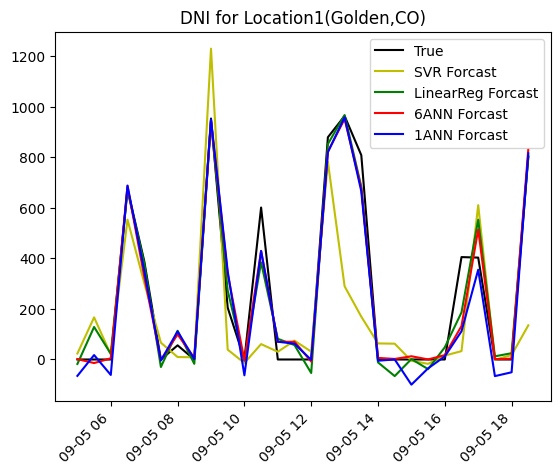

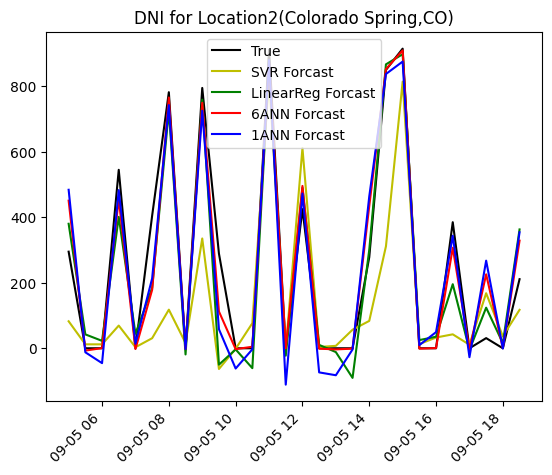

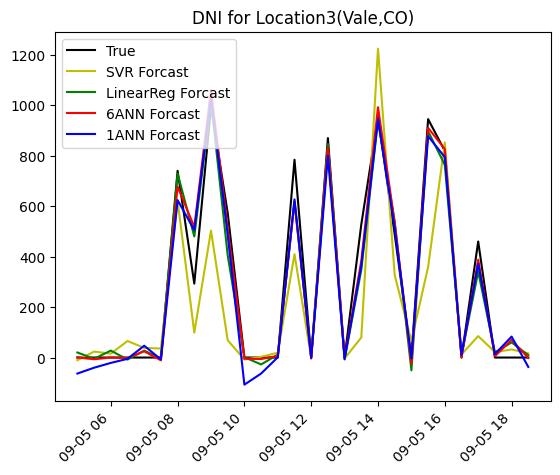

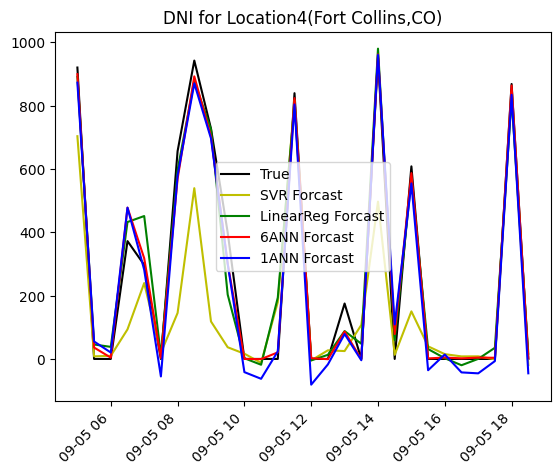

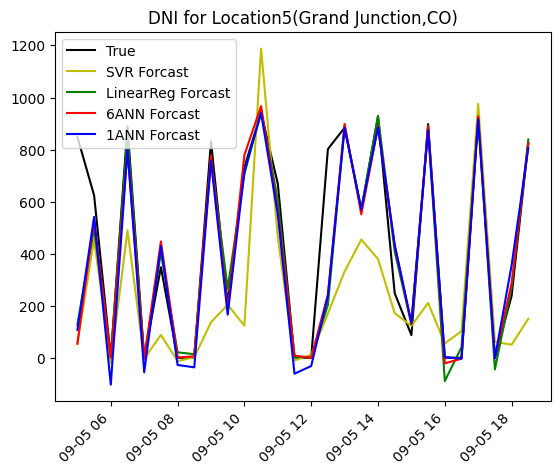

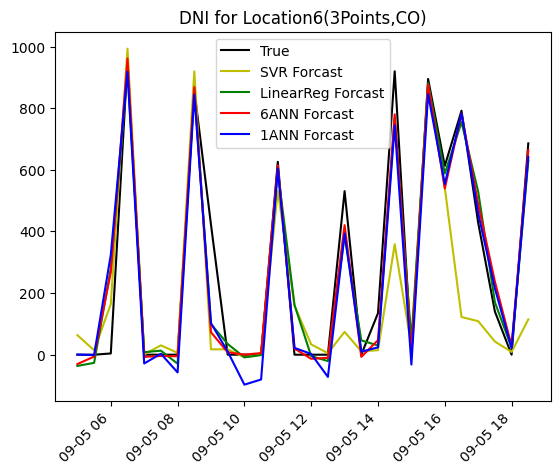

In [88]:
s = 81
l = 28
for i in range(locs):
    plt.clf()
    plt.title('DNI for {}'.format(text[i]))
    plt.plot(timest[s:s+l], testY_lst[i][s:s+l], 'k', label='True')
    plt.plot(timest[s:s+l], y_pred_svr_lst[i][s:s+l], 'y', label='SVR Forcast')
    plt.plot(timest[s:s+l], y_pred_linreg_lst[i][s:s+l], 'g', label='LinearReg Forcast')
    plt.plot(timest[s:s+l], y_pred_ann_lst[i][s:s+l], 'r', label='6ANN Forcast')
    plt.plot(timest[s:s+l], big_y_pred_ann_lst[i][s:s+l], 'b', label='1ANN Forcast')
    
    plt.xticks(rotation=45, ha='right')
    plt.legend()
    plt.show()

<Figure size 3000x3000 with 0 Axes>

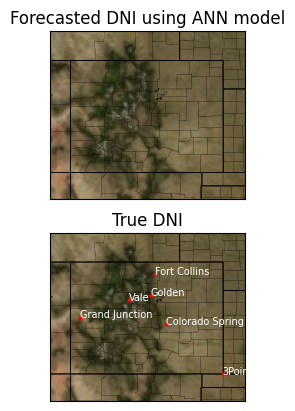

In [56]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(30,30)) 
fig, axes = plt.subplots(2, 1)
axes[0].set_title("Forecasted DNI using ANN model")
m1 = Basemap(projection='merc', lat_0 = p1_lat, lon_0 = p1_lon,
    resolution = 'h', area_thresh = 0.1,
    llcrnrlon=-110, llcrnrlat=36,
    urcrnrlon=-101, urcrnrlat=42, ax=axes[0])

m1.bluemarble()
m1.drawstates()
m1.drawcounties()

axes[1].set_title("True DNI")
m2 = Basemap(projection='merc', lat_0 = p1_lat, lon_0 = p1_lon,
    resolution = 'h', area_thresh = 0.1,
    llcrnrlon=-110, llcrnrlat=36,
    urcrnrlon=-101, urcrnrlat=42, ax=axes[1])

m2.bluemarble()
m2.drawstates()
m2.drawcounties()

for i in range(locs):
    x,y = m2(P_lons[i], P_lats[i])
    m2.plot(x,y, 'ro', markersize=2)
    plt.text(x+300, y+100, text[i][10:-4], fontsize=7, color='w')


plt.show()

In [57]:
# Moving results to another file
import pickle
for i in range(locs):
    y_trans_ann_lst = list(np.reshape(y_pred_ann_lst[i],y_pred_ann_lst[i].shape[0]))
    y_trans_true_lst = list(np.reshape(testY_lst[i], testY_lst[0].shape[0]))
    
    with open("pred_nn{}".format(i+1), "wb") as fp:   #Pickling
        pickle.dump(y_trans_ann_lst, fp)

    with open("true_y{}".format(i+1), "wb") as fp:   #Pickling
        pickle.dump(y_trans_true_lst, fp)

In [58]:
################# Skip this cell, it worked better in a sperete file ####################
# import matplotlib.animation as animation 
# from matplotlib.animation import PillowWriter

# point = m.plot(x, y, 'ro', markersize=5)[0]

# def init(): 
#     point.set_markersize(0)
#     return point,

# # animation function.  This is called sequentially
# def animate(i):
#     s = 0.05 * i
#     # point.set_linewidth(s)
#     # m = Basemap(projection='merc', lat_0 = p1_lat, lon_0 = p1_lon, resolution = 'h', area_thresh = 0.1, llcrnrlon=-110, llcrnrlat=36, urcrnrlon=-101, urcrnrlat=42)
#     point.set_markersize(s)
#     return point, 
#     # m.bluemarble()
#     # m.drawstates()
#     # m.drawcounties()
    
#     # x,y = m(p1_lon, p1_lat)
#     # m.plot(x, y, 'yo', markersize=s)

# anim = animation.FuncAnimation(plt.gcf(), animate, init_func = init, frames = y_pred_list, interval = 20, blit = True)
# # writer = PillowWriter(fps=30)
# # anim.save("myMap.gif", writer=writer)

# # plt.tight_layout()
# plt.show()
# # anim.save('animatedMap.mp4', writer = 'sa', fps = 30)